In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
from transformers import (
    GPT2Config,
    GPT2Tokenizer,
    GPT2LMHeadModel,
)

/home/cgagne/cvar_generation/conda_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
modelname = '../models/pretrained/gpt2-large/'
config = GPT2Config.from_pretrained(modelname)
tokenizer = GPT2Tokenizer.from_pretrained(modelname)

In [4]:
import sys
sys.path.append('../')
from rl_learner import TD_Learner
import torch
import pickle
device = 'cpu'
import sys
sys.path.append('../')

from cvar_helpers import calc_cvar_from_samples
from train_rl_batch_sentence_chains import average_states_by_period

## Regular (Non-Whatif's)

### Loading Training Data (12,000)

In [5]:
file = '../data/results/sentence_chains_I_5/generations_using.txt'
f = open(file, "r")
sentences = f.readlines()
sentences = [s.replace('\n','') for s in sentences]
composite_rewards =[s.split('r_all=')[1] for s in sentences]
sentences_wo_rall = [s.split('r_all=')[0] for s in sentences]
state_rewards =  [np.array(s.split('r=')[-1].split(',')).astype('float') for s in sentences_wo_rall]


In [6]:
# removing some bad examples #
state_rewards2 = []
sentences2 = []
composite_rewards2 = []
for r,s,rc in zip(state_rewards, sentences, composite_rewards):
    if len(r)!=3:
        pass
    else:
        state_rewards2.append(r)
        sentences2.append(s)
        composite_rewards2.append(rc)
sentences = sentences2
state_rewards = np.array(state_rewards2)
composite_rewards = np.array(composite_rewards2).astype('float')

# choose rewards 
summed_rewards = state_rewards.sum(axis=1)
final_rewards = state_rewards[:,-1]


assert len(sentences) == len(final_rewards)

In [7]:
np.array(state_rewards)

array([[ 0.396, -0.226,  0.012],
       [-0.018,  0.162,  0.988],
       [ 0.132, -0.83 , -0.15 ],
       ...,
       [ 0.672,  0.752,  0.875],
       [ 0.16 , -0.053,  0.002],
       [-0.277,  0.972,  0.988]])

In [8]:
summed_rewards

array([ 0.182,  1.132, -0.848, ...,  2.299,  0.109,  1.683])

In [9]:
final_rewards

array([ 0.012,  0.988, -0.15 , ...,  0.875,  0.002,  0.988])

In [10]:
composite_rewards

array([ 0.857,  0.954, -0.698, ...,  0.779,  0.479,  0.991])

In [11]:
len(sentences)
len(final_rewards)

12534

### Plotting the distributions

Text(0.5, 1.0, 'composite reward')

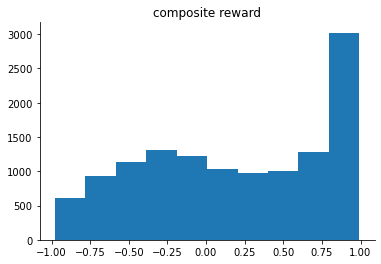

In [12]:
plt.hist(composite_rewards)
sns.despine()
plt.title('composite reward')

Text(0.5, 1.0, 'final reward')

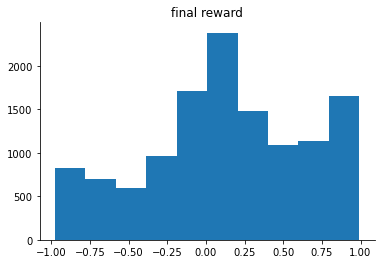

In [13]:
plt.hist(final_rewards)
sns.despine()
plt.title('final reward')

Text(0.5, 1.0, 'summed reward')

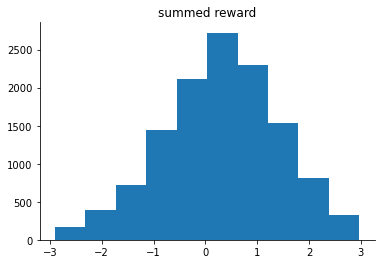

In [14]:
plt.hist(summed_rewards)
sns.despine()
plt.title('summed reward')

### Plotting the distributions (by stems)

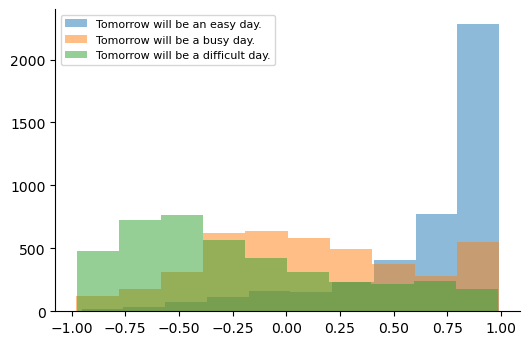

In [15]:
stems = ["Tomorrow will be an easy day.",
         "Tomorrow will be a busy day.",
         "Tomorrow will be a difficult day."]

plt.figure(dpi=100)
for stem in stems:
    sel = np.array([s.startswith(stem) for s in sentences]).astype('bool')
    plt.hist(composite_rewards[sel], label=stem, alpha=0.5)
    plt.legend(fontsize=8)
sns.despine()

In [16]:
stem in sentences[0]

False

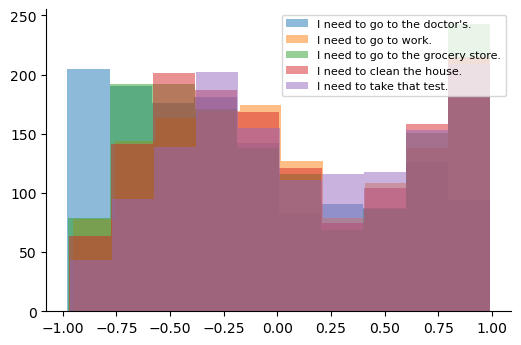

In [17]:
stems = ["I need to go to the doctor's.", 'I need to go to work.', 
         'I need to go to the grocery store.', 'I need to clean the house.',  'I need to take that test.',]

plt.figure(dpi=100)
for stem in stems:
    sel = np.array([True if stem in s else False for s in sentences ]).astype('bool')
    plt.hist(composite_rewards[sel], label=stem, alpha=0.5)
    plt.legend(fontsize=8)
sns.despine()

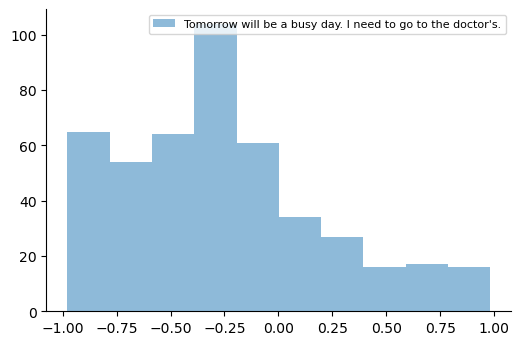

In [105]:
stems = ["Tomorrow will be a busy day. I need to go to the doctor's.", ]

plt.figure(dpi=100)
for stem in stems:
    sel = np.array([True if stem in s else False for s in sentences ]).astype('bool')
    plt.hist(composite_rewards[sel], label=stem, alpha=0.5)
    plt.legend(fontsize=8)
sns.despine()

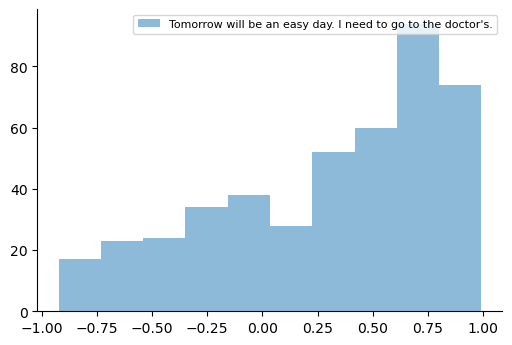

In [107]:
stems = ["Tomorrow will be an easy day. I need to go to the doctor's.", ]

plt.figure(dpi=100)
for stem in stems:
    sel = np.array([True if stem in s else False for s in sentences ]).astype('bool')
    plt.hist(composite_rewards[sel], label=stem, alpha=0.5)
    plt.legend(fontsize=8)
sns.despine()

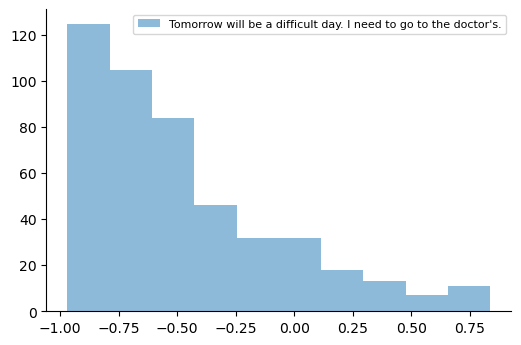

In [111]:
stems = ["Tomorrow will be a difficult day. I need to go to the doctor's.", ]

plt.figure(dpi=100)
for stem in stems:
    sel = np.array([True if stem in s else False for s in sentences ]).astype('bool')
    plt.hist(composite_rewards[sel], label=stem, alpha=0.5)
    plt.legend(fontsize=8)
sns.despine()

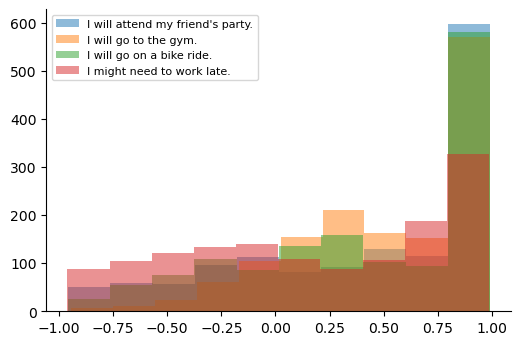

In [18]:
stems = ["I will attend my friend's party.", "I will go to the gym.", "I will go on a bike ride.", "I might need to work late." ]

plt.figure(dpi=100)
for stem in stems:
    sel = np.array([True if stem in s else False for s in sentences ]).astype('bool')
    plt.hist(composite_rewards[sel], label=stem, alpha=0.5)
    plt.legend(fontsize=8)
sns.despine()

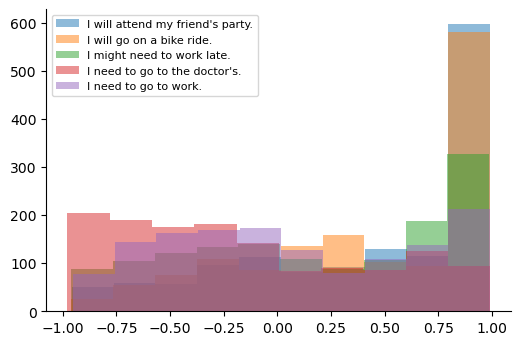

In [19]:
stems = ["I will attend my friend's party.", "I will go on a bike ride.", "I might need to work late.", "I need to go to the doctor's.", 'I need to go to work.',  ]

plt.figure(dpi=100)
for stem in stems:
    sel = np.array([True if stem in s else False for s in sentences ]).astype('bool')
    plt.hist(composite_rewards[sel], label=stem, alpha=0.5)
    plt.legend(fontsize=8)
sns.despine()

### Loading Training Data (32,000)

In [28]:
file = '../data/results/sentence_chains_I_5/generations_using2.txt'
f = open(file, "r")
sentences = f.readlines()
sentences = [s.replace('\n','') for s in sentences]
composite_rewards =[s.split('r_all=')[1] for s in sentences]
sentences_wo_rall = [s.split('r_all=')[0] for s in sentences]
state_rewards =  [np.array(s.split('r=')[-1].split(',')).astype('float') for s in sentences_wo_rall]


In [29]:
# removing some bad examples #
state_rewards2 = []
sentences2 = []
composite_rewards2 = []
for r,s,rc in zip(state_rewards, sentences, composite_rewards):
    if len(r)!=3:
        pass
    else:
        state_rewards2.append(r)
        sentences2.append(s)
        composite_rewards2.append(rc)
sentences = sentences2
state_rewards = np.array(state_rewards2)
composite_rewards = np.array(composite_rewards2).astype('float')

# choose rewards 
summed_rewards = state_rewards.sum(axis=1)
final_rewards = state_rewards[:,-1]


assert len(sentences) == len(final_rewards)

In [30]:
np.array(state_rewards)

array([[-0.75 ,  0.175,  0.963],
       [-0.797, -0.701, -0.851],
       [ 0.003, -0.493,  0.855],
       ...,
       [ 0.672,  0.752,  0.875],
       [ 0.16 , -0.053,  0.002],
       [-0.277,  0.972,  0.988]])

In [31]:
summed_rewards

array([ 0.388, -2.349,  0.365, ...,  2.299,  0.109,  1.683])

In [32]:
final_rewards

array([ 0.963, -0.851,  0.855, ...,  0.875,  0.002,  0.988])

In [33]:
composite_rewards

array([ 0.954, -0.827, -0.142, ...,  0.779,  0.479,  0.991])

In [34]:
len(sentences)
len(final_rewards)

32453

### Plotting the distributions

Text(0.5, 1.0, 'composite reward')

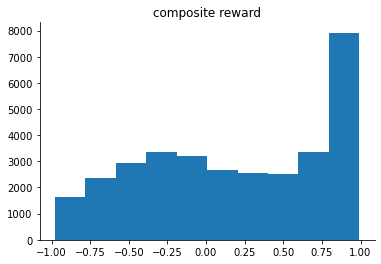

In [35]:
plt.hist(composite_rewards)
sns.despine()
plt.title('composite reward')

Text(0.5, 1.0, 'final reward')

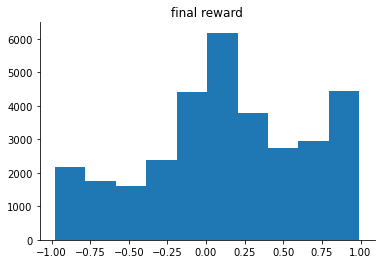

In [36]:
plt.hist(final_rewards)
sns.despine()
plt.title('final reward')

Text(0.5, 1.0, 'summed reward')

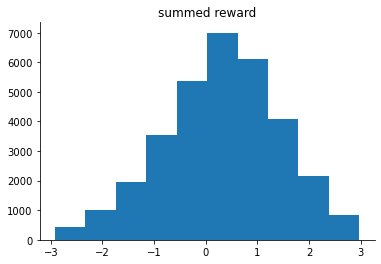

In [37]:
plt.hist(summed_rewards)
sns.despine()
plt.title('summed reward')

### Plotting the distributions (by stems)

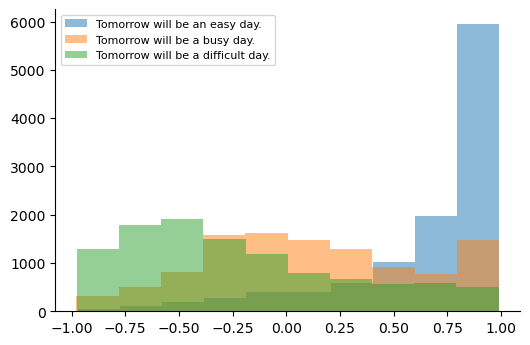

In [38]:
stems = ["Tomorrow will be an easy day.",
         "Tomorrow will be a busy day.",
         "Tomorrow will be a difficult day."]

plt.figure(dpi=100)
for stem in stems:
    sel = np.array([s.startswith(stem) for s in sentences]).astype('bool')
    plt.hist(composite_rewards[sel], label=stem, alpha=0.5)
    plt.legend(fontsize=8)
sns.despine()

In [39]:
stem in sentences[0]

False

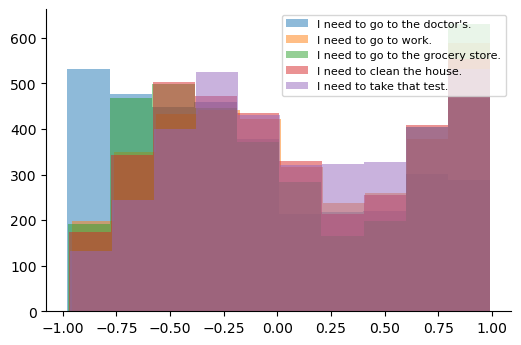

In [40]:
stems = ["I need to go to the doctor's.", 'I need to go to work.', 
         'I need to go to the grocery store.', 'I need to clean the house.',  'I need to take that test.',]

plt.figure(dpi=100)
for stem in stems:
    sel = np.array([True if stem in s else False for s in sentences ]).astype('bool')
    plt.hist(composite_rewards[sel], label=stem, alpha=0.5)
    plt.legend(fontsize=8)
sns.despine()

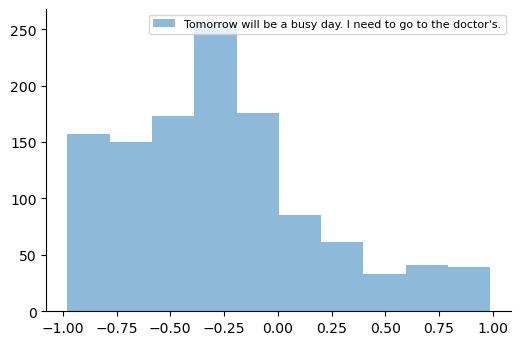

In [41]:
stems = ["Tomorrow will be a busy day. I need to go to the doctor's.", ]

plt.figure(dpi=100)
for stem in stems:
    sel = np.array([True if stem in s else False for s in sentences ]).astype('bool')
    plt.hist(composite_rewards[sel], label=stem, alpha=0.5)
    plt.legend(fontsize=8)
sns.despine()

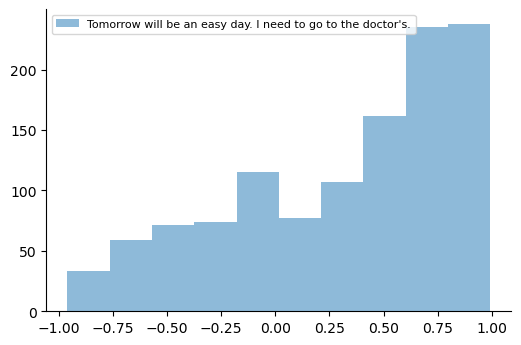

In [42]:
stems = ["Tomorrow will be an easy day. I need to go to the doctor's.", ]

plt.figure(dpi=100)
for stem in stems:
    sel = np.array([True if stem in s else False for s in sentences ]).astype('bool')
    plt.hist(composite_rewards[sel], label=stem, alpha=0.5)
    plt.legend(fontsize=8)
sns.despine()

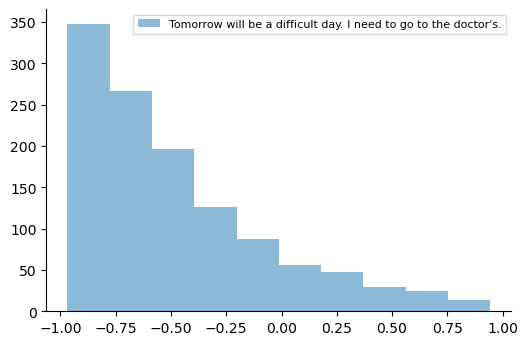

In [43]:
stems = ["Tomorrow will be a difficult day. I need to go to the doctor's.", ]

plt.figure(dpi=100)
for stem in stems:
    sel = np.array([True if stem in s else False for s in sentences ]).astype('bool')
    plt.hist(composite_rewards[sel], label=stem, alpha=0.5)
    plt.legend(fontsize=8)
sns.despine()

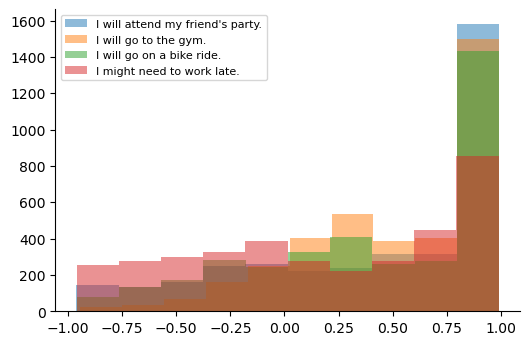

In [44]:
stems = ["I will attend my friend's party.", "I will go to the gym.", "I will go on a bike ride.", "I might need to work late." ]

plt.figure(dpi=100)
for stem in stems:
    sel = np.array([True if stem in s else False for s in sentences ]).astype('bool')
    plt.hist(composite_rewards[sel], label=stem, alpha=0.5)
    plt.legend(fontsize=8)
sns.despine()

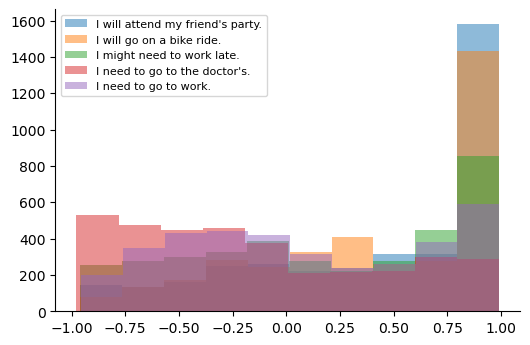

In [45]:
stems = ["I will attend my friend's party.", "I will go on a bike ride.", "I might need to work late.", "I need to go to the doctor's.", 'I need to go to work.',  ]

plt.figure(dpi=100)
for stem in stems:
    sel = np.array([True if stem in s else False for s in sentences ]).astype('bool')
    plt.hist(composite_rewards[sel], label=stem, alpha=0.5)
    plt.legend(fontsize=8)
sns.despine()

### Print some Negative Examples

#### Final rewards

In [46]:
sort_idx = np.argsort(final_rewards)
for s in np.array(sentences)[sort_idx][0:20]:
    print(s)
    print()

Tomorrow will be a busy day. I need to go to the doctor's. The doctors here are not very nice. They have been making me feel awful for a week. They are not very nice, and they are making me feel awful for a week. p=0.076,0.074,0.134 r=-0.97,-0.972,-0.978 r_all=-0.976

Tomorrow will be an easy day. I will attend my friend's party. I'm not really hungry. I'll eat something and then go to sleep. I have a really bad headache and it's starting to get worse. p=0.086,0.067,0.066 r=-0.592,0.179,-0.978 r_all=-0.474

Tomorrow will be a difficult day. I need to go to the grocery store. You see, my daughter is a big girl, and she is just as small as I am. I do not like her at all. I hate the way she walks, the way she talks, the way she acts. p=0.083,0.079,0.072 r=0.33,-0.973,-0.977 r_all=-0.976

Tomorrow will be an easy day. I need to go to the grocery store. I'm going to get a quick lunch. It's gonna be a little cold in here. What's the matter with you? You're such a wuss. p=0.071,0.075,0.072 r=

#### Summed Rewards

In [47]:
sort_idx = np.argsort(summed_rewards)
for s in np.array(sentences)[sort_idx][0:20]:
    print(s)
    print()

Tomorrow will be a busy day. I need to go to the doctor's. The doctors here are not very nice. They have been making me feel awful for a week. They are not very nice, and they are making me feel awful for a week. p=0.076,0.074,0.134 r=-0.97,-0.972,-0.978 r_all=-0.976

Tomorrow will be an easy day. I need to go to work. I don't like this, I don't like the weather. I don't like the news. I don't like being here. p=0.082,0.103,0.107 r=-0.976,-0.961,-0.967 r_all=-0.953

Tomorrow will be an easy day. I need to go to the grocery store. I think I'm getting sick of this. What the hell is this thing? I can't believe this. This is terrible. p=0.075,0.086,0.088 r=-0.96,-0.961,-0.963 r_all=-0.971

Tomorrow will be a busy day. I need to go to the doctor's. I've been vomiting for the past few days, and it's getting worse. I can't stand it anymore. I want to die. p=0.076,0.091,0.083 r=-0.981,-0.952,-0.949 r_all=-0.978

Tomorrow will be a difficult day. I need to clean the house. I'm not happy with my

#### Composite Rewards

In [48]:
sort_idx = np.argsort(composite_rewards)
for s in np.array(sentences)[sort_idx][0:20]:
    print(s)
    print()

Tomorrow will be a busy day. I need to go to the doctor's. I've been vomiting for the past few days, and it's getting worse. I can't stand it anymore. I want to die. p=0.076,0.091,0.083 r=-0.981,-0.952,-0.949 r_all=-0.978

Tomorrow will be a busy day. I need to go to the doctor's. The doctors here are not very nice. They have been making me feel awful for a week. They are not very nice, and they are making me feel awful for a week. p=0.076,0.074,0.134 r=-0.97,-0.972,-0.978 r_all=-0.976

Tomorrow will be a difficult day. I need to go to the grocery store. You see, my daughter is a big girl, and she is just as small as I am. I do not like her at all. I hate the way she walks, the way she talks, the way she acts. p=0.083,0.079,0.072 r=0.33,-0.973,-0.977 r_all=-0.976

Tomorrow will be a difficult day. I need to clean the house. And that is the worst part of this whole thing. I'm so tired and frustrated. I just don't want to go to sleep anymore. p=0.081,0.095,0.069 r=-0.97,-0.955,-0.95 r_al

### Print some Positive Examples

#### Final rewards

In [49]:
sort_idx = np.argsort(final_rewards)
for s in np.array(sentences)[sort_idx][-20:]:
    print(s)
    print()

Tomorrow will be a difficult day. I will go to the gym. I have to be strong and I have to do what I have to do. I will do my best to win the Olympic Games. It is a great honor to be part of this team. p=0.082,0.072,0.088 r=0.516,0.903,0.991 r_all=0.943

Tomorrow will be a busy day. I will attend my friend's party. This is the first time I have been to a friend's party. I wonder what's going on? I am still in shock, as I am so young. I am so happy to see my friend again. p=0.072,0.071,0.076 r=0.418,-0.661,0.991 r_all=0.982

Tomorrow will be a busy day. I might need to work late. But I'm excited about it. It's the first time I'm doing a solo show and I'm excited about it. I'm excited about the show. p=0.075,0.072,0.118 r=0.967,0.988,0.991 r_all=0.988

Tomorrow will be an easy day. I will go to the gym. I will do the exercises I used to do. I will go to the park and do some jogging. My mind is just open and I am so excited about this day. p=0.087,0.076,0.098 r=0.11,0.389,0.991 r_all=0.989

#### Summed Rewards

In [50]:
sort_idx = np.argsort(summed_rewards)
for s in np.array(sentences)[sort_idx][-20:]:
    print(s)
    print()

Tomorrow will be a difficult day. I will go on a bike ride. I can't wait. I am so excited. I am excited to be riding with the guys. p=0.09,0.083,0.102 r=0.965,0.987,0.99 r_all=0.985

Tomorrow will be an easy day. I will attend my friend's party. It is a huge party and the biggest one we have ever had. There are a lot of people and the food is amazing. It will be a great day. p=0.078,0.069,0.114 r=0.972,0.983,0.987 r_all=0.992

Tomorrow will be a busy day. I will attend my friend's party. I am looking forward to that! to the end of the last message. I'm glad to hear from you again. How are you? You're doing great, I'm glad to hear. p=0.075,0.153,0.087 r=0.977,0.985,0.983 r_all=0.99

Tomorrow will be a difficult day. I need to go to the grocery store. It is good to see you. It was good to see you last night. This is great news. p=0.096,0.08,0.092 r=0.976,0.988,0.982 r_all=0.95

Tomorrow will be an easy day. I will attend my friend's party. It will be a beautiful day. This is a nice day. 

#### Composite Rewards

In [51]:
sort_idx = np.argsort(composite_rewards)
for s in np.array(sentences)[sort_idx][-20:]:
    print(s)
    print()

Tomorrow will be an easy day. I will attend my friend's party. I will spend some time with my family. This is the best part of my life, to be with my friends. I will be celebrating, I will be happy. p=0.098,0.069,0.082 r=0.486,0.99,0.986 r_all=0.992

Tomorrow will be an easy day. I will attend my friend's party. We have a lot of fun. I love the people in this city. I love your city. p=0.071,0.071,0.073 r=0.966,0.988,0.979 r_all=0.992

Tomorrow will be an easy day. I will attend my friend's party. It is a great party. It is so much fun, I love it so much. This is my first time ever going to a party like this. p=0.076,0.077,0.083 r=0.979,0.99,0.056 r_all=0.992

Tomorrow will be a busy day. I will attend my friend's party. I will also go to the store to pick up a few items. I am so excited to see my new friends. I am really looking forward to this new place. p=0.096,0.109,0.095 r=0.106,0.991,0.99 r_all=0.992

Tomorrow will be an easy day. I need to go to the doctor's. I'm so excited to se

### Examing RL Models

In [12]:
def load_rl_model(epoch=48, hidden_dim =100, n_quantiles = 10, extra = '_composite_rewards',
                  folder = 'sentence_chains_I_4',huber=0.1):

    filename='../data/results/'+folder+'/'
    filename+=f'quantile_learner_{hidden_dim}_{huber}{extra}/log_quantile_learner_epoch{epoch}.pkl'

    Z_network = TD_Learner(config.n_embd, n_quantiles, hidden_dim=hidden_dim)
    Z_network.load_state_dict(torch.load(filename.replace('log_',''),map_location=torch.device('cpu')))

    log = pickle.load(open(filename,'rb'))
    loss = np.array(log['loss'])
    epoch = np.array(log['epoch'])
    
    taus = (2 * np.arange(n_quantiles) + 1) / (2.0 * n_quantiles)
    
    out = {'Z_network': Z_network,
             'loss': loss,
           'taus' : taus,
          'log':log,
          'epoch':epoch}
    return(out)

In [13]:
def plot_examples(examples, sentences, rewards, tokenizer, model, Z_network, taus):
    
    for example in examples:
    
        plt.figure(figsize=(6,3), dpi=100)
        
        inputs = tokenizer(example, return_tensors='pt').to(device)
        
        with torch.no_grad():
            input_ids = inputs['input_ids']
            mask = inputs['attention_mask']
            output = model(input_ids=input_ids,
                           attention_mask=mask,
                           output_hidden_states=True)
            states = output['hidden_states'][-1]
            states, _ = average_states_by_period(states, mask.unsqueeze(-1), input_ids, device,
                                                n_periods=example.count('.'), period_tok_id=13, pad_tok_id=50256)

            
            theta_hats = Z_network(states).detach().cpu().numpy().round(2)
            theta_hats_last = theta_hats[:,-1,:].squeeze()

            for theta in theta_hats_last:
                plt.axvline(x=theta, linestyle='--', linewidth=0.5)

            sel = np.array([example in s for s in sentences]).astype('bool')
            if np.sum(sel)>0:
                thetas = [np.quantile(rewards[sel].squeeze(), q) for q in taus]
                for theta in thetas:
                    plt.axvline(x=theta, ymax=0.5, linestyle='--', linewidth=0.5, color='k')

            plt.xlim([-1.5,1.5])
            plt.axhline(y=0., color='k')
            sns.despine()
            plt.title(example)

#### Load GPT2

In [14]:
model = GPT2LMHeadModel.from_pretrained(modelname)
device='cpu'

#### 100 Hidden Units (20 Epochs)

In [51]:
out = load_rl_model(epoch=19, hidden_dim =100, n_quantiles = 10, extra = '_composite_rewards_slow_lr',
                          folder = 'sentence_chains_I_5',huber=0.1)

In [52]:
v5_stems_1 =["Tomorrow will be an easy day.",
           "Tomorrow will be a busy day.",
           "Tomorrow will be a difficult day."]
v5_stems_2 = ["I need to go to the doctor's.", 'I need to go to work.', 
         'I need to go to the grocery store.', 'I need to clean the house.',  'I need to take that test.']

v5_stems = []
for v5_1 in v5_stems_1:
    for v5_2 in v5_stems_2:
        v5_stems.append(v5_1+' '+v5_2)

In [53]:
v5_stems[0:2]

["Tomorrow will be an easy day. I need to go to the doctor's.",
 'Tomorrow will be an easy day. I need to go to work.']

##### Tracked Sentences

In [54]:
tracked_sentences = [key for key in out['log'].keys() if key not in ['loss','epoch']]

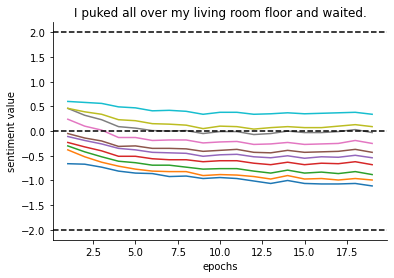

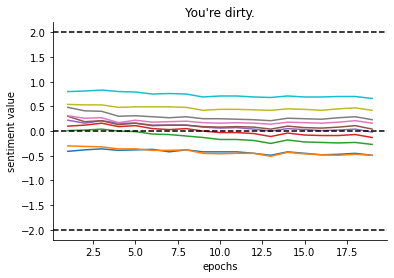

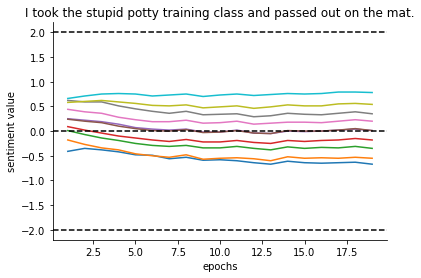

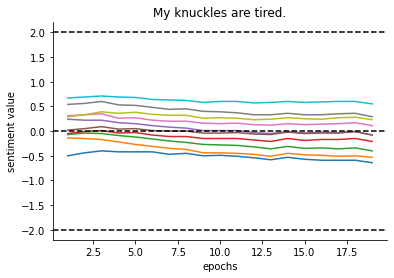

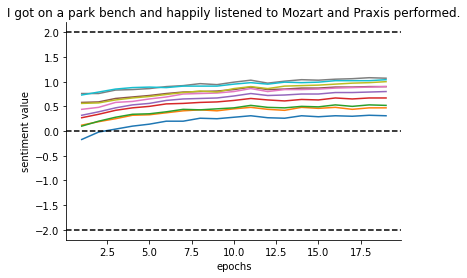

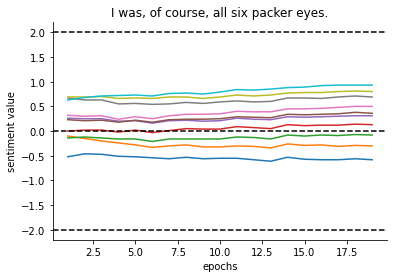

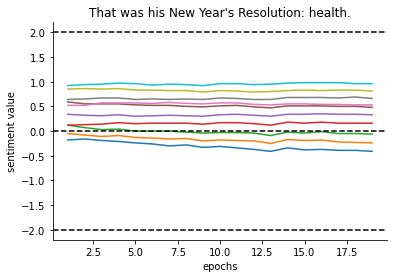

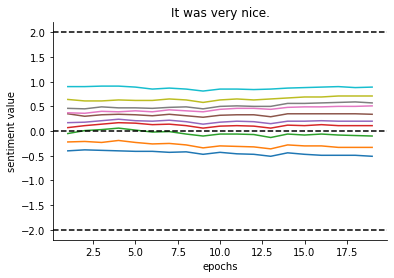

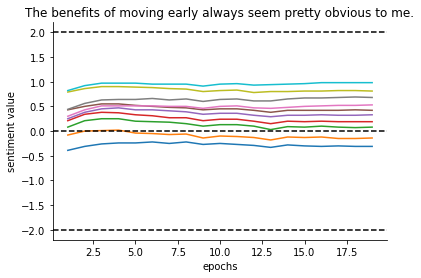

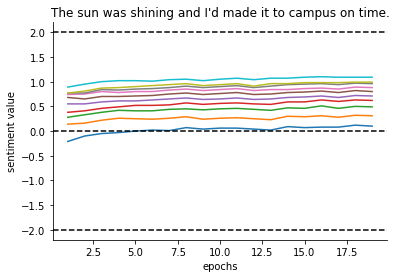

In [55]:
for sent in tracked_sentences:
    plt.figure()
    plt.plot(out['epoch'], np.array(out['log'][sent]))
    sns.despine()
    plt.axhline(y=-2, color='k', linestyle='--')
    plt.axhline(y=0, color='k', linestyle='--')
    plt.axhline(y=2, color='k', linestyle='--')
    plt.ylabel('sentiment value')
    plt.xlabel('epochs')
    plt.title(sent)

##### Stems (part 1)

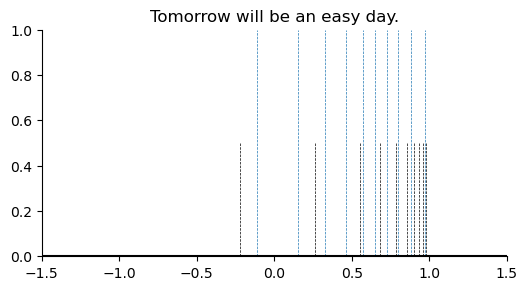

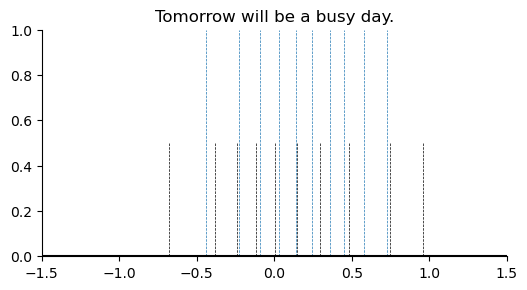

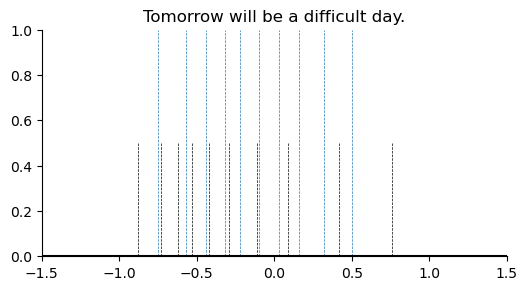

In [56]:
plot_examples(v5_stems_1, sentences, composite_rewards, tokenizer, model, 
              out['Z_network'], out['taus'])

##### Stems (part 2)

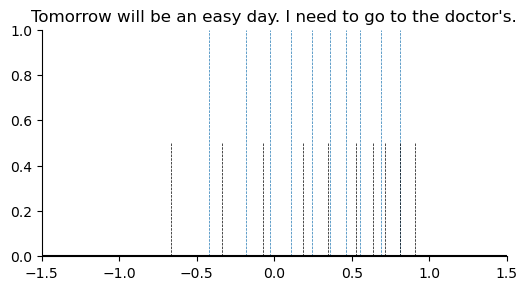

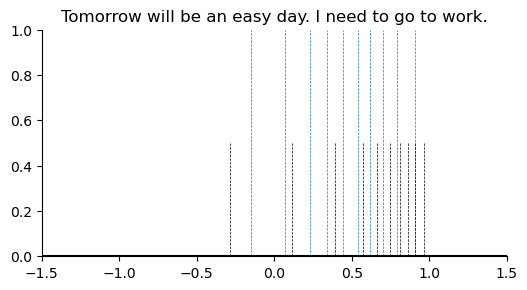

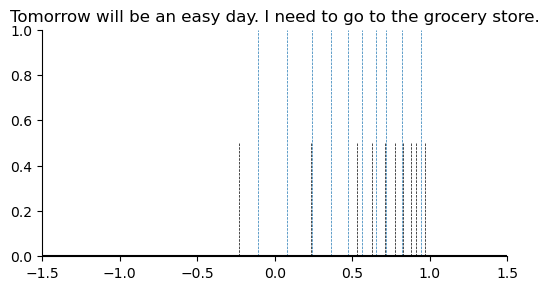

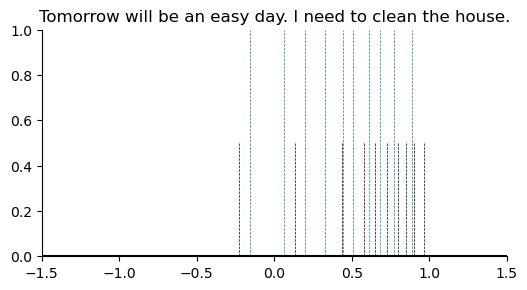

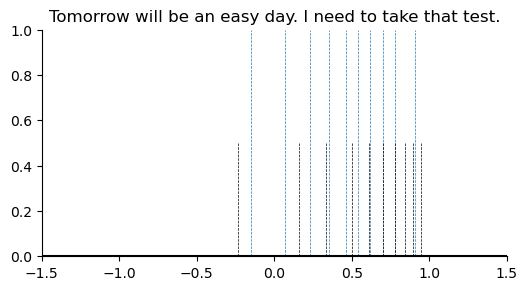

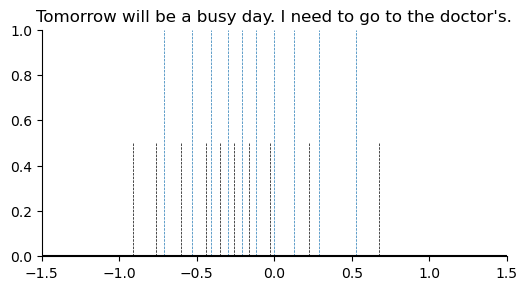

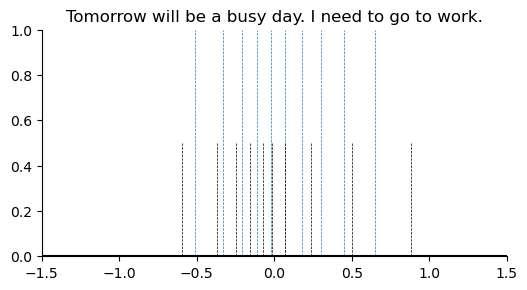

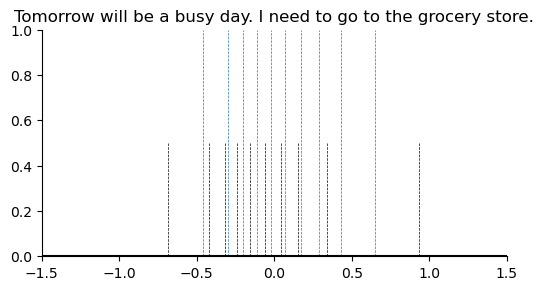

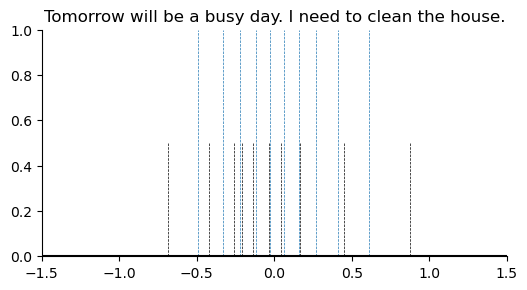

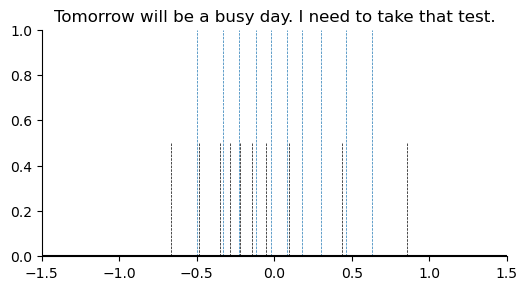

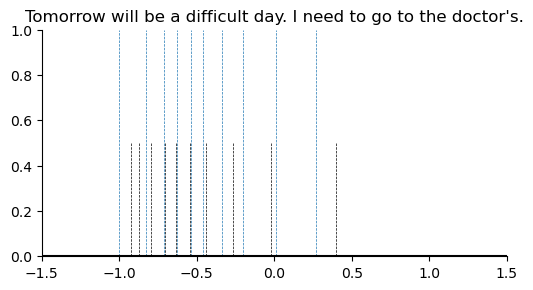

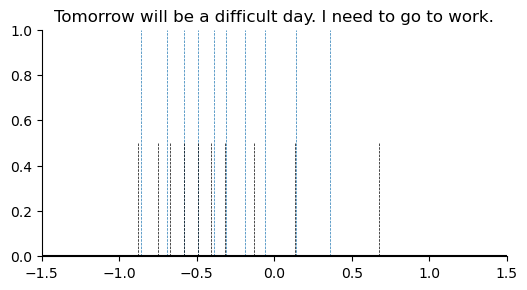

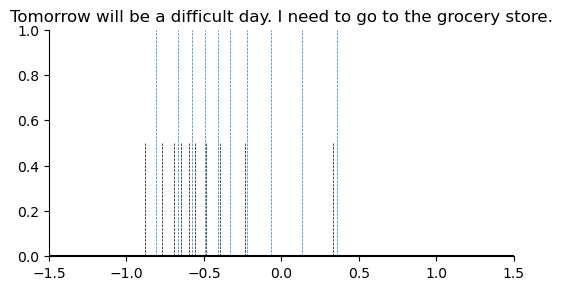

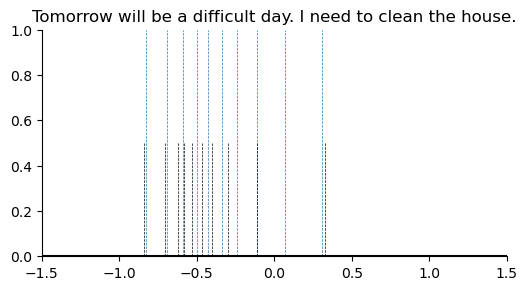

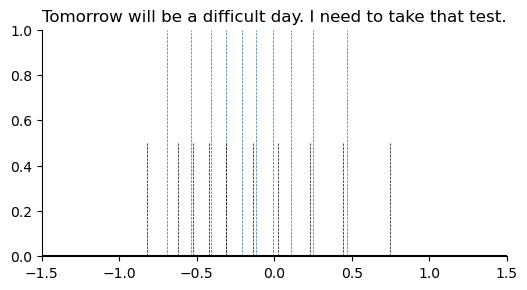

In [57]:
plot_examples(v5_stems, sentences, composite_rewards, tokenizer, model, 
              out['Z_network'], out['taus'])

##### Random Examples

In [58]:
np.random.seed(1)
rand_examples = [s.split('p=')[0].strip() for s in np.random.choice(sentences, 10)]
rand_examples

['Tomorrow will be a difficult day. I need to go to the grocery store. I need to get my son some groceries. I need to get a car. I need to do this.',
 "Tomorrow will be an easy day. I need to go to work. I need to be there. I can't do it without you. I need to get up.",
 "Tomorrow will be a difficult day. I need to clean the house. I need to make sure everyone's OK. I need to help the people who are here. I need to make sure that we are all OK.",
 'Tomorrow will be an easy day. I need to clean the house. I need to get ready for work. I need to go for a walk. I need to take a shower.',
 "Tomorrow will be a difficult day. I need to go to the doctor's. I need to go to the hospital. I need to talk to them. I need to come home.",
 "Tomorrow will be a difficult day. I need to go to the grocery store. I need to get my medication. I need to be ready to go to school tomorrow morning. I need to be sure that I don't need to be in the hospital.",
 'Tomorrow will be an easy day. I will go on a bike

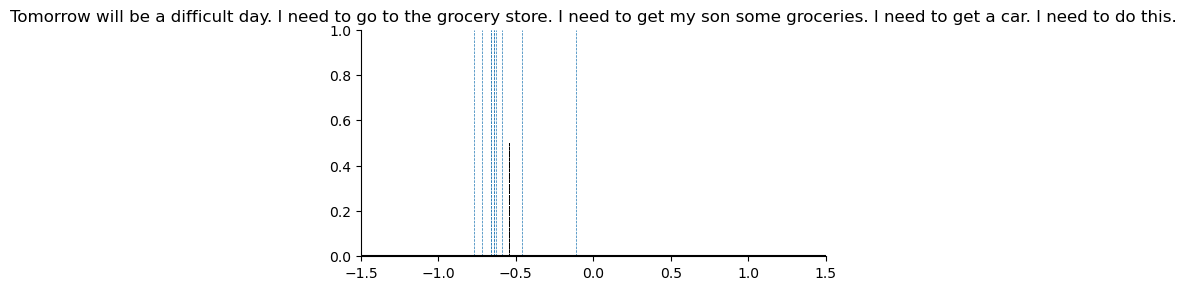

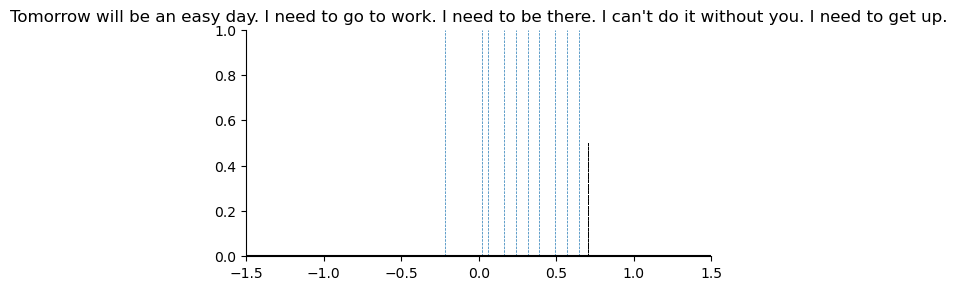

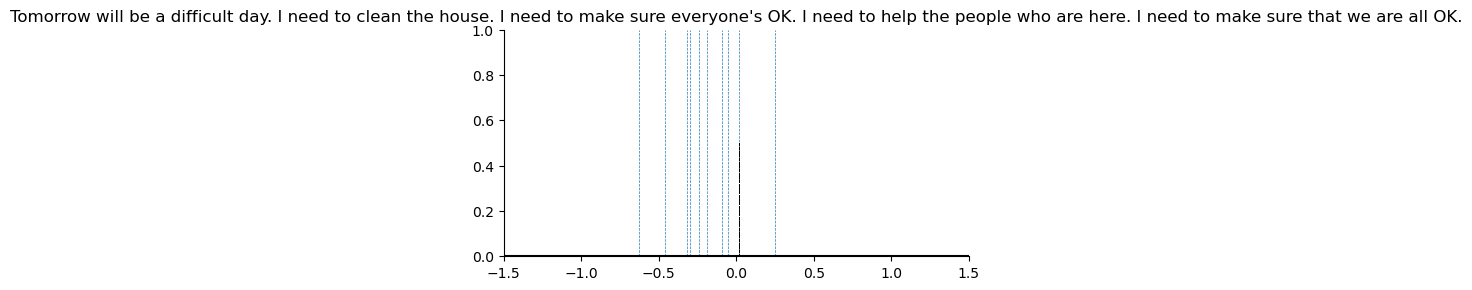

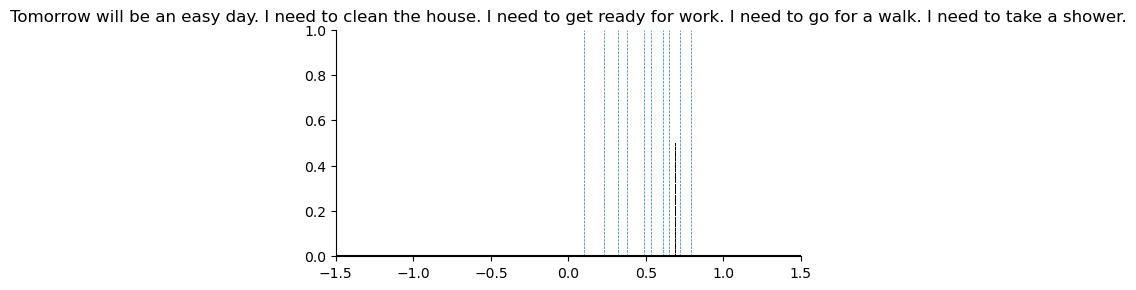

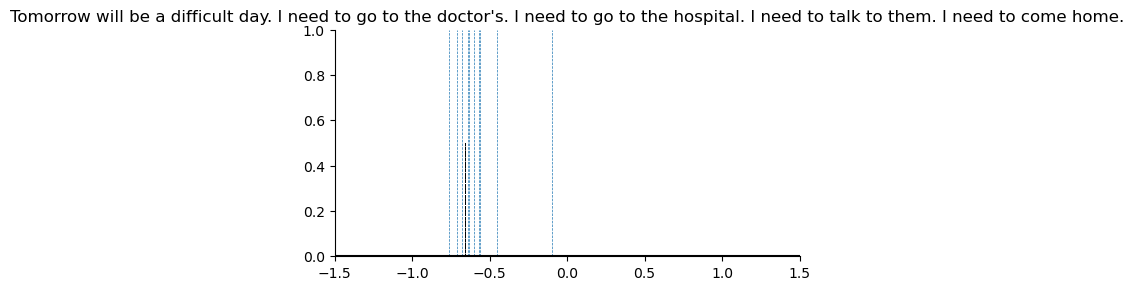

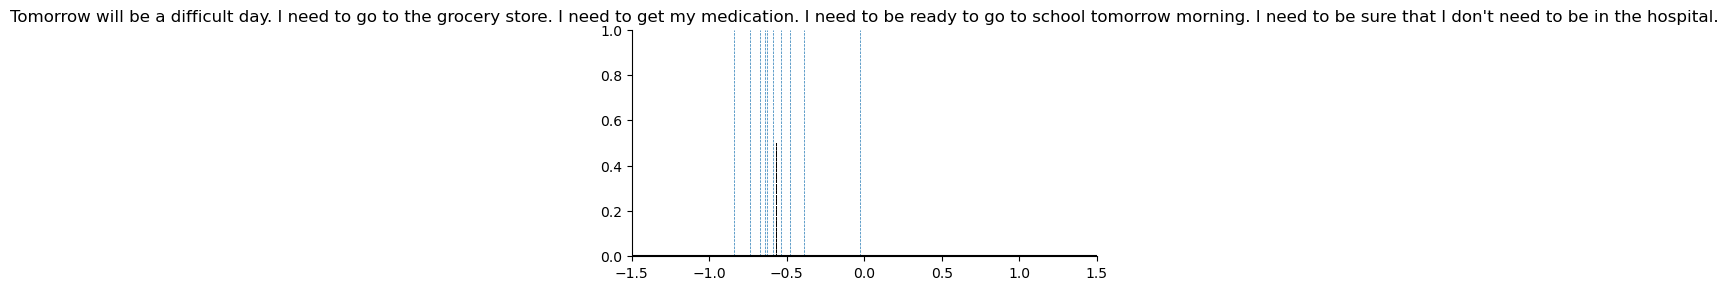

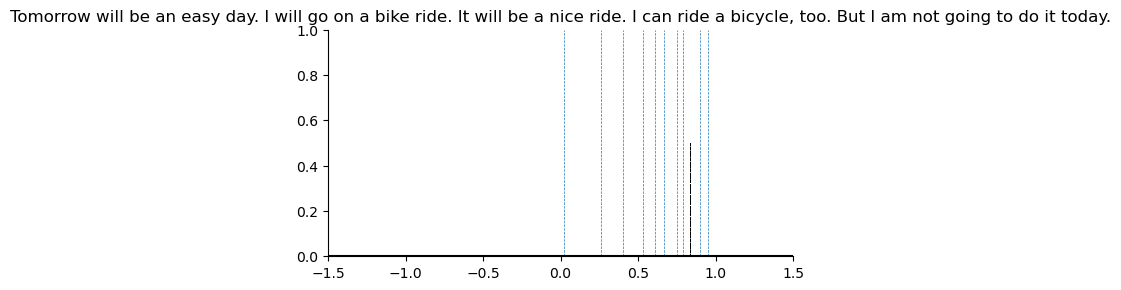

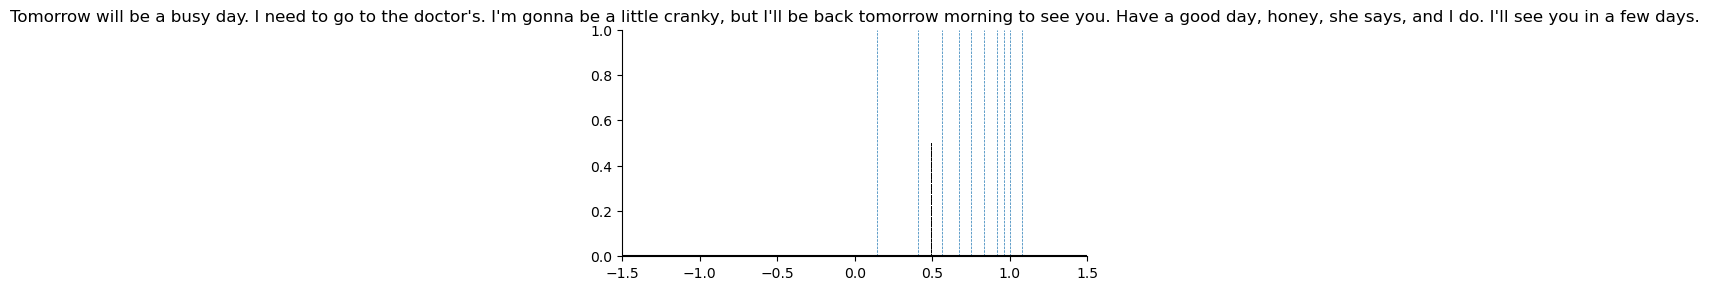

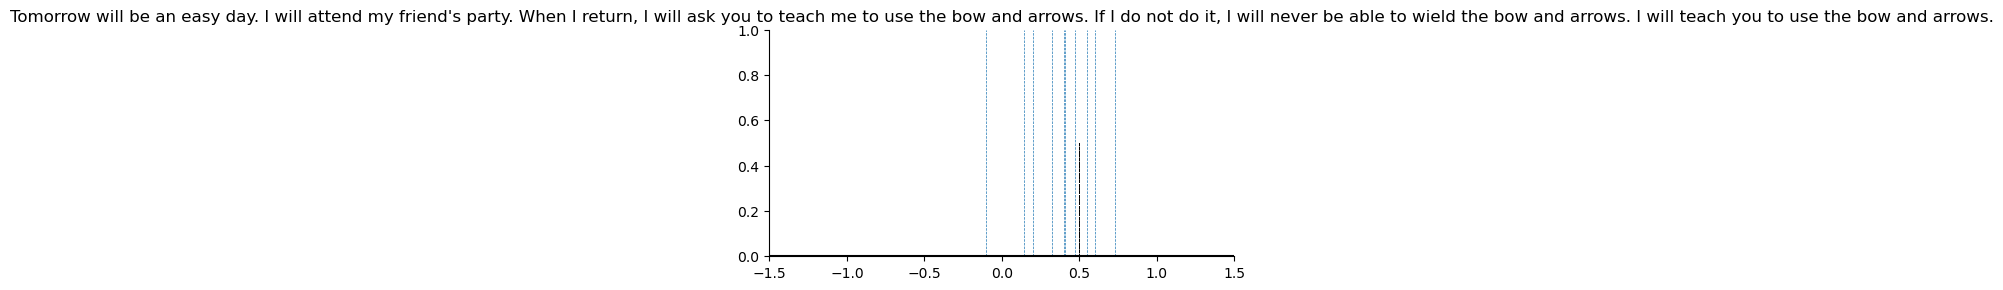

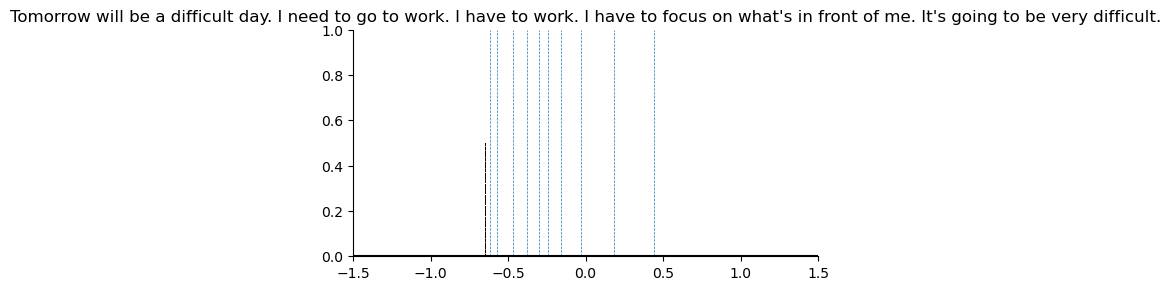

In [59]:
plot_examples(rand_examples, sentences, composite_rewards, tokenizer, model, 
              out['Z_network'], out['taus'])

##### Manual Examples

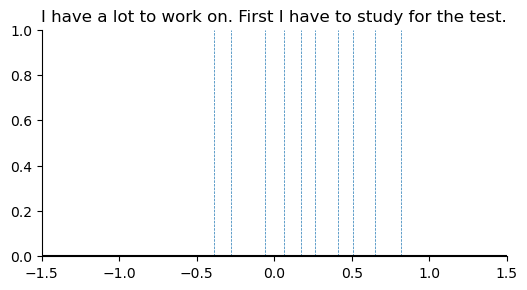

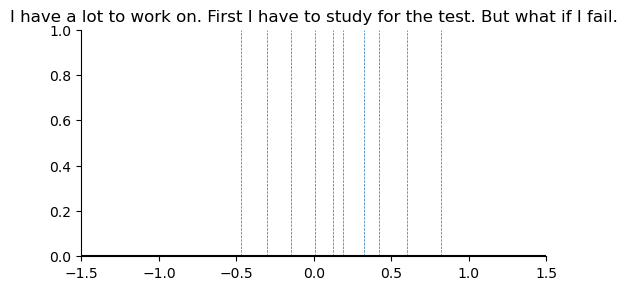

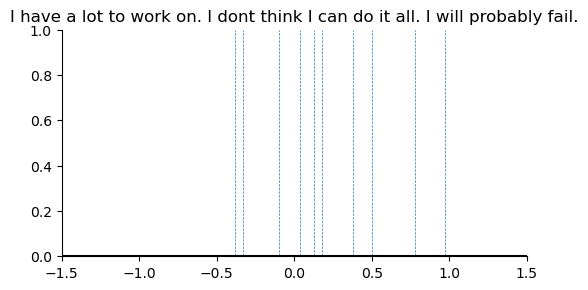

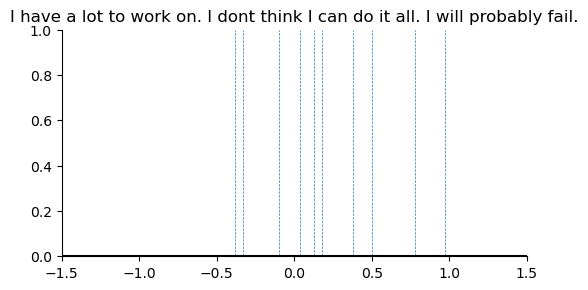

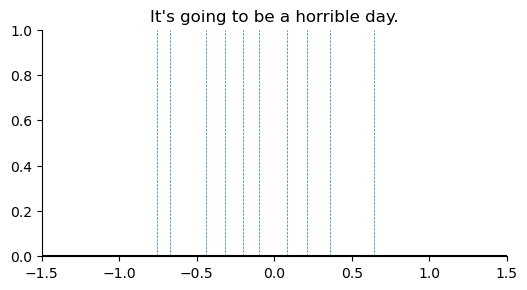

In [60]:
examples = ['I have a lot to work on. First I have to study for the test.',
            'I have a lot to work on. First I have to study for the test. But what if I fail.',
            'I have a lot to work on. I dont think I can do it all. I will probably fail.',
            'I have a lot to work on. I dont think I can do it all. I will probably fail.',
            "It's going to be a horrible day.",
           ]

plot_examples(examples, sentences, composite_rewards, tokenizer, model, 
              out['Z_network'], out['taus'])

#### 100 Hidden Units (48 Epochs) (faster lr)

In [101]:
out = load_rl_model(epoch=48, hidden_dim =100, n_quantiles = 10, extra = '_composite_rewards',
                          folder = 'sentence_chains_I_5',huber=0.1)

In [102]:
v5_stems_1 =["Tomorrow will be an easy day.",
           "Tomorrow will be a busy day.",
           "Tomorrow will be a difficult day."]
v5_stems_2 = ["I need to go to the doctor's.", 'I need to go to work.', 
         'I need to go to the grocery store.', 'I need to clean the house.',  'I need to take that test.']

v5_stems = []
for v5_1 in v5_stems_1:
    for v5_2 in v5_stems_2:
        v5_stems.append(v5_1+' '+v5_2)

In [103]:
v5_stems[0:2]

["Tomorrow will be an easy day. I need to go to the doctor's.",
 'Tomorrow will be an easy day. I need to go to work.']

##### Tracked Sentences

In [64]:
tracked_sentences = [key for key in out['log'].keys() if key not in ['loss','epoch']]

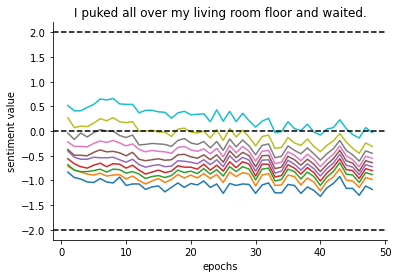

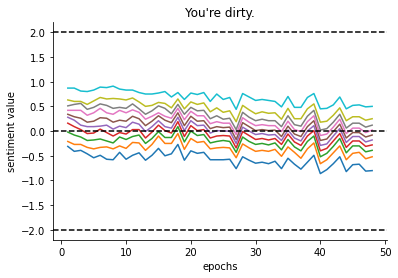

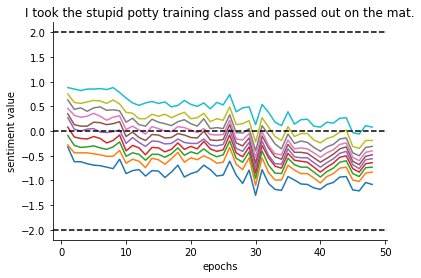

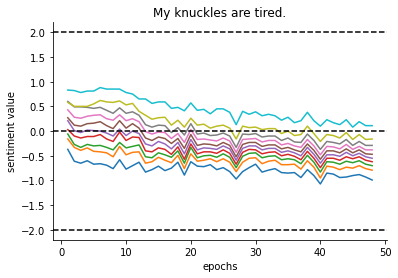

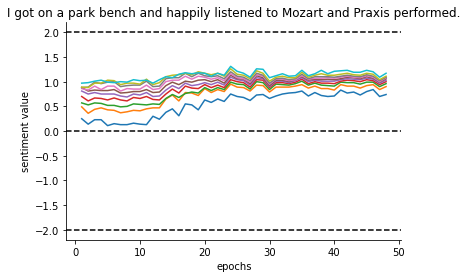

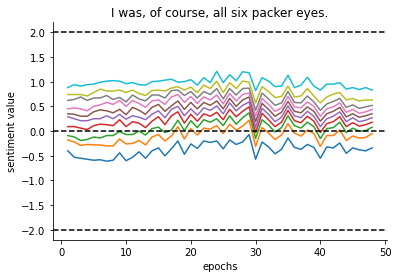

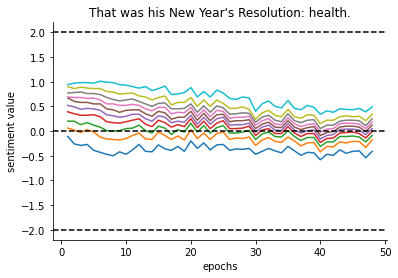

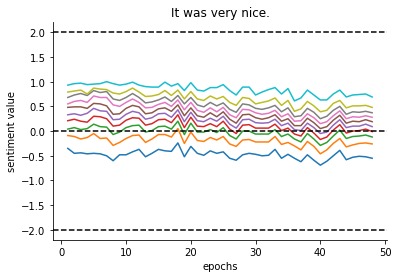

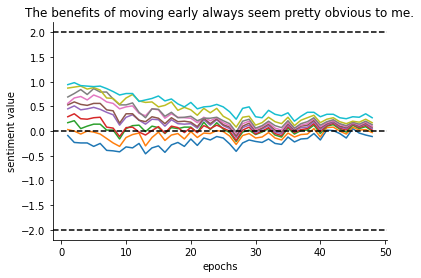

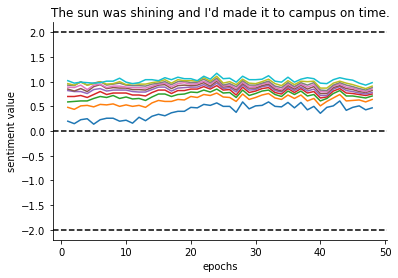

In [65]:
for sent in tracked_sentences:
    plt.figure()
    plt.plot(out['epoch'], np.array(out['log'][sent]))
    sns.despine()
    plt.axhline(y=-2, color='k', linestyle='--')
    plt.axhline(y=0, color='k', linestyle='--')
    plt.axhline(y=2, color='k', linestyle='--')
    plt.ylabel('sentiment value')
    plt.xlabel('epochs')
    plt.title(sent)

##### Stems (part 1)

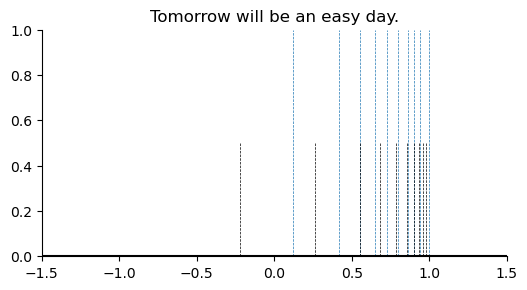

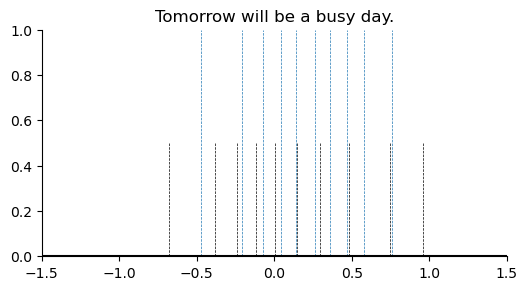

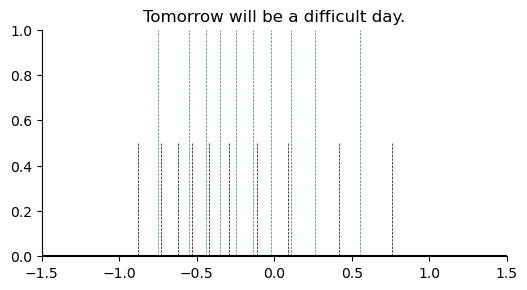

In [66]:
plot_examples(v5_stems_1, sentences, composite_rewards, tokenizer, model, 
              out['Z_network'], out['taus'])

##### Stems (part 2)

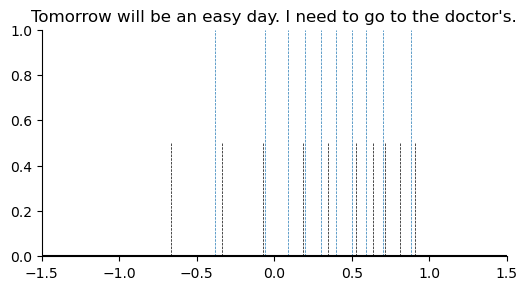

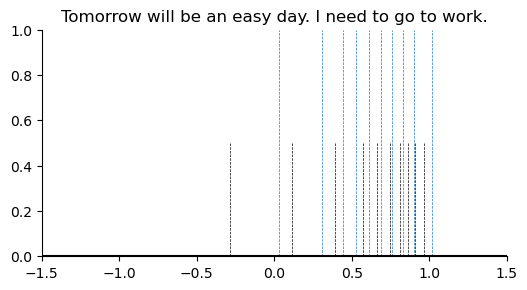

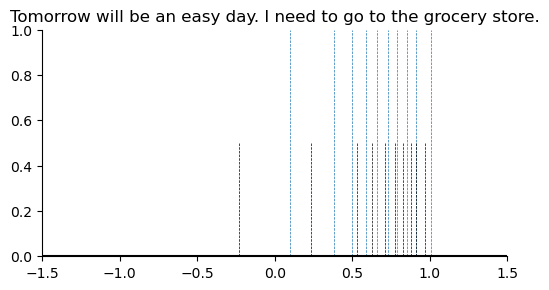

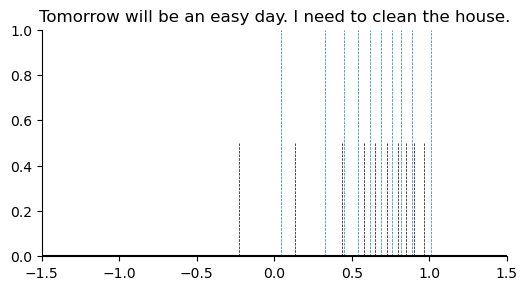

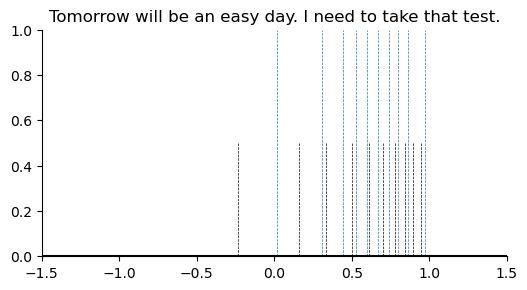

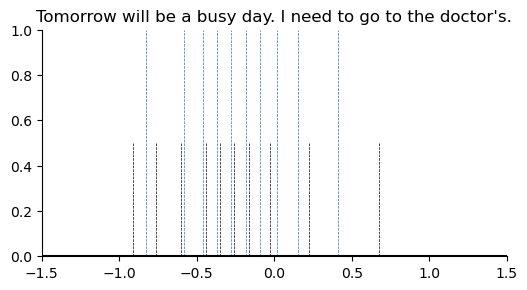

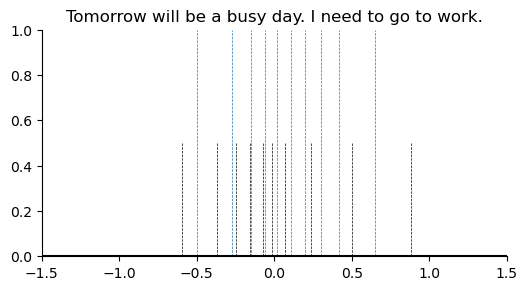

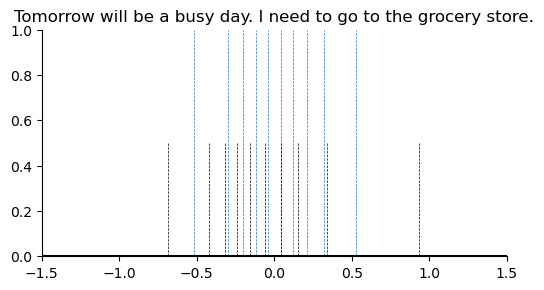

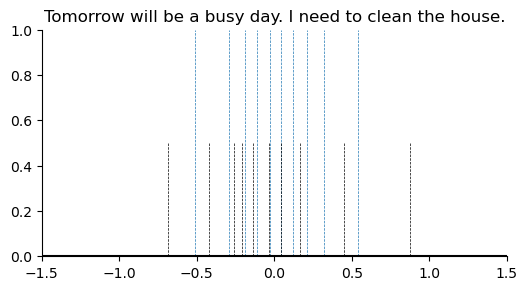

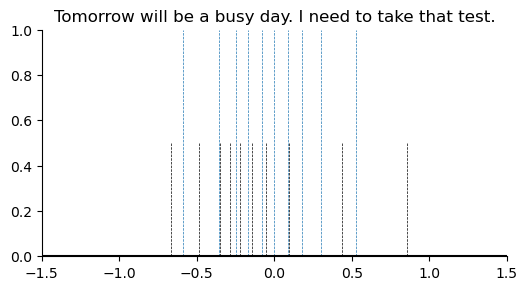

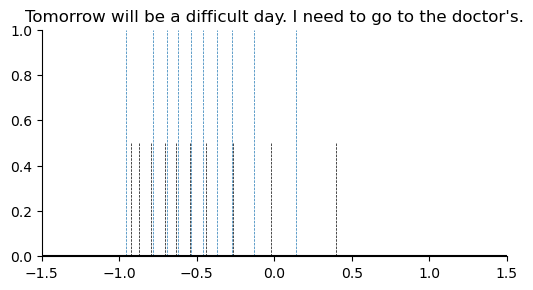

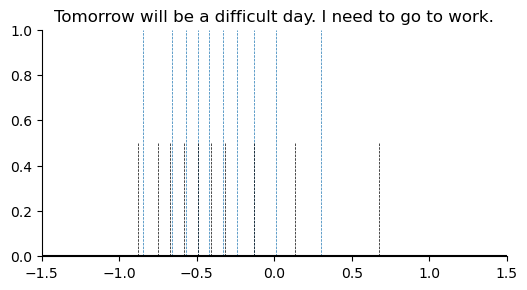

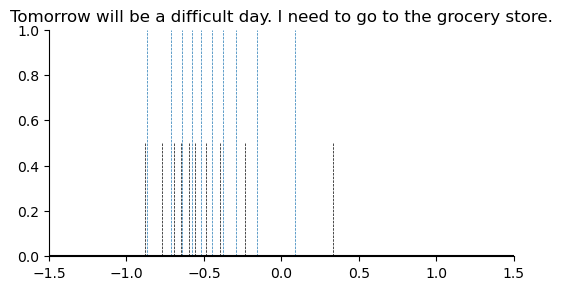

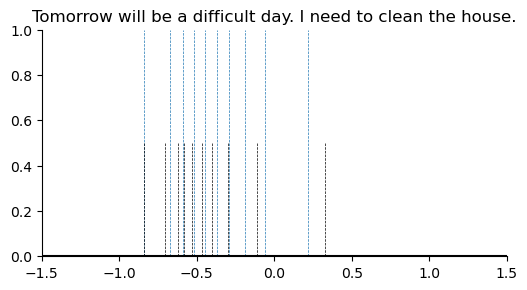

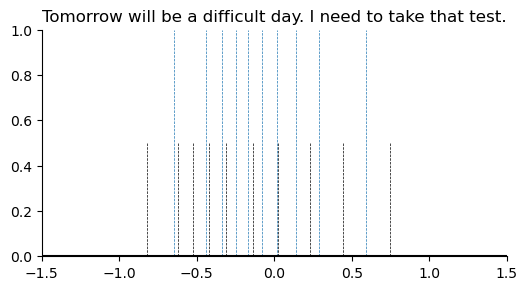

In [67]:
plot_examples(v5_stems, sentences, composite_rewards, tokenizer, model, 
              out['Z_network'], out['taus'])

##### Random Examples

In [68]:
np.random.seed(1)
rand_examples = [s.split('p=')[0].strip() for s in np.random.choice(sentences, 10)]
rand_examples

['Tomorrow will be a difficult day. I need to go to the grocery store. I need to get my son some groceries. I need to get a car. I need to do this.',
 "Tomorrow will be an easy day. I need to go to work. I need to be there. I can't do it without you. I need to get up.",
 "Tomorrow will be a difficult day. I need to clean the house. I need to make sure everyone's OK. I need to help the people who are here. I need to make sure that we are all OK.",
 'Tomorrow will be an easy day. I need to clean the house. I need to get ready for work. I need to go for a walk. I need to take a shower.',
 "Tomorrow will be a difficult day. I need to go to the doctor's. I need to go to the hospital. I need to talk to them. I need to come home.",
 "Tomorrow will be a difficult day. I need to go to the grocery store. I need to get my medication. I need to be ready to go to school tomorrow morning. I need to be sure that I don't need to be in the hospital.",
 'Tomorrow will be an easy day. I will go on a bike

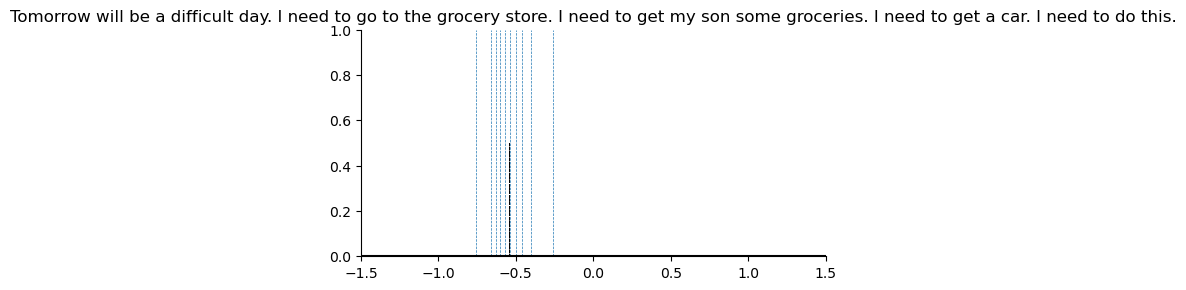

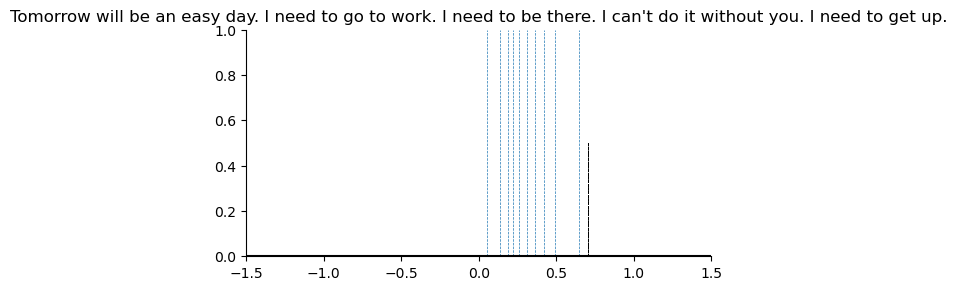

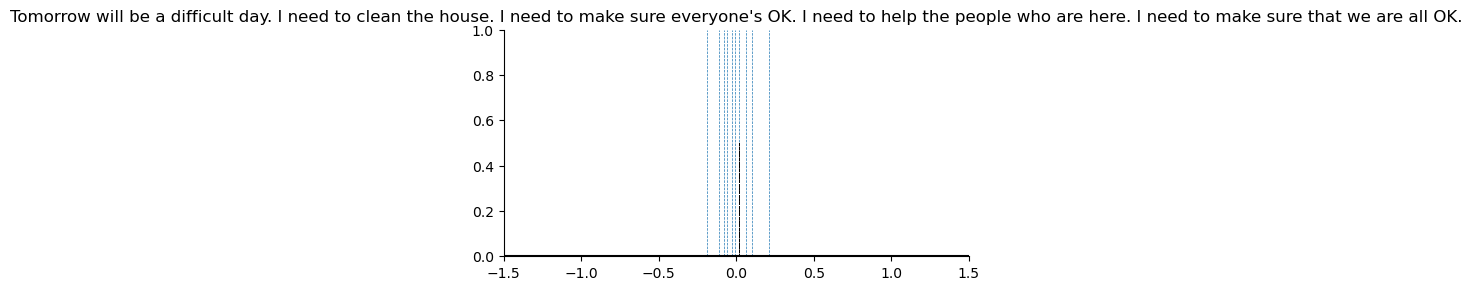

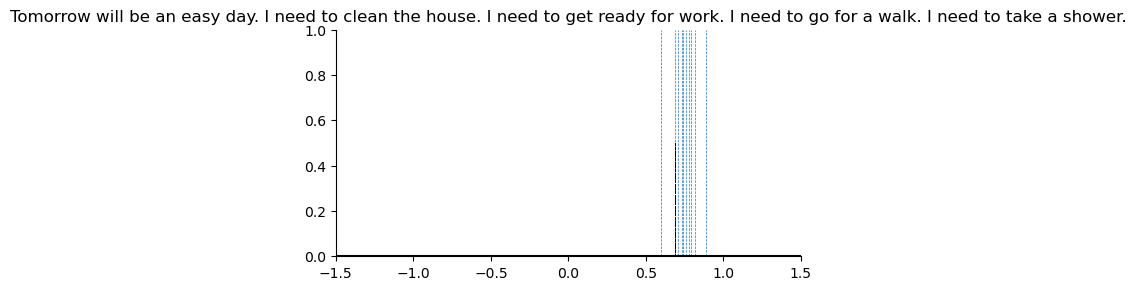

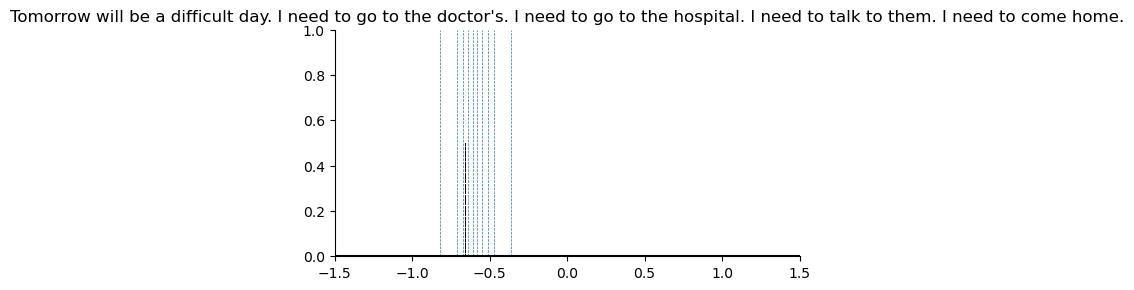

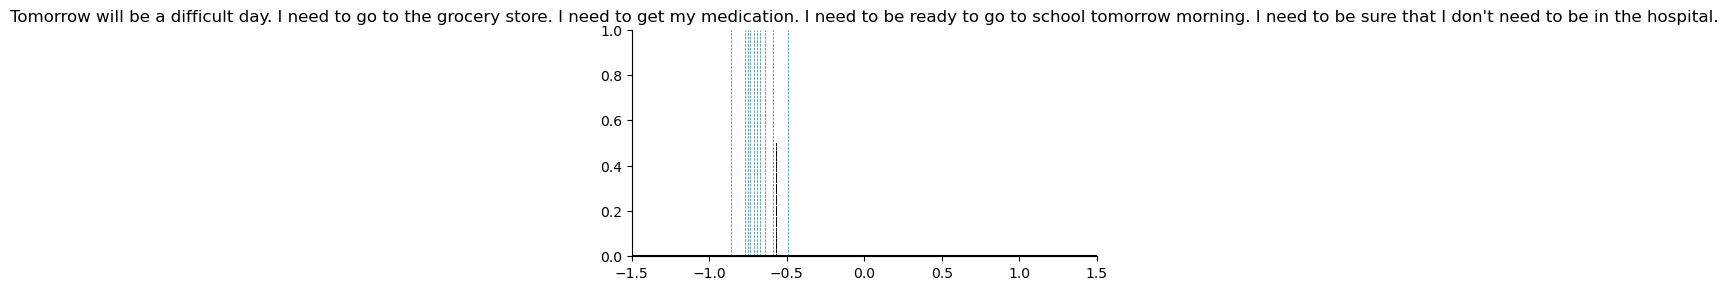

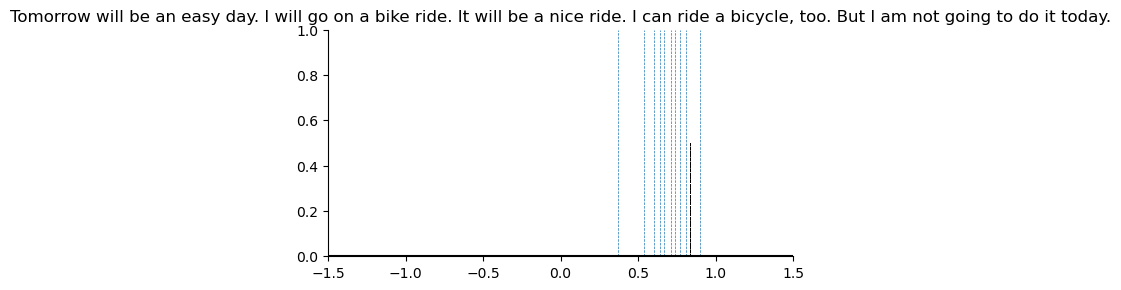

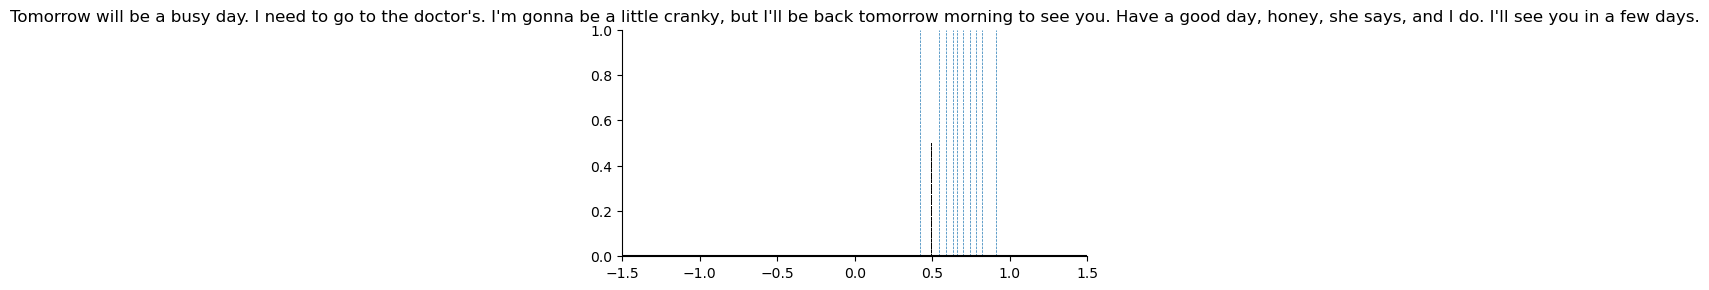

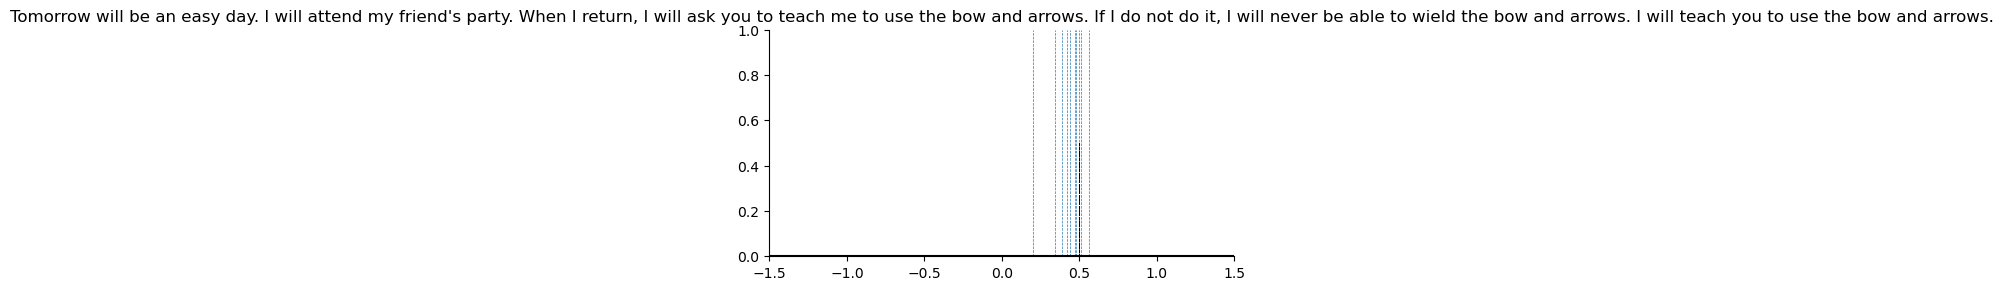

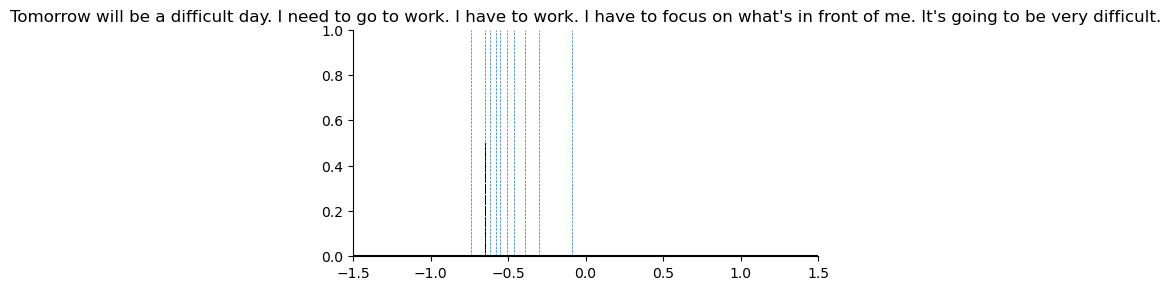

In [69]:
plot_examples(rand_examples, sentences, composite_rewards, tokenizer, model, 
              out['Z_network'], out['taus'])

##### Manual Examples

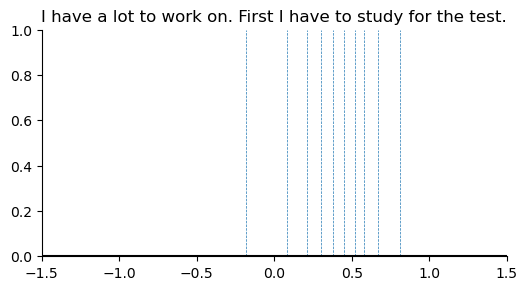

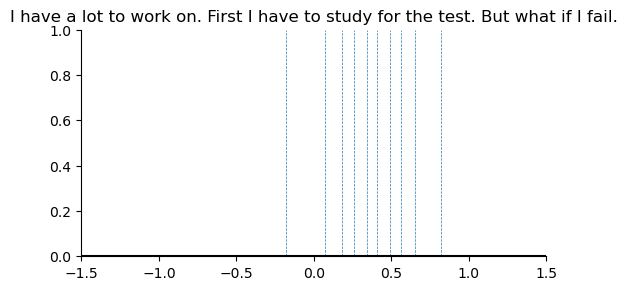

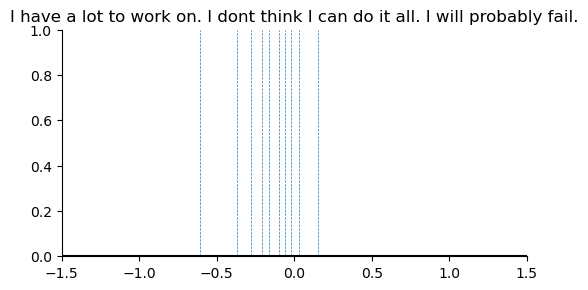

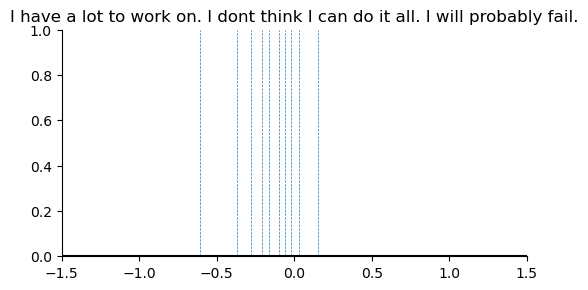

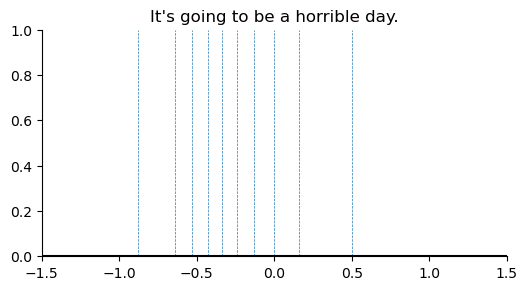

In [70]:
examples = ['I have a lot to work on. First I have to study for the test.',
            'I have a lot to work on. First I have to study for the test. But what if I fail.',
            'I have a lot to work on. I dont think I can do it all. I will probably fail.',
            'I have a lot to work on. I dont think I can do it all. I will probably fail.',
            "It's going to be a horrible day.",
           ]

plot_examples(examples, sentences, composite_rewards, tokenizer, model, 
              out['Z_network'], out['taus'])

##### Extra

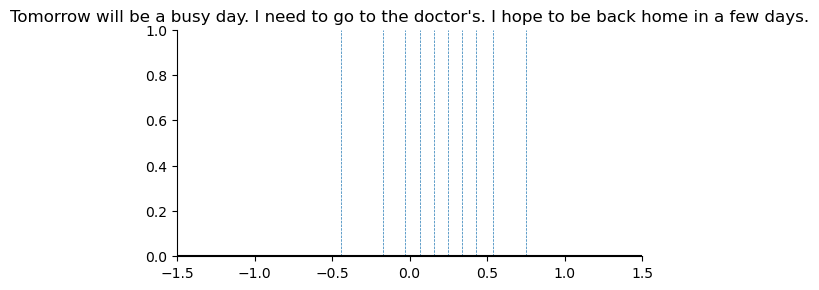

In [104]:
examples = ["Tomorrow will be a busy day. I need to go to the doctor's. I hope to be back home in a few days."
           ]f

plot_examples(examples, sentences, composite_rewards, tokenizer, model, 
              out['Z_network'], out['taus'])

#### 3x data 100 Hidden Units (100 Epochs) (faster lr)

In [16]:
out = load_rl_model(epoch=98, hidden_dim =100, n_quantiles = 10, extra = '_composite_rewards_2',
                          folder = 'sentence_chains_I_5',huber=0.1)

In [17]:
v5_stems_1 =["Tomorrow will be an easy day.",
           "Tomorrow will be a busy day.",
           "Tomorrow will be a difficult day."]
v5_stems_2 = ["I need to go to the doctor's.", 'I need to go to work.', 
         'I need to go to the grocery store.', 'I need to clean the house.',  'I need to take that test.']

v5_stems = []
for v5_1 in v5_stems_1:
    for v5_2 in v5_stems_2:
        v5_stems.append(v5_1+' '+v5_2)

In [18]:
v5_stems[0:2]

["Tomorrow will be an easy day. I need to go to the doctor's.",
 'Tomorrow will be an easy day. I need to go to work.']

##### Tracked Sentences

In [19]:
tracked_sentences = [key for key in out['log'].keys() if key not in ['loss','epoch']]

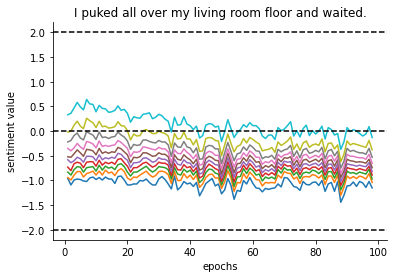

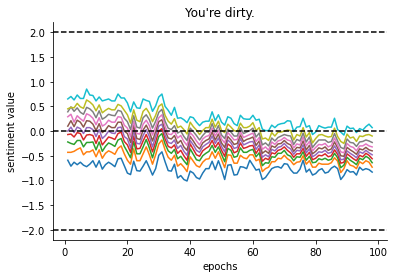

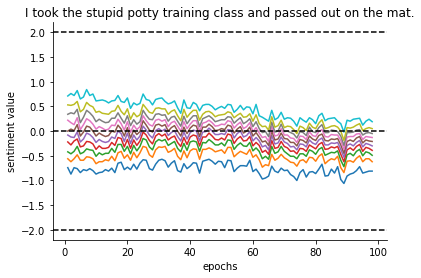

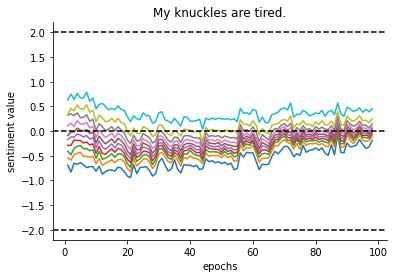

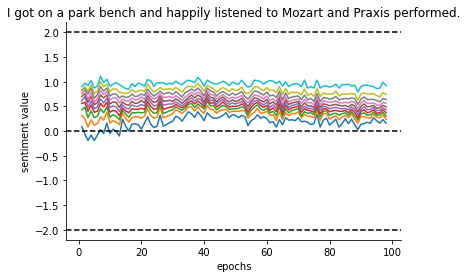

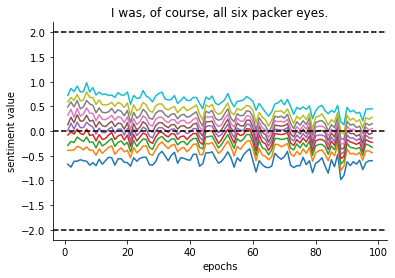

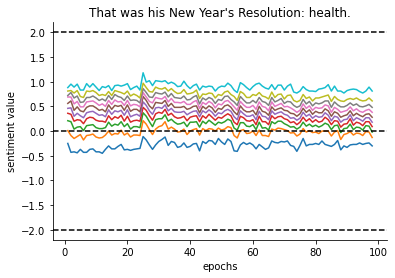

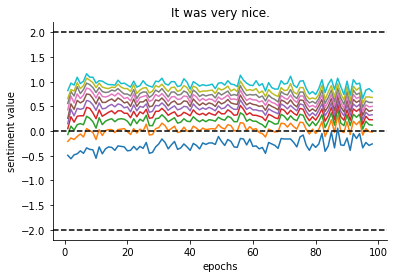

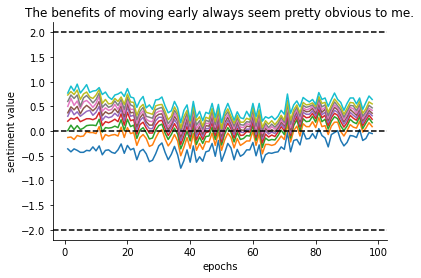

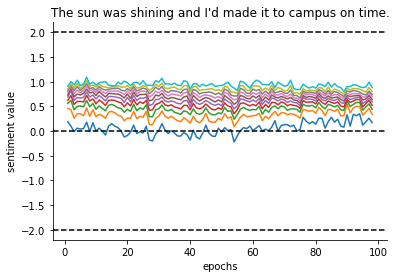

In [20]:
for sent in tracked_sentences:
    plt.figure()
    plt.plot(out['epoch'], np.array(out['log'][sent]))
    sns.despine()
    plt.axhline(y=-2, color='k', linestyle='--')
    plt.axhline(y=0, color='k', linestyle='--')
    plt.axhline(y=2, color='k', linestyle='--')
    plt.ylabel('sentiment value')
    plt.xlabel('epochs')
    plt.title(sent)

##### Stems (part 1)

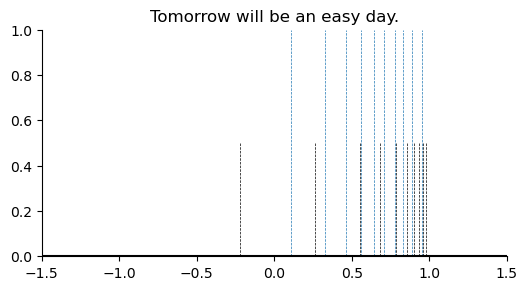

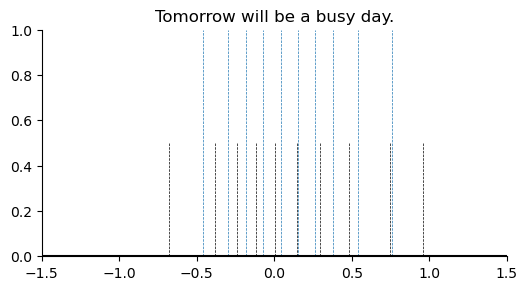

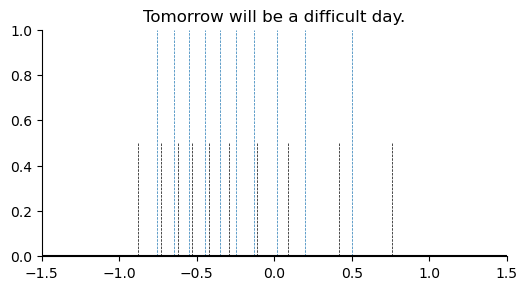

In [21]:
plot_examples(v5_stems_1, sentences, composite_rewards, tokenizer, model, 
              out['Z_network'], out['taus'])

##### Stems (part 2)

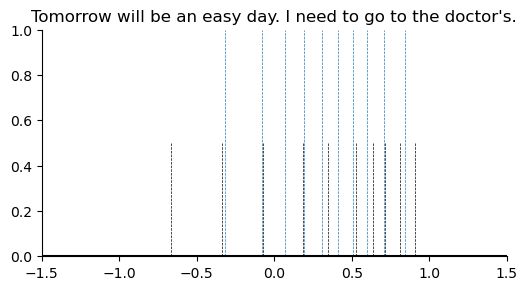

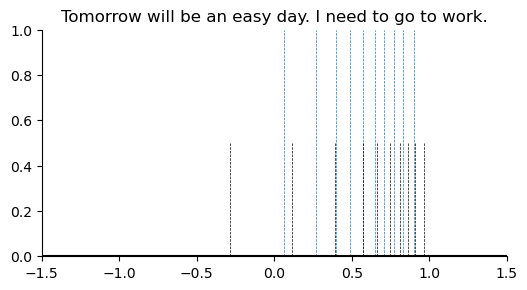

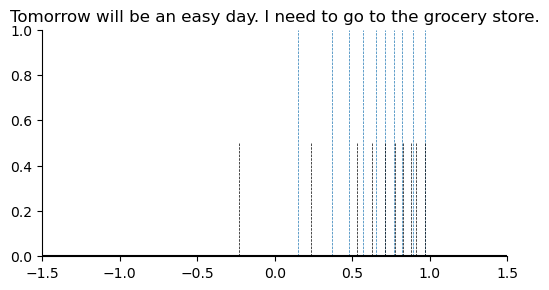

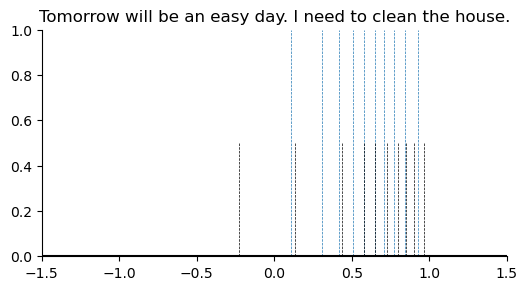

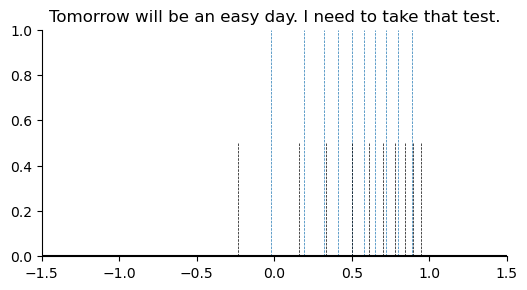

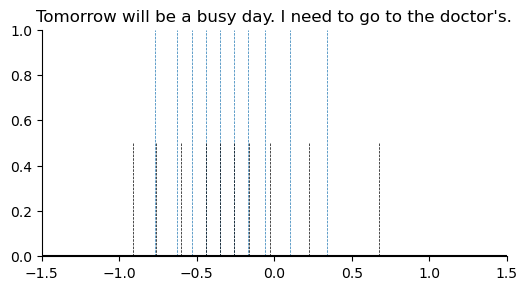

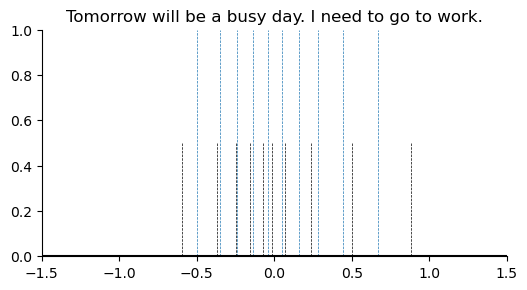

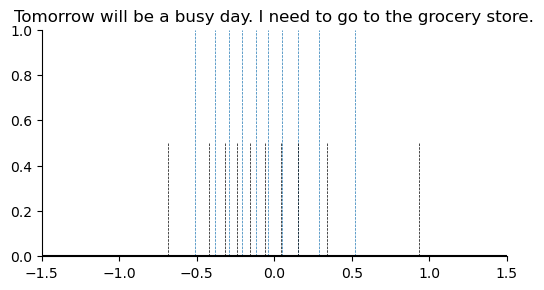

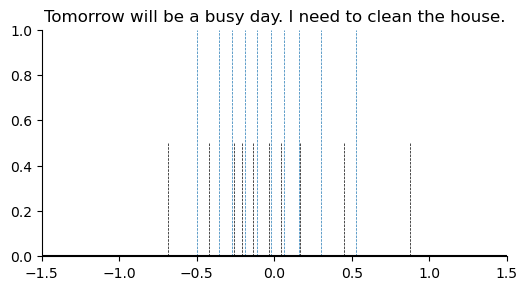

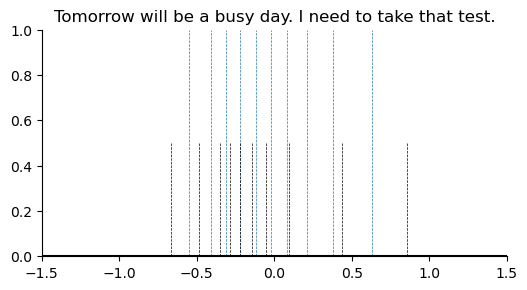

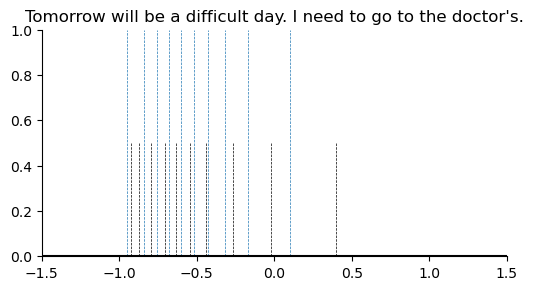

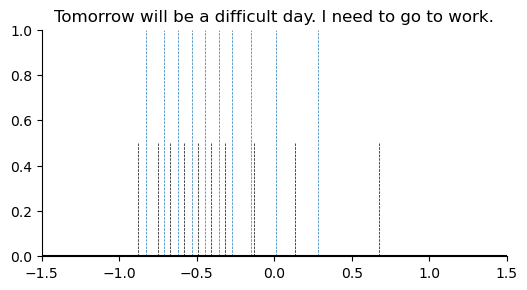

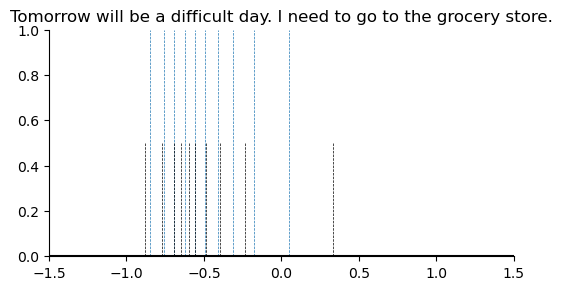

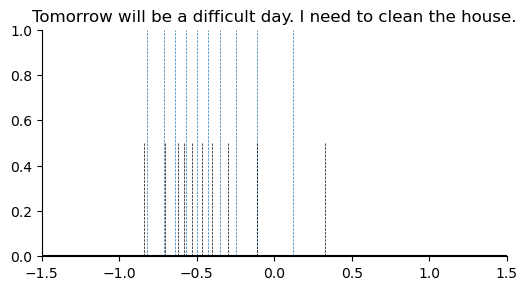

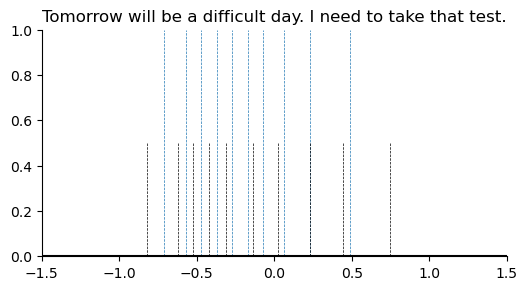

In [22]:
plot_examples(v5_stems, sentences, composite_rewards, tokenizer, model, 
              out['Z_network'], out['taus'])

##### Random Examples

In [23]:
np.random.seed(1)
rand_examples = [s.split('p=')[0].strip() for s in np.random.choice(sentences, 10)]
rand_examples

['Tomorrow will be a difficult day. I need to go to the grocery store. I need to get my son some groceries. I need to get a car. I need to do this.',
 "Tomorrow will be an easy day. I need to go to work. I need to be there. I can't do it without you. I need to get up.",
 "Tomorrow will be a difficult day. I need to clean the house. I need to make sure everyone's OK. I need to help the people who are here. I need to make sure that we are all OK.",
 'Tomorrow will be an easy day. I need to clean the house. I need to get ready for work. I need to go for a walk. I need to take a shower.',
 "Tomorrow will be a difficult day. I need to go to the doctor's. I need to go to the hospital. I need to talk to them. I need to come home.",
 "Tomorrow will be a difficult day. I need to go to the grocery store. I need to get my medication. I need to be ready to go to school tomorrow morning. I need to be sure that I don't need to be in the hospital.",
 'Tomorrow will be an easy day. I will go on a bike

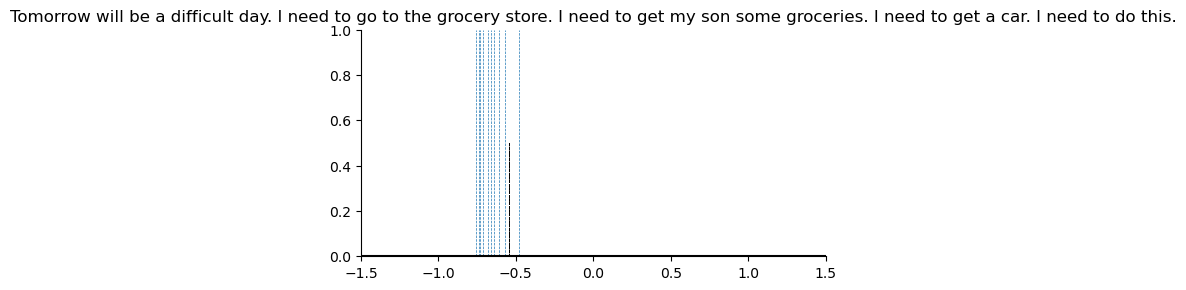

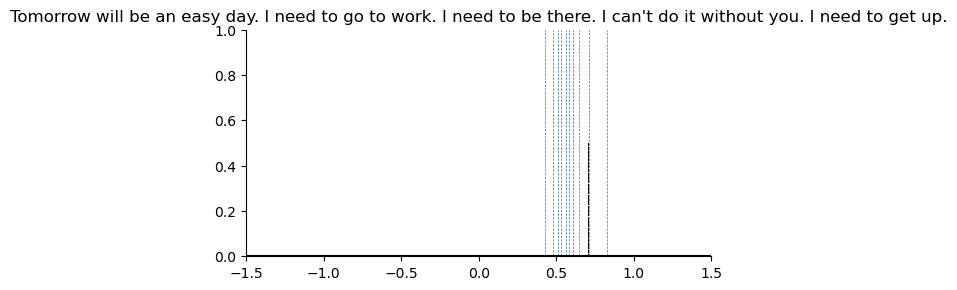

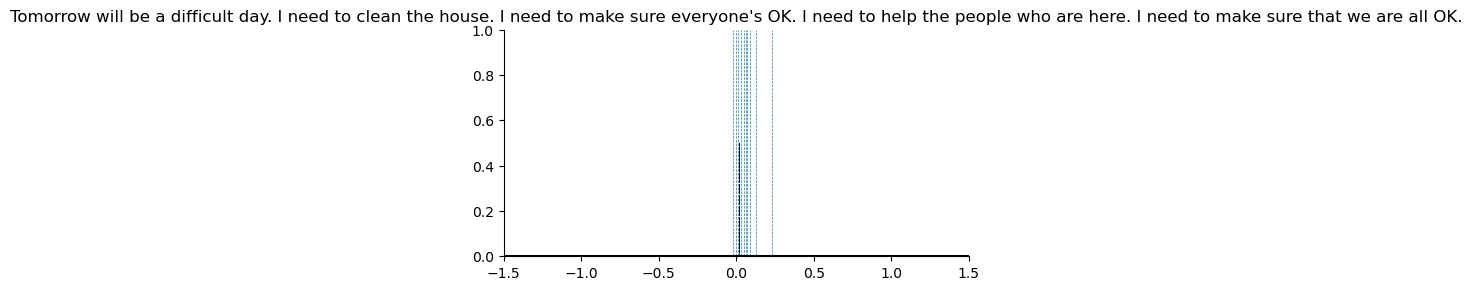

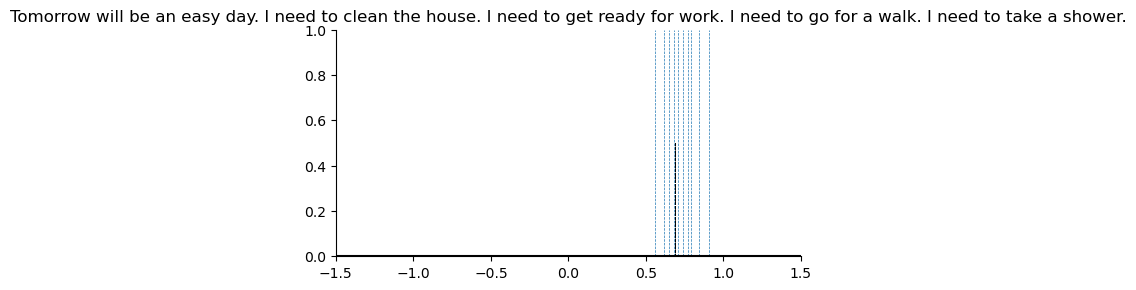

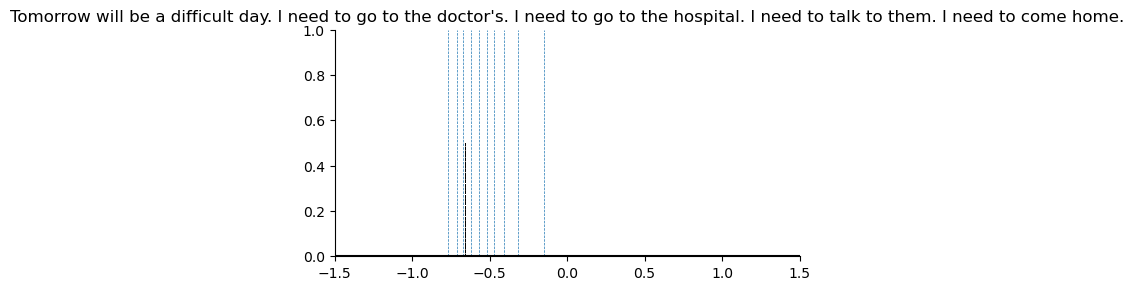

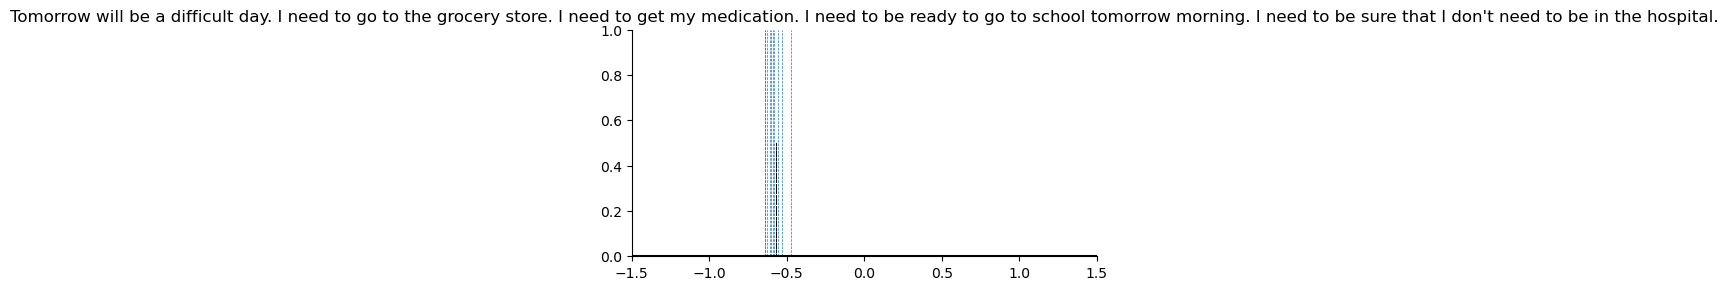

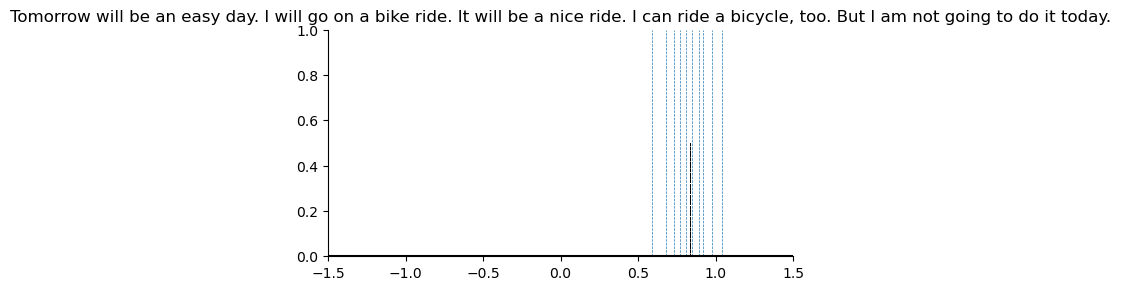

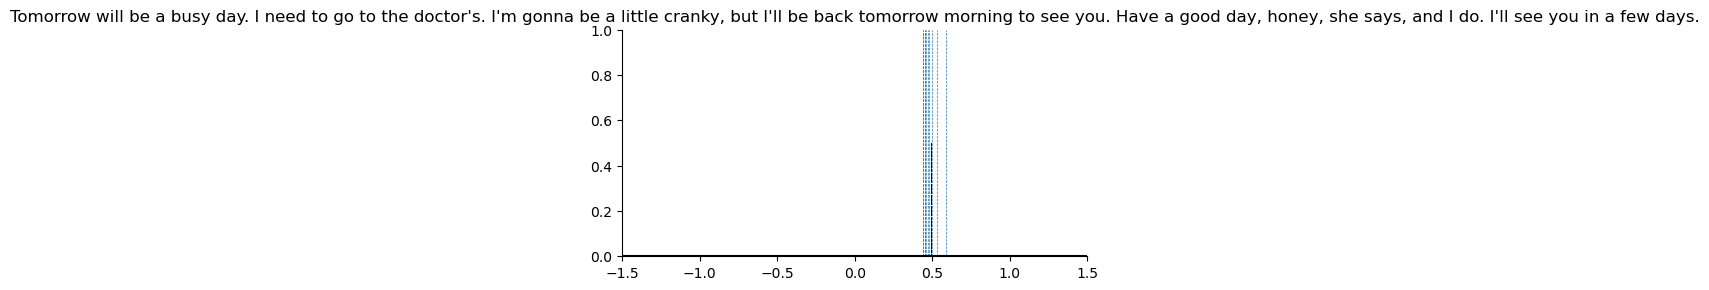

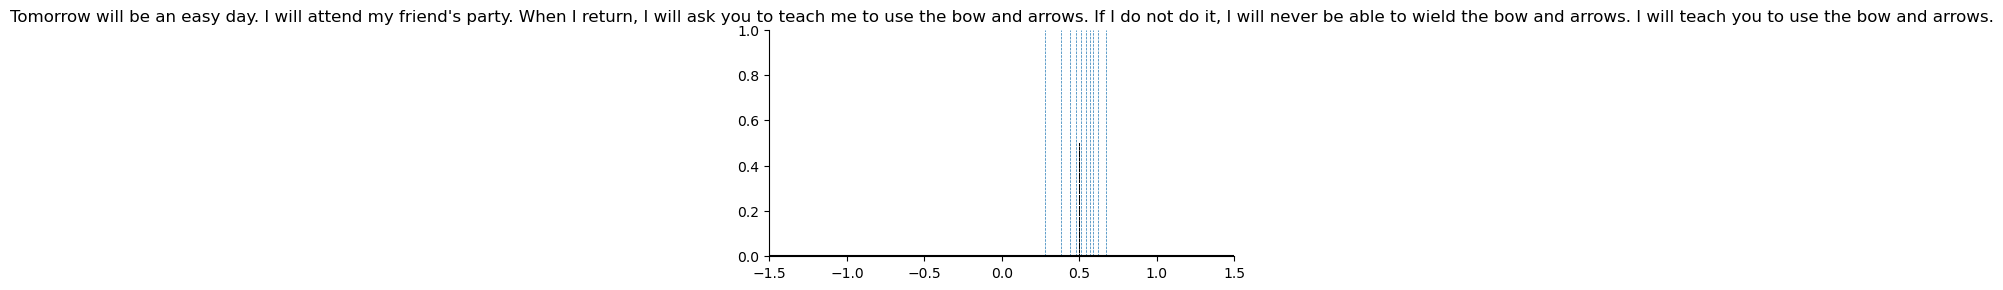

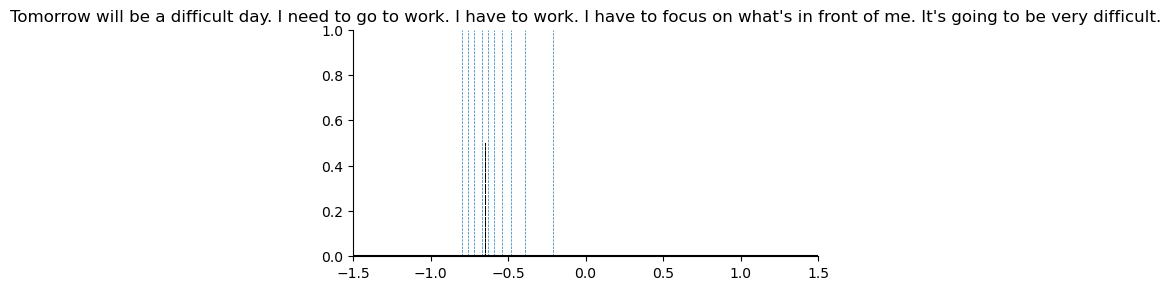

In [24]:
plot_examples(rand_examples, sentences, composite_rewards, tokenizer, model, 
              out['Z_network'], out['taus'])

##### Manual Examples

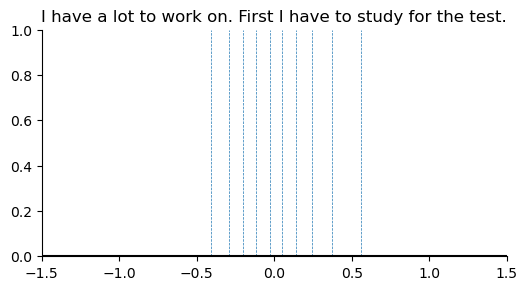

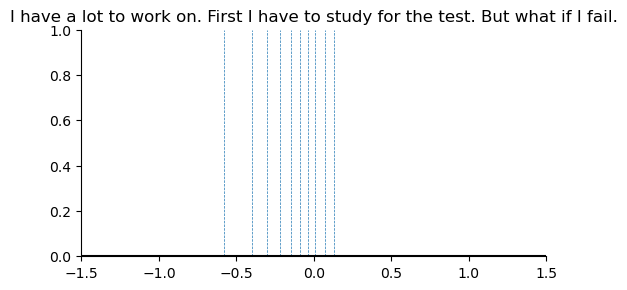

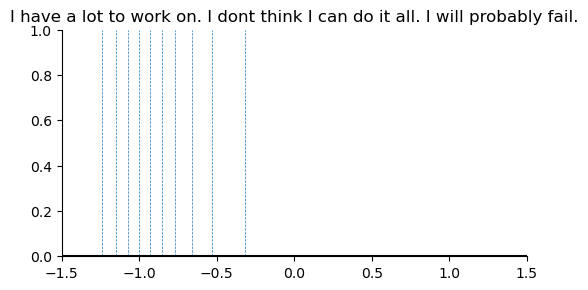

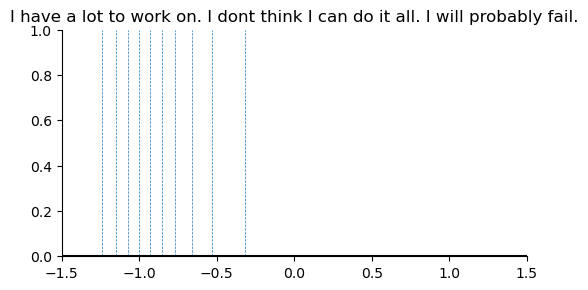

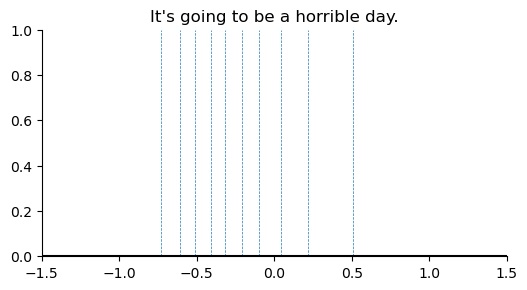

In [25]:
examples = ['I have a lot to work on. First I have to study for the test.',
            'I have a lot to work on. First I have to study for the test. But what if I fail.',
            'I have a lot to work on. I dont think I can do it all. I will probably fail.',
            'I have a lot to work on. I dont think I can do it all. I will probably fail.',
            "It's going to be a horrible day.",
           ]

plot_examples(examples, sentences, composite_rewards, tokenizer, model, 
              out['Z_network'], out['taus'])

##### Extra

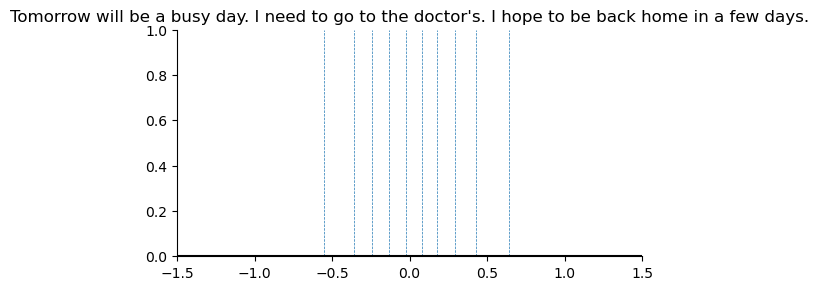

In [27]:
examples = ["Tomorrow will be a busy day. I need to go to the doctor's. I hope to be back home in a few days."
           ]

plot_examples(examples, sentences, composite_rewards, tokenizer, model, 
              out['Z_network'], out['taus'])

#### 10 Hidden Units (20 Epochs)

In [71]:
out = load_rl_model(epoch=19, hidden_dim =10, n_quantiles = 10, extra = '_composite_rewards_slow_lr',
                          folder = 'sentence_chains_I_5',huber=0.1)

In [72]:
v5_stems_1 =["Tomorrow will be an easy day.",
           "Tomorrow will be a busy day.",
           "Tomorrow will be a difficult day."]
v5_stems_2 = ["I need to go to the doctor's.", 'I need to go to work.', 
         'I need to go to the grocery store.', 'I need to clean the house.',  'I need to take that test.']

v5_stems = []
for v5_1 in v5_stems_1:
    for v5_2 in v5_stems_2:
        v5_stems.append(v5_1+' '+v5_2)

In [73]:
v5_stems[0:2]

["Tomorrow will be an easy day. I need to go to the doctor's.",
 'Tomorrow will be an easy day. I need to go to work.']

##### Tracked Sentences

In [74]:
tracked_sentences = [key for key in out['log'].keys() if key not in ['loss','epoch']]

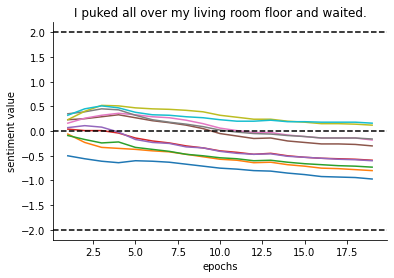

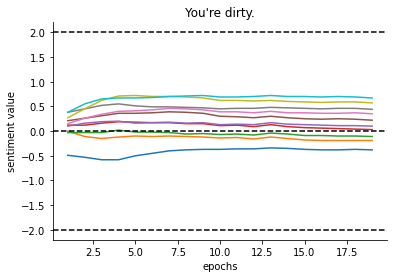

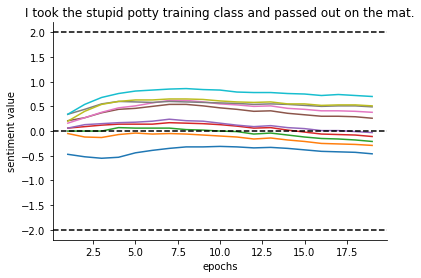

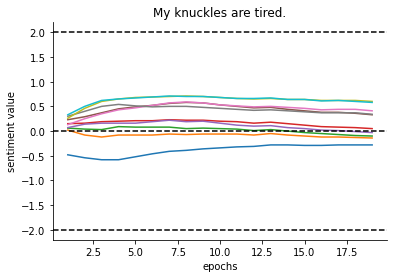

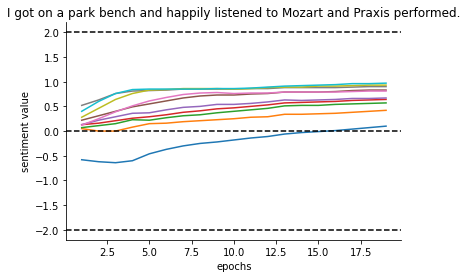

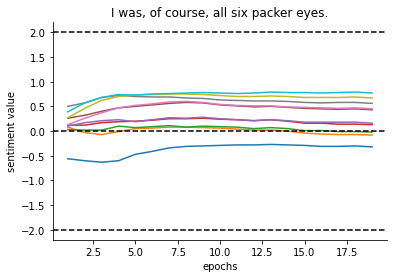

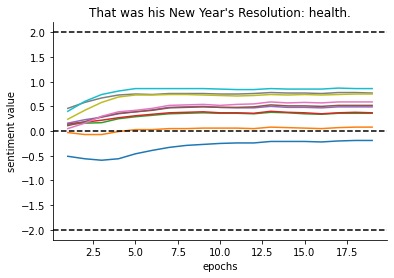

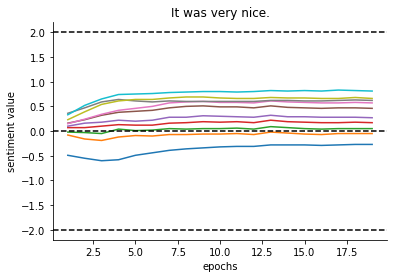

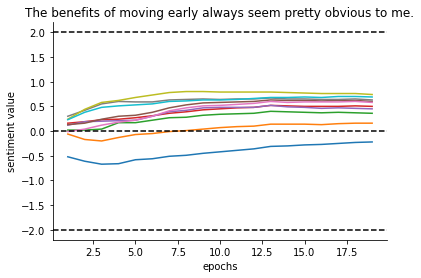

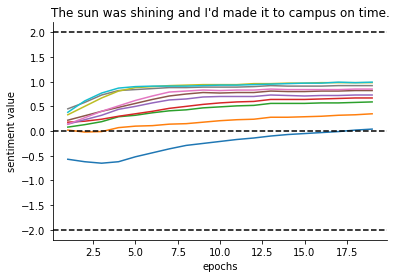

In [75]:
for sent in tracked_sentences:
    plt.figure()
    plt.plot(out['epoch'], np.array(out['log'][sent]))
    sns.despine()
    plt.axhline(y=-2, color='k', linestyle='--')
    plt.axhline(y=0, color='k', linestyle='--')
    plt.axhline(y=2, color='k', linestyle='--')
    plt.ylabel('sentiment value')
    plt.xlabel('epochs')
    plt.title(sent)

##### Stems (part 1)

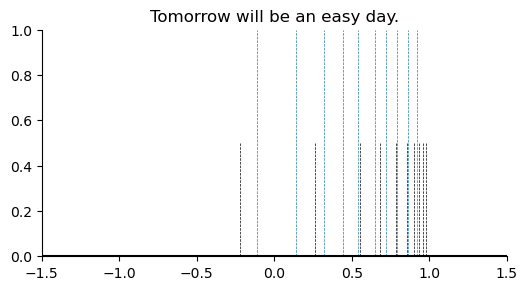

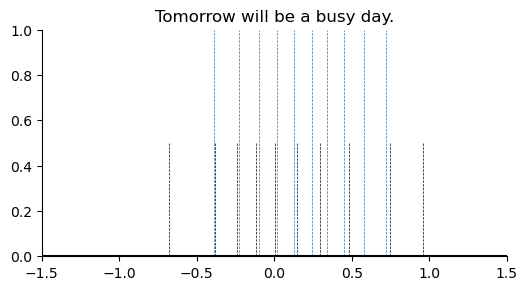

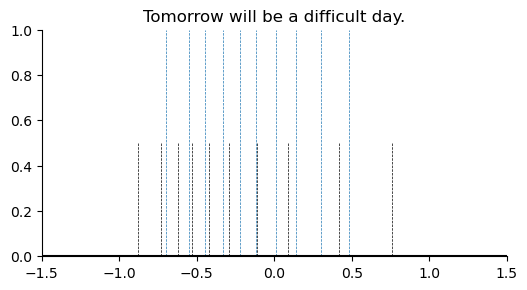

In [76]:
plot_examples(v5_stems_1, sentences, composite_rewards, tokenizer, model, 
              out['Z_network'], out['taus'])

##### Stems (part 2)

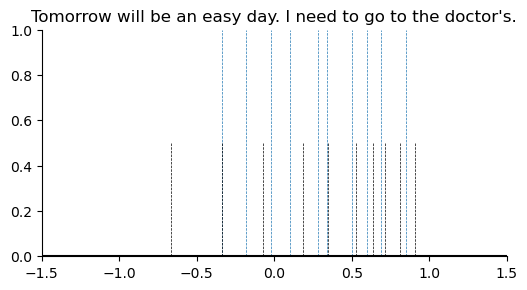

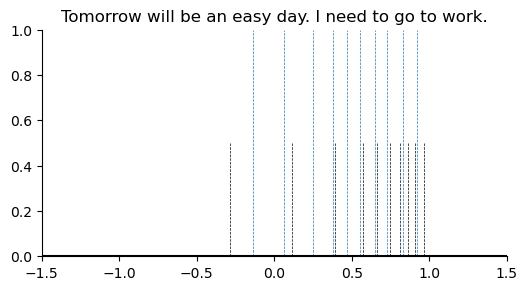

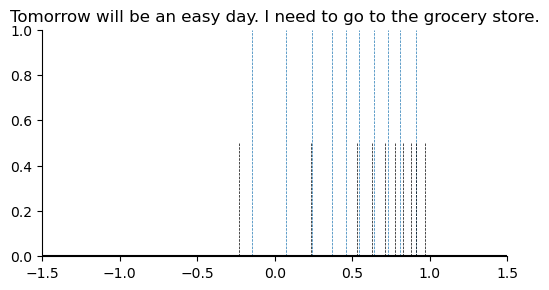

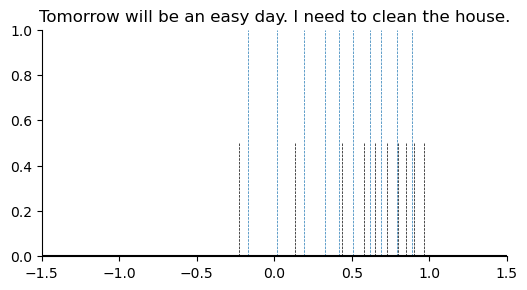

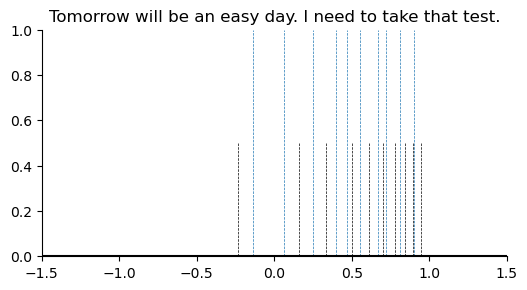

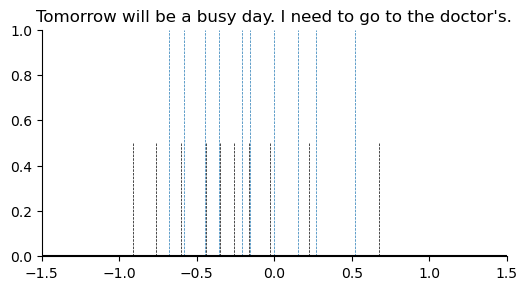

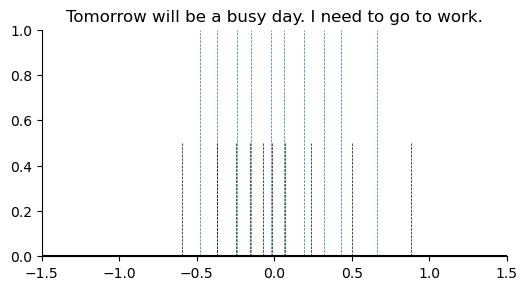

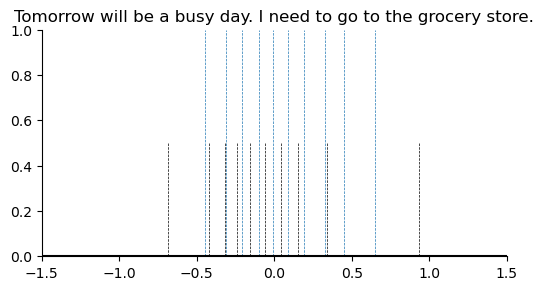

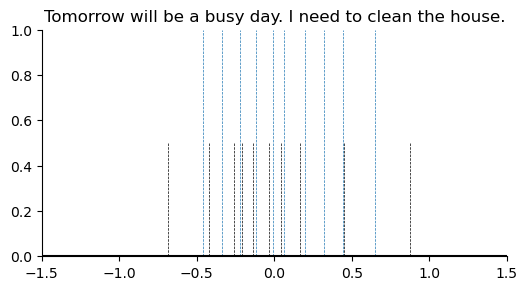

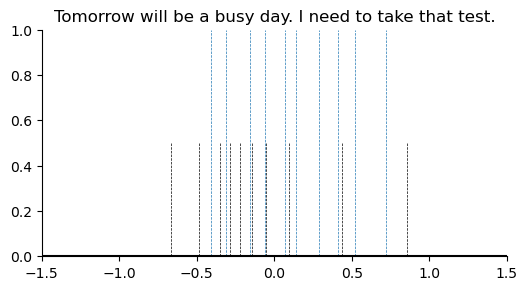

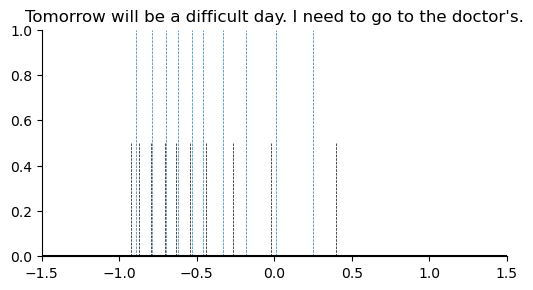

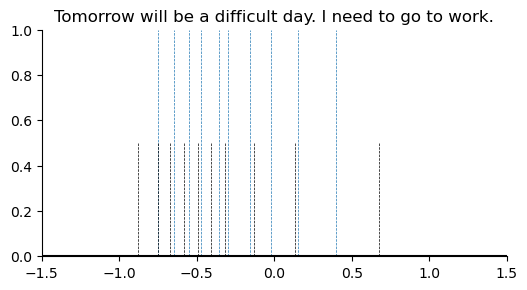

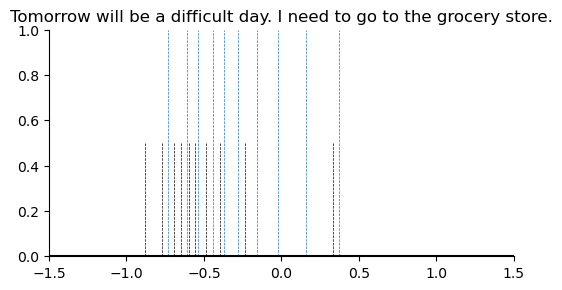

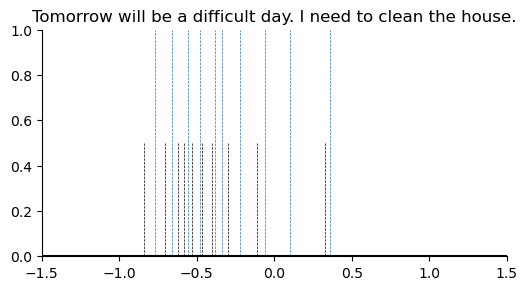

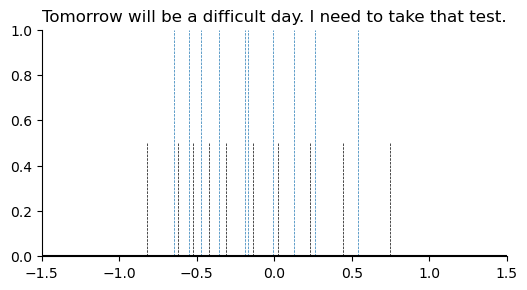

In [77]:
plot_examples(v5_stems, sentences, composite_rewards, tokenizer, model, 
              out['Z_network'], out['taus'])

##### Random Examples

In [78]:
np.random.seed(1)
rand_examples = [s.split('p=')[0].strip() for s in np.random.choice(sentences, 10)]
rand_examples

['Tomorrow will be a difficult day. I need to go to the grocery store. I need to get my son some groceries. I need to get a car. I need to do this.',
 "Tomorrow will be an easy day. I need to go to work. I need to be there. I can't do it without you. I need to get up.",
 "Tomorrow will be a difficult day. I need to clean the house. I need to make sure everyone's OK. I need to help the people who are here. I need to make sure that we are all OK.",
 'Tomorrow will be an easy day. I need to clean the house. I need to get ready for work. I need to go for a walk. I need to take a shower.',
 "Tomorrow will be a difficult day. I need to go to the doctor's. I need to go to the hospital. I need to talk to them. I need to come home.",
 "Tomorrow will be a difficult day. I need to go to the grocery store. I need to get my medication. I need to be ready to go to school tomorrow morning. I need to be sure that I don't need to be in the hospital.",
 'Tomorrow will be an easy day. I will go on a bike

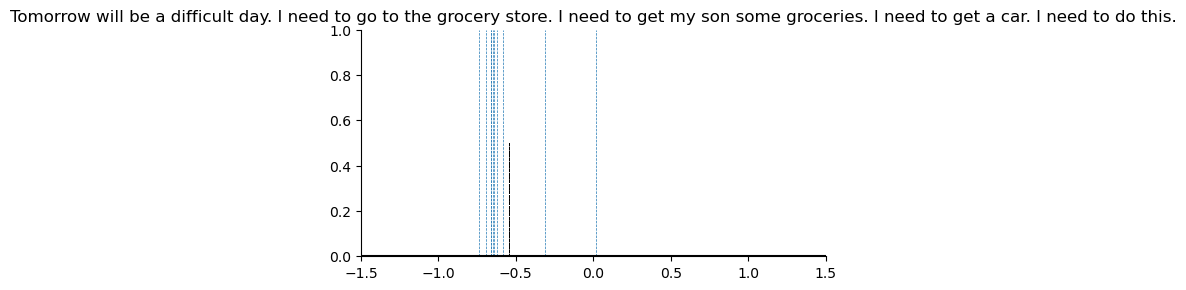

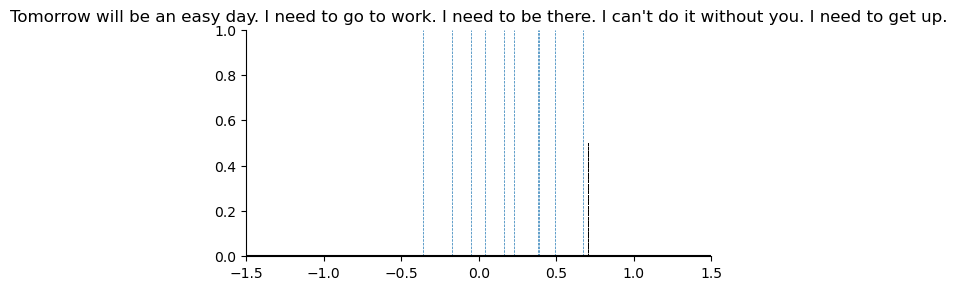

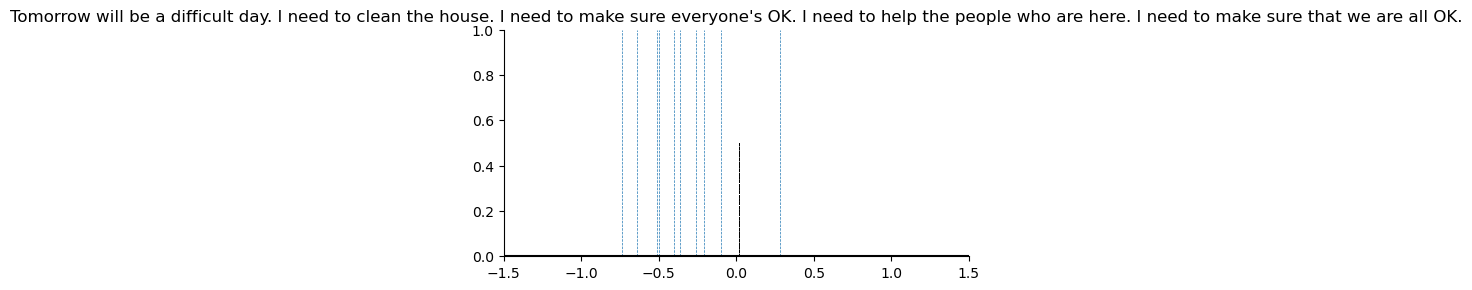

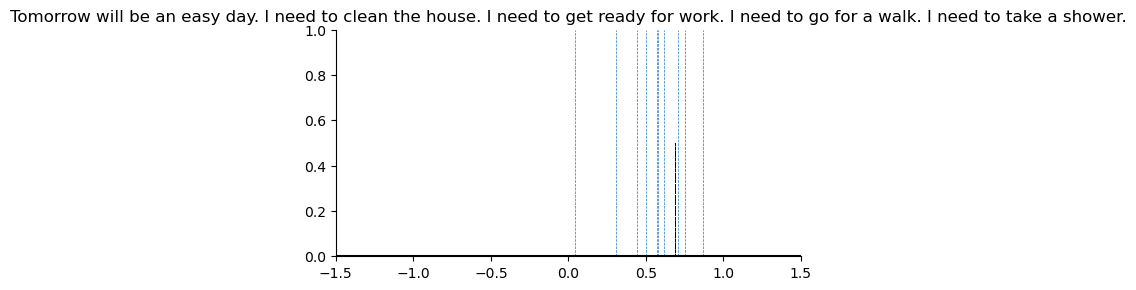

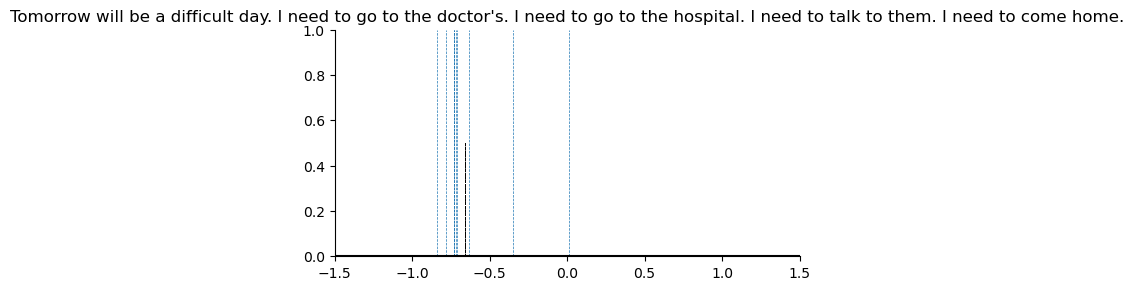

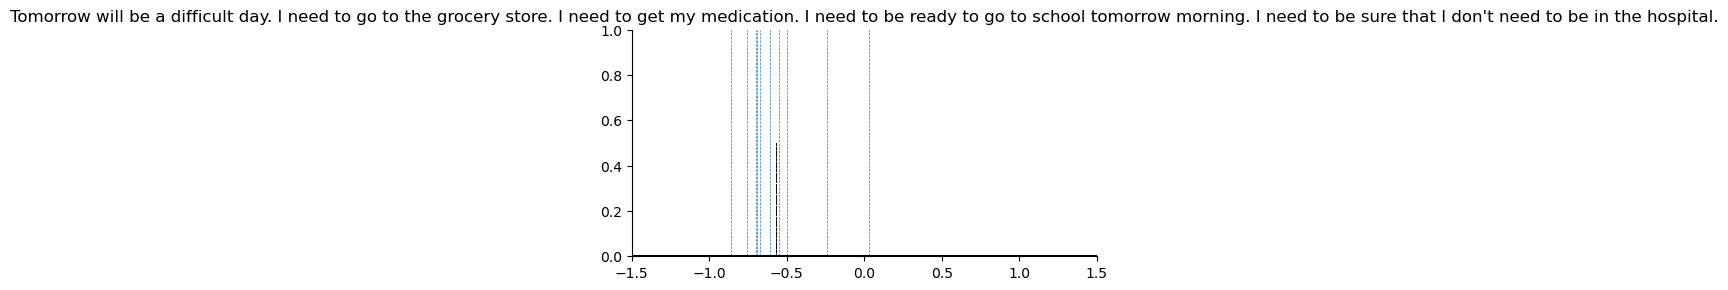

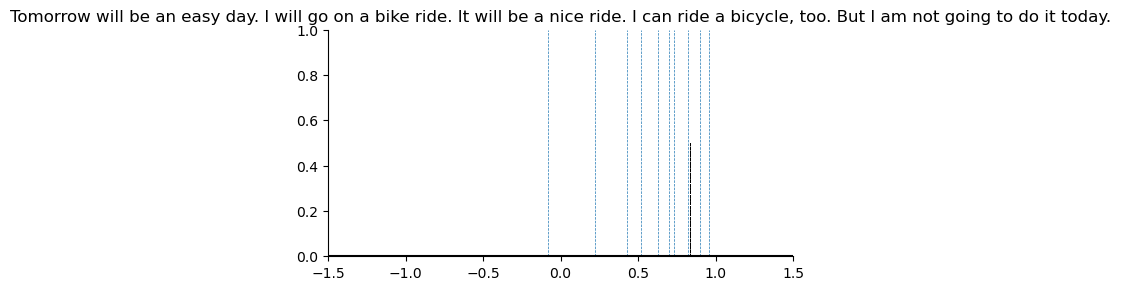

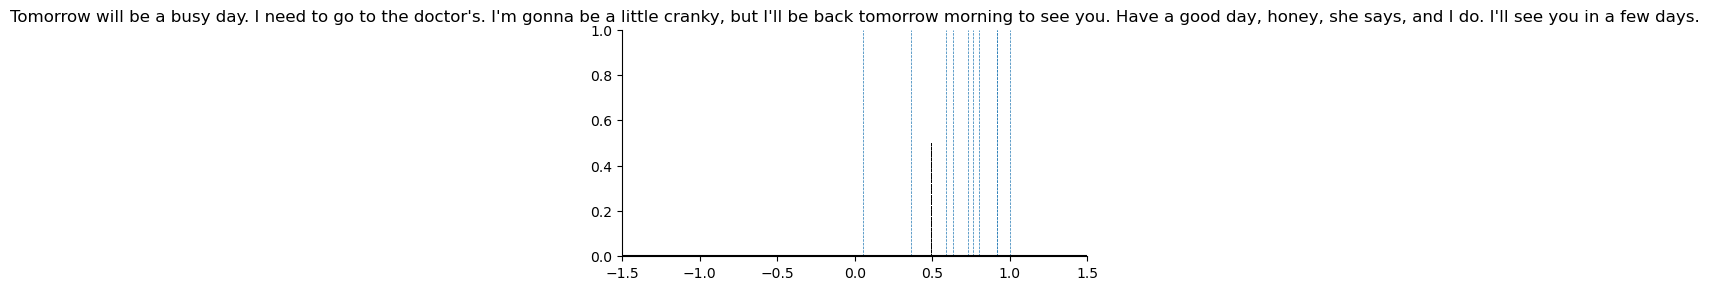

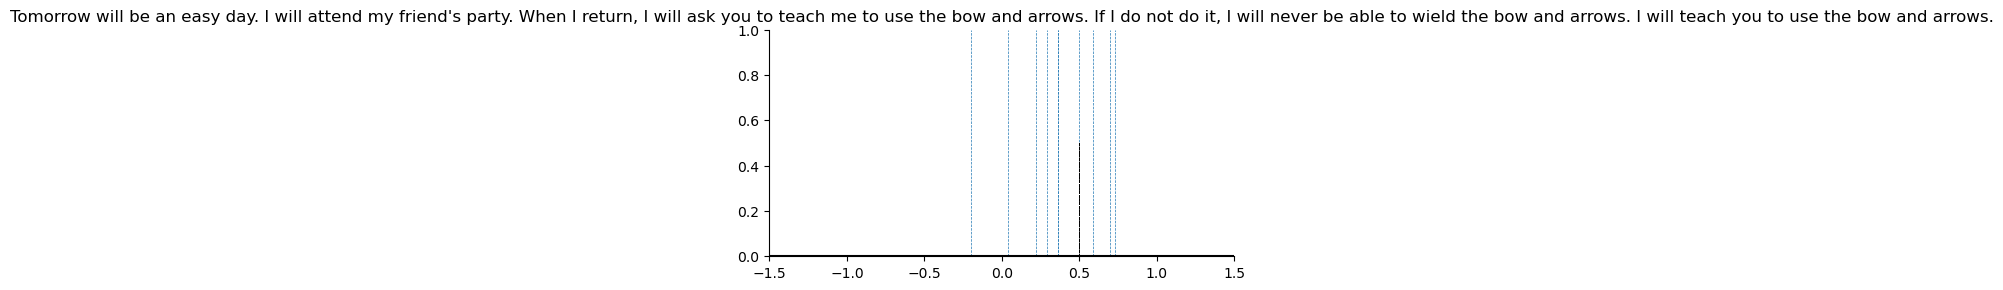

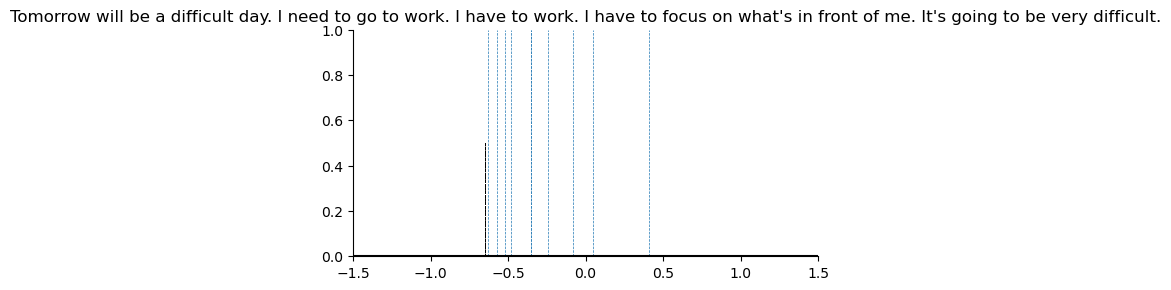

In [79]:
plot_examples(rand_examples, sentences, composite_rewards, tokenizer, model, 
              out['Z_network'], out['taus'])

##### Manual Examples

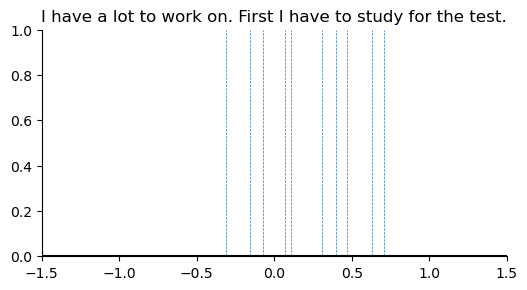

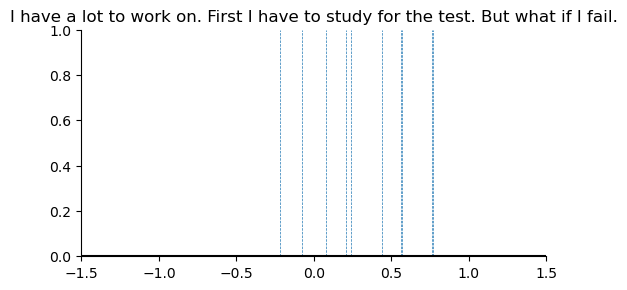

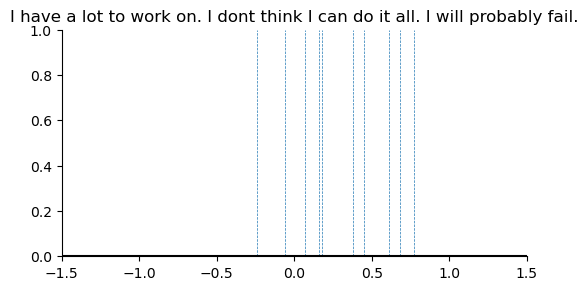

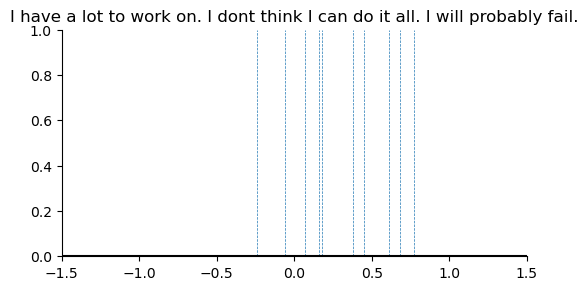

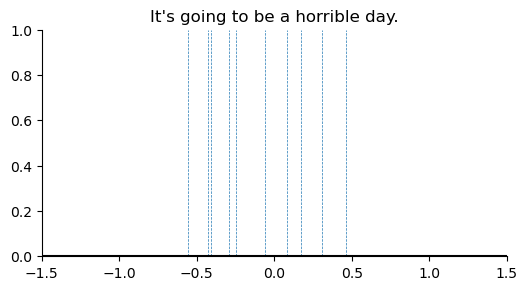

In [80]:
examples = ['I have a lot to work on. First I have to study for the test.',
            'I have a lot to work on. First I have to study for the test. But what if I fail.',
            'I have a lot to work on. I dont think I can do it all. I will probably fail.',
            'I have a lot to work on. I dont think I can do it all. I will probably fail.',
            "It's going to be a horrible day.",
           ]

plot_examples(examples, sentences, composite_rewards, tokenizer, model, 
              out['Z_network'], out['taus'])

#### 10 Hidden Units (48 Epochs) (faster lr)

In [91]:
out = load_rl_model(epoch=48, hidden_dim =10, n_quantiles = 10, extra = '_composite_rewards',
                          folder = 'sentence_chains_I_5',huber=0.1)

In [92]:
v5_stems_1 =["Tomorrow will be an easy day.",
           "Tomorrow will be a busy day.",
           "Tomorrow will be a difficult day."]
v5_stems_2 = ["I need to go to the doctor's.", 'I need to go to work.', 
         'I need to go to the grocery store.', 'I need to clean the house.',  'I need to take that test.']

v5_stems = []
for v5_1 in v5_stems_1:
    for v5_2 in v5_stems_2:
        v5_stems.append(v5_1+' '+v5_2)

In [93]:
v5_stems[0:2]

["Tomorrow will be an easy day. I need to go to the doctor's.",
 'Tomorrow will be an easy day. I need to go to work.']

##### Tracked Sentences

In [94]:
tracked_sentences = [key for key in out['log'].keys() if key not in ['loss','epoch']]

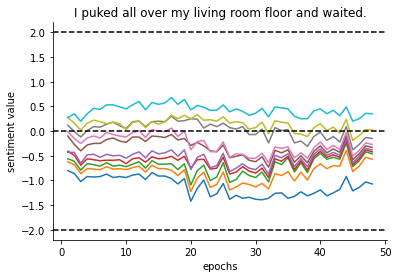

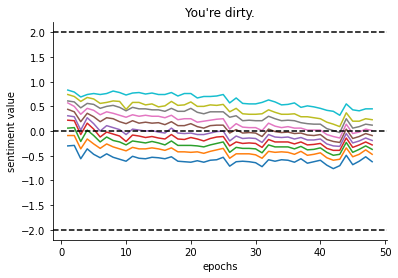

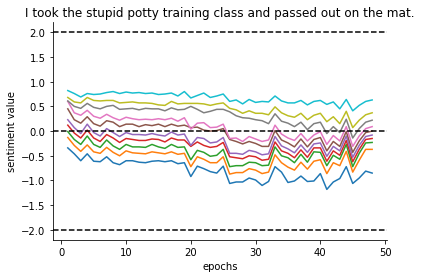

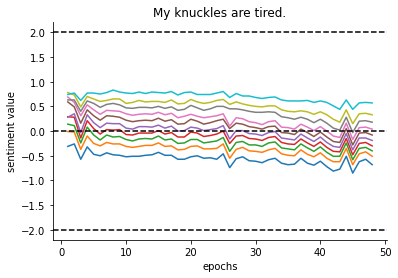

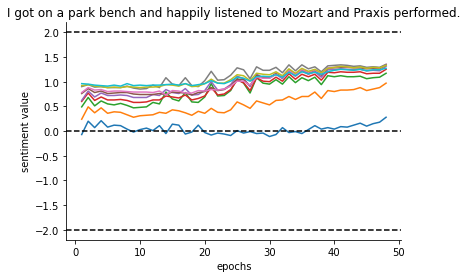

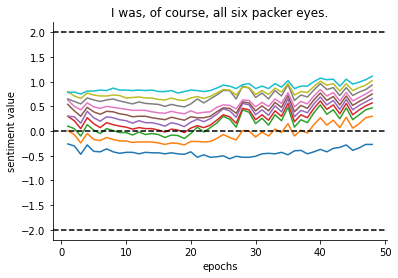

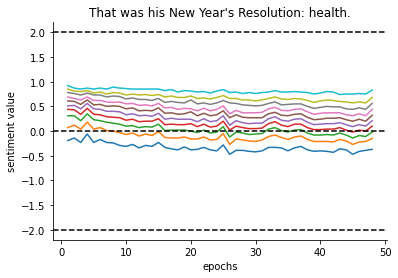

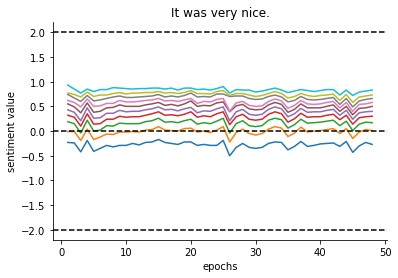

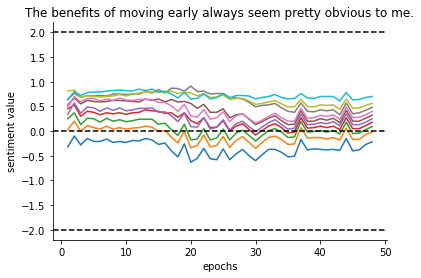

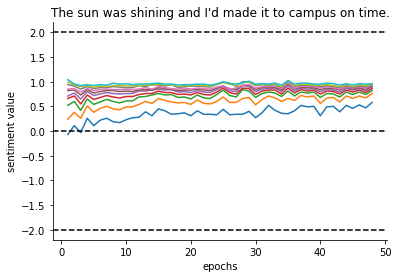

In [95]:
for sent in tracked_sentences:
    plt.figure()
    plt.plot(out['epoch'], np.array(out['log'][sent]))
    sns.despine()
    plt.axhline(y=-2, color='k', linestyle='--')
    plt.axhline(y=0, color='k', linestyle='--')
    plt.axhline(y=2, color='k', linestyle='--')
    plt.ylabel('sentiment value')
    plt.xlabel('epochs')
    plt.title(sent)

##### Stems (part 1)

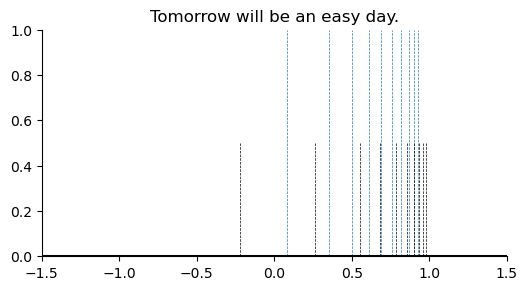

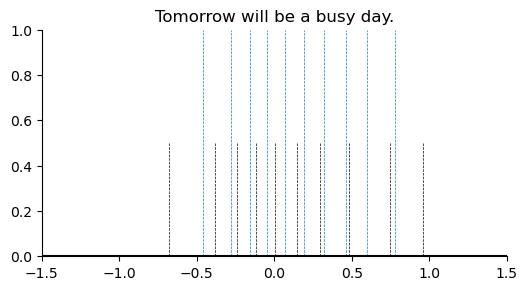

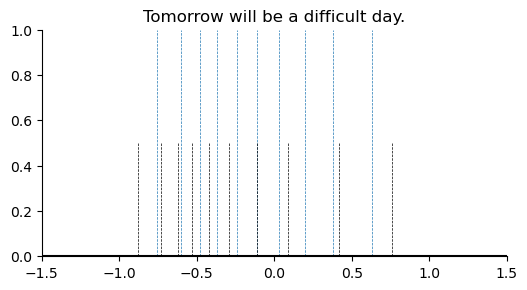

In [96]:
plot_examples(v5_stems_1, sentences, composite_rewards, tokenizer, model, 
              out['Z_network'], out['taus'])

##### Stems (part 2)

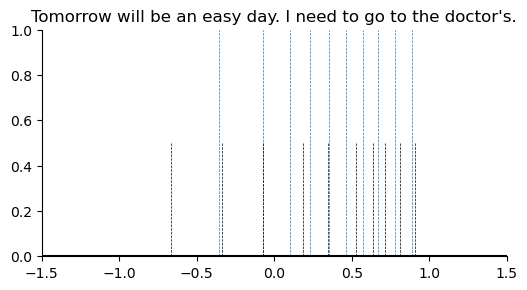

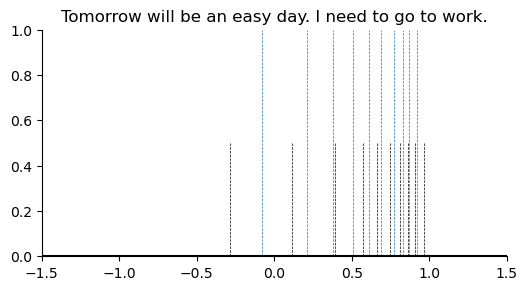

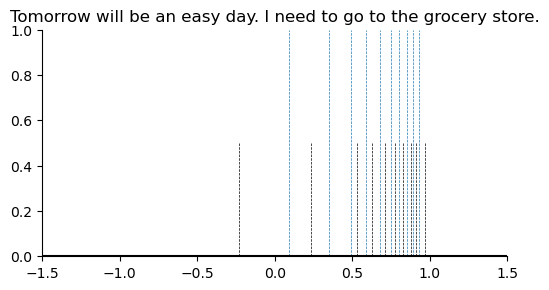

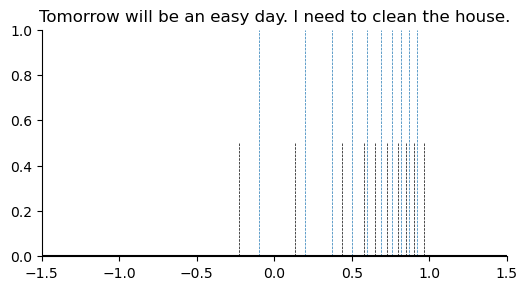

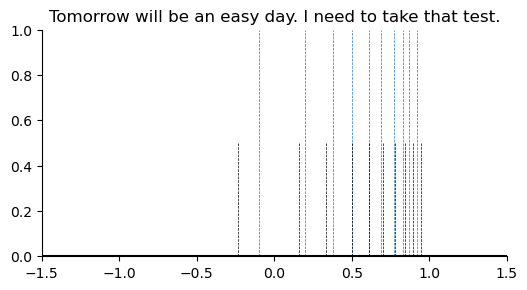

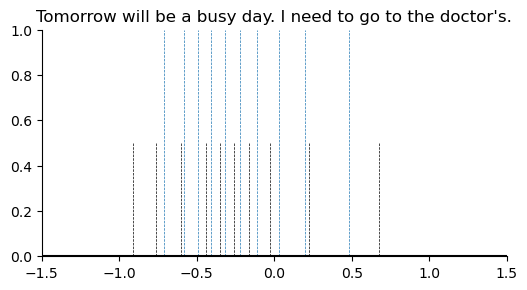

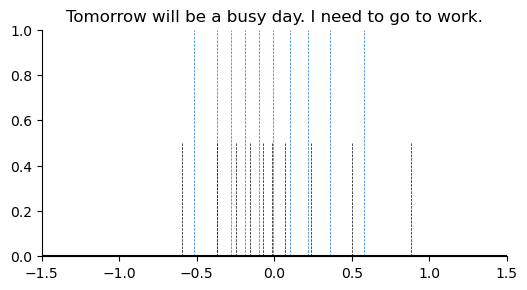

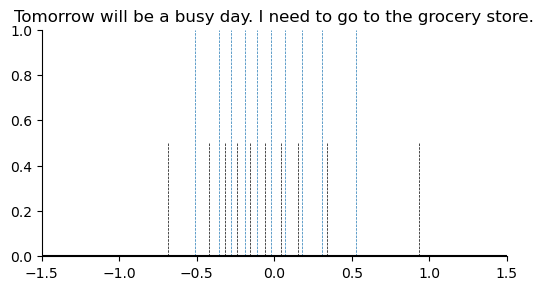

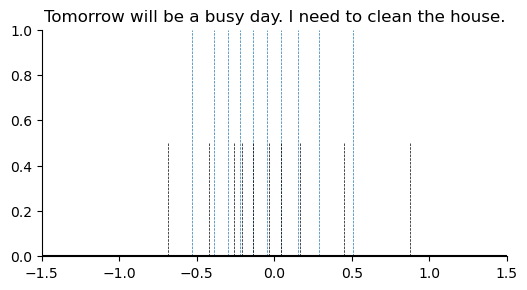

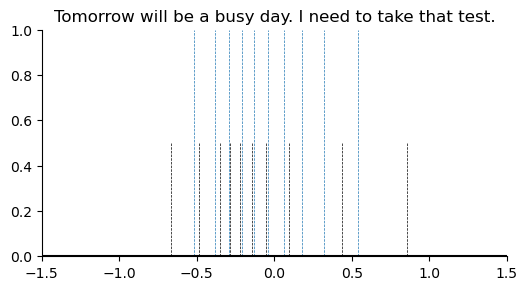

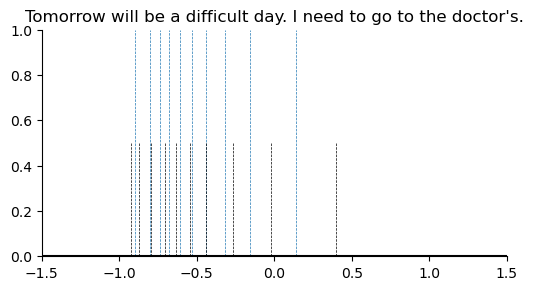

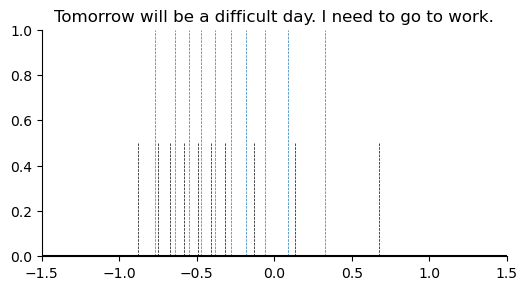

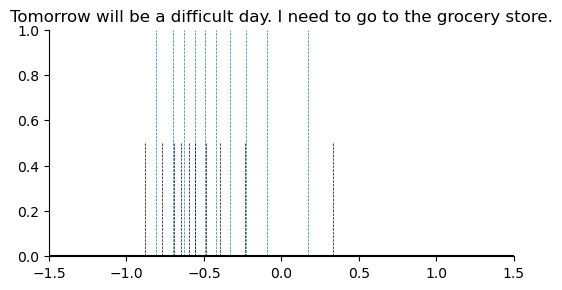

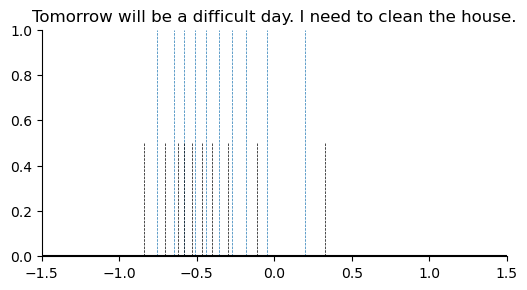

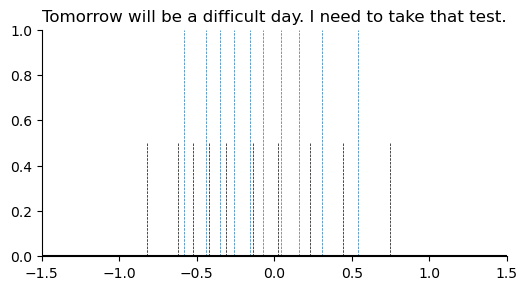

In [97]:
plot_examples(v5_stems, sentences, composite_rewards, tokenizer, model, 
              out['Z_network'], out['taus'])

##### Random Examples

In [98]:
np.random.seed(1)
rand_examples = [s.split('p=')[0].strip() for s in np.random.choice(sentences, 10)]
rand_examples

['Tomorrow will be a difficult day. I need to go to the grocery store. I need to get my son some groceries. I need to get a car. I need to do this.',
 "Tomorrow will be an easy day. I need to go to work. I need to be there. I can't do it without you. I need to get up.",
 "Tomorrow will be a difficult day. I need to clean the house. I need to make sure everyone's OK. I need to help the people who are here. I need to make sure that we are all OK.",
 'Tomorrow will be an easy day. I need to clean the house. I need to get ready for work. I need to go for a walk. I need to take a shower.',
 "Tomorrow will be a difficult day. I need to go to the doctor's. I need to go to the hospital. I need to talk to them. I need to come home.",
 "Tomorrow will be a difficult day. I need to go to the grocery store. I need to get my medication. I need to be ready to go to school tomorrow morning. I need to be sure that I don't need to be in the hospital.",
 'Tomorrow will be an easy day. I will go on a bike

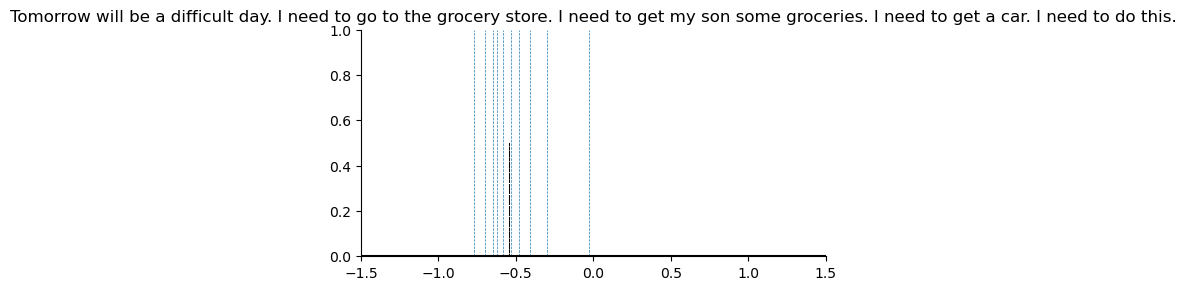

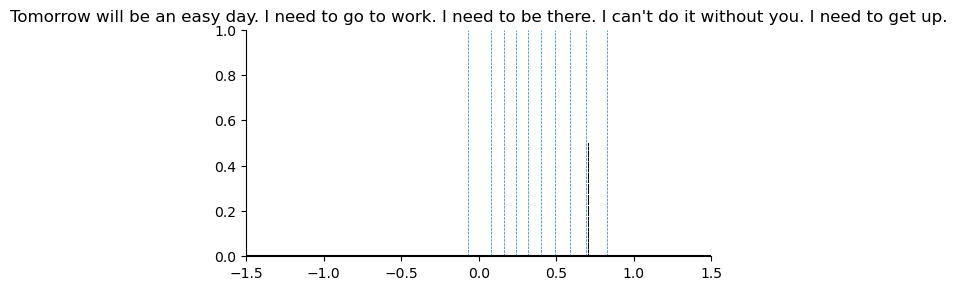

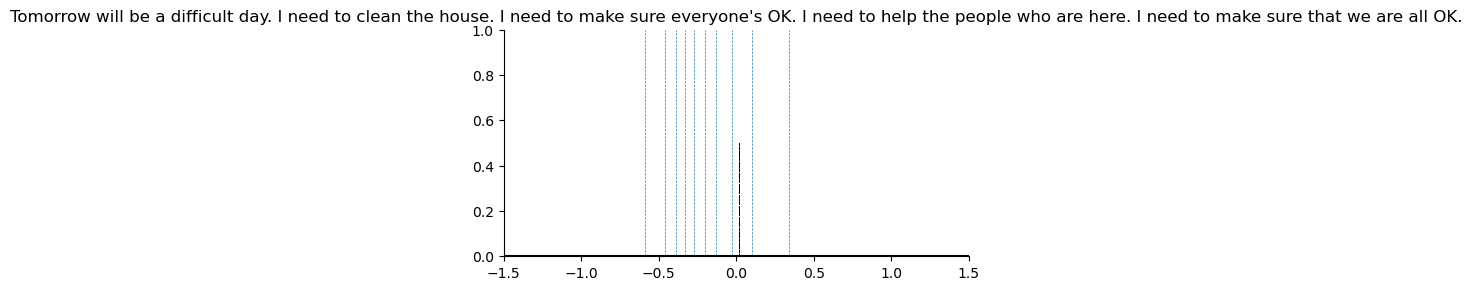

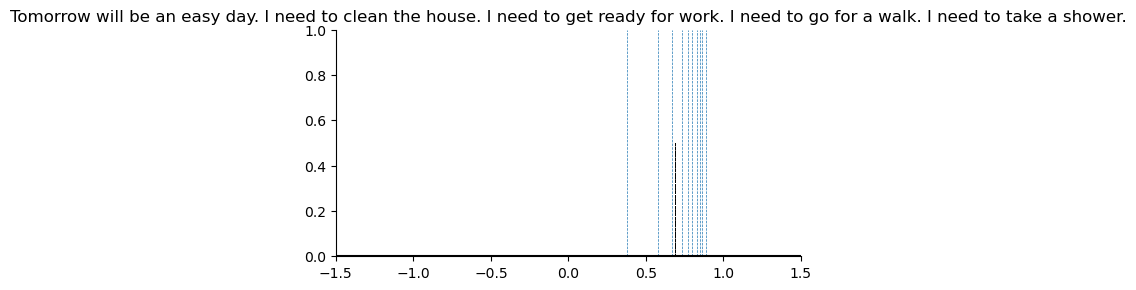

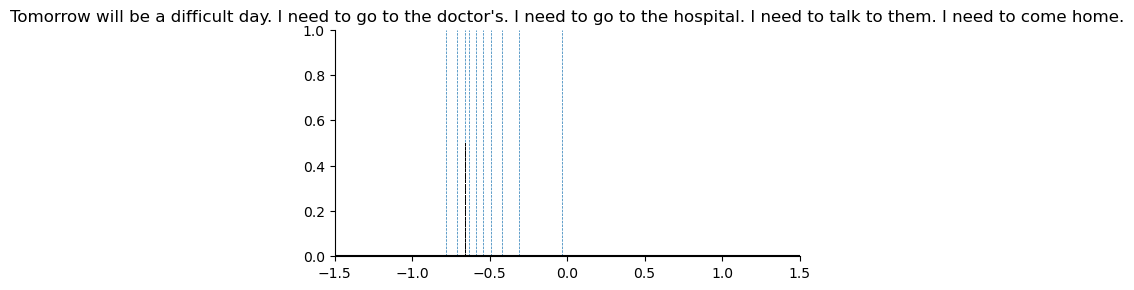

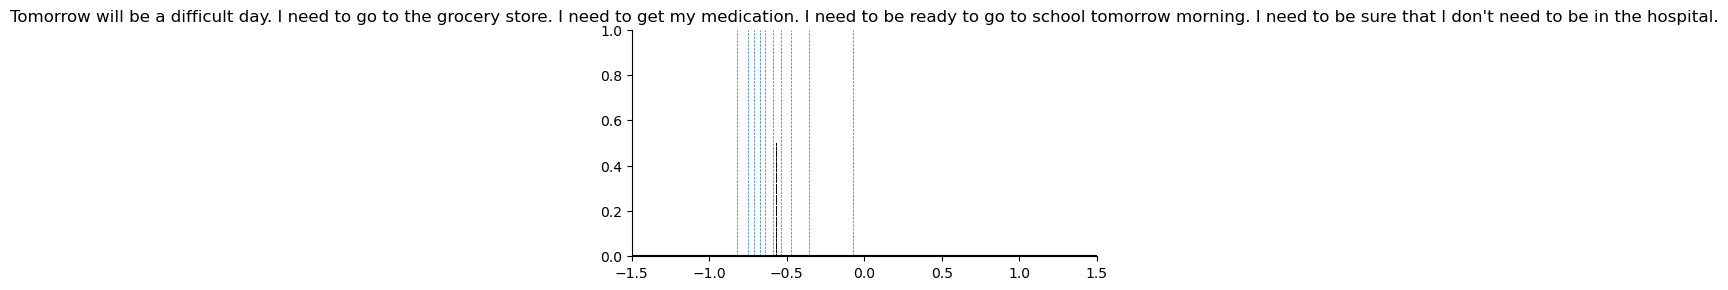

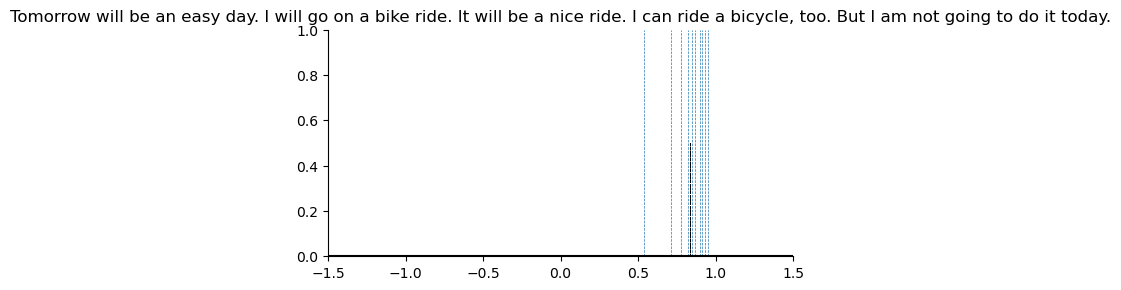

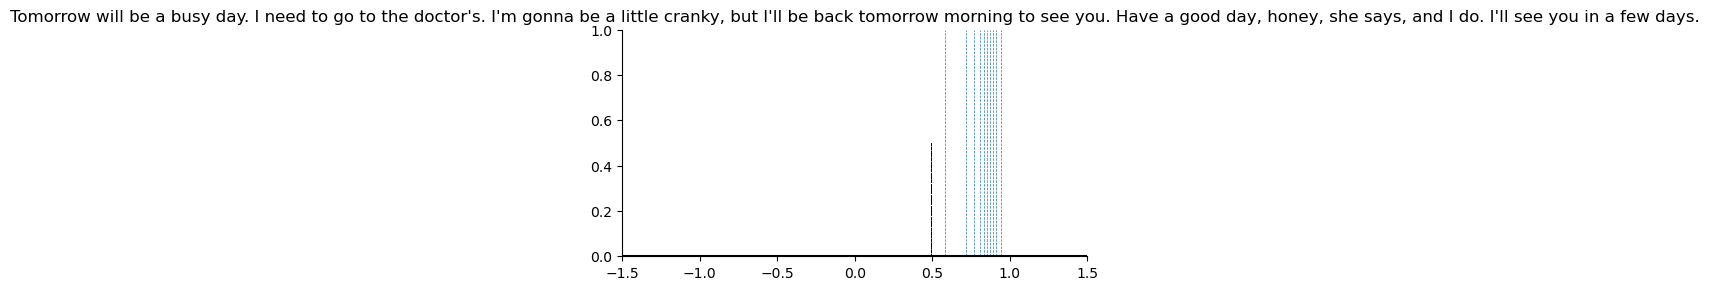

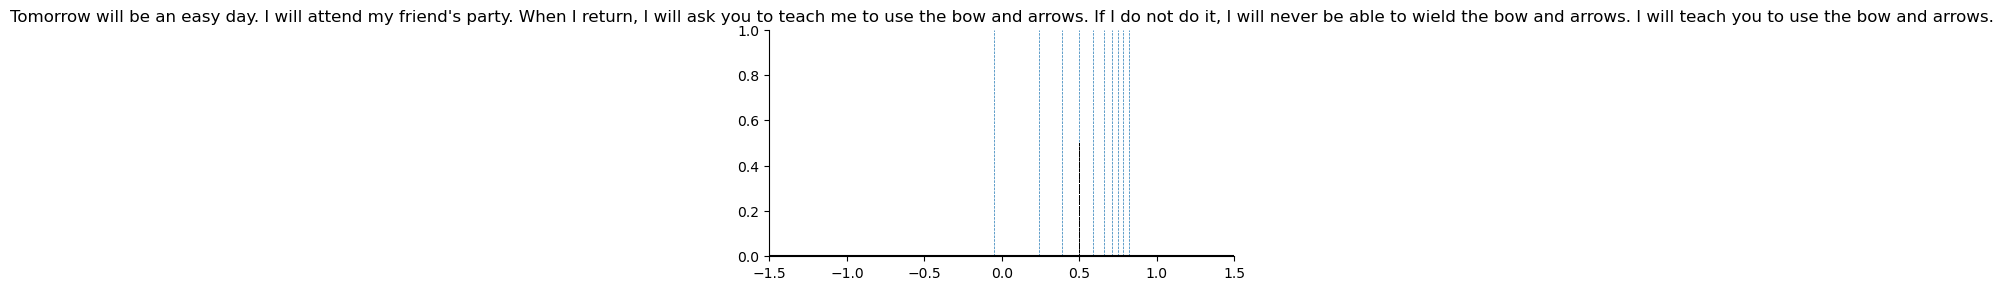

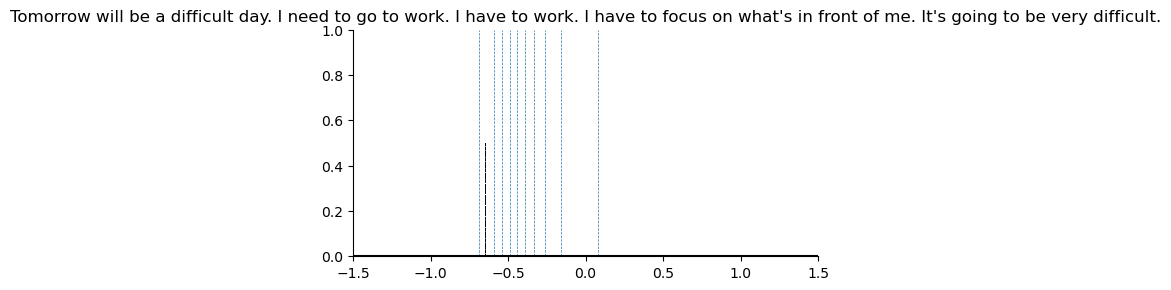

In [99]:
plot_examples(rand_examples, sentences, composite_rewards, tokenizer, model, 
              out['Z_network'], out['taus'])

##### Manual Examples

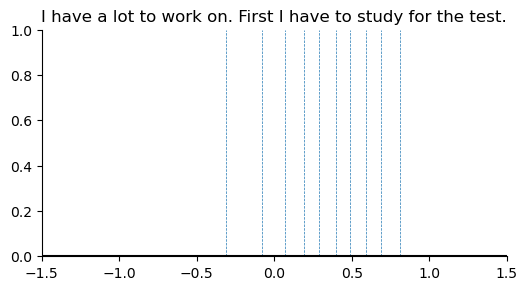

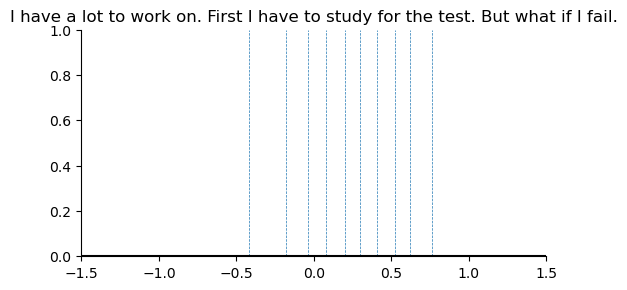

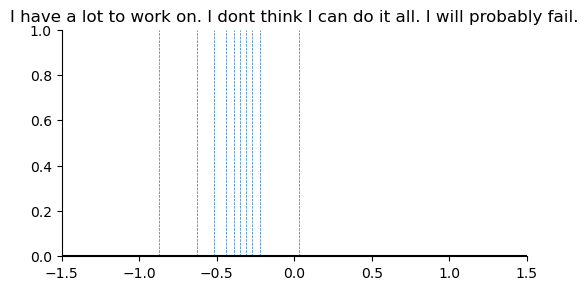

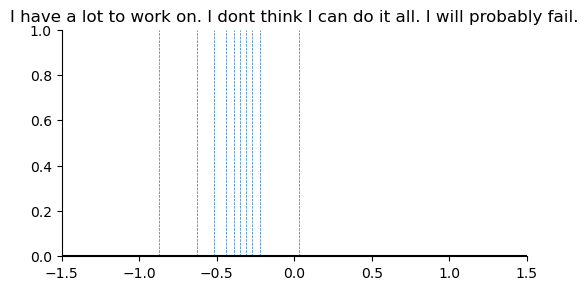

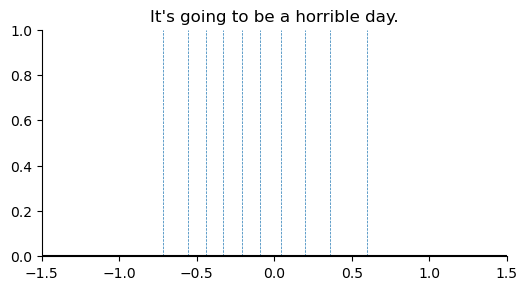

In [100]:
examples = ['I have a lot to work on. First I have to study for the test.',
            'I have a lot to work on. First I have to study for the test. But what if I fail.',
            'I have a lot to work on. I dont think I can do it all. I will probably fail.',
            'I have a lot to work on. I dont think I can do it all. I will probably fail.',
            "It's going to be a horrible day.",
           ]

plot_examples(examples, sentences, composite_rewards, tokenizer, model, 
              out['Z_network'], out['taus'])

#### 3x data 10 Hidden Units (100 epochs) (faster lr)

In [92]:
out = load_rl_model(epoch=98, hidden_dim =10, n_quantiles = 10, extra = '_composite_rewards_2',
                          folder = 'sentence_chains_I_5',huber=0.1)
# out = load_rl_model(epoch=48, hidden_dim =10, n_quantiles = 10, extra = '_composite_rewards_2',
#                           folder = 'sentence_chains_I_5',huber=0.1)

In [93]:
v5_stems_1 =["Tomorrow will be an easy day.",
           "Tomorrow will be a busy day.",
           "Tomorrow will be a difficult day."]
v5_stems_2 = ["I need to go to the doctor's.", 'I need to go to work.', 
         'I need to go to the grocery store.', 'I need to clean the house.',  'I need to take that test.']

v5_stems = []
for v5_1 in v5_stems_1:
    for v5_2 in v5_stems_2:
        v5_stems.append(v5_1+' '+v5_2)

In [94]:
v5_stems[0:2]

["Tomorrow will be an easy day. I need to go to the doctor's.",
 'Tomorrow will be an easy day. I need to go to work.']

##### Tracked Sentences

In [95]:
tracked_sentences = [key for key in out['log'].keys() if key not in ['loss','epoch']]

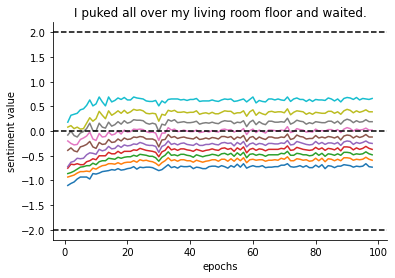

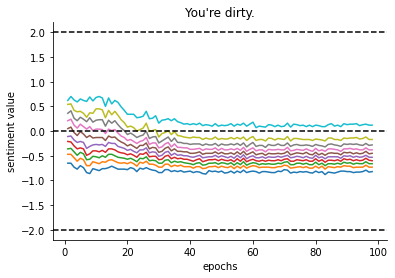

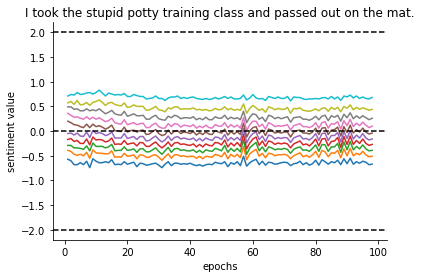

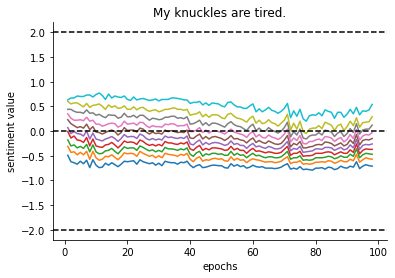

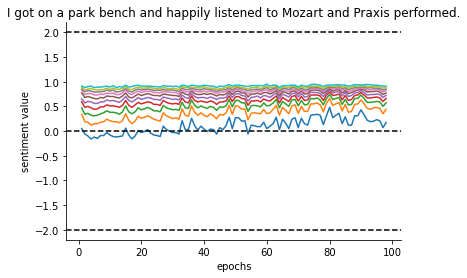

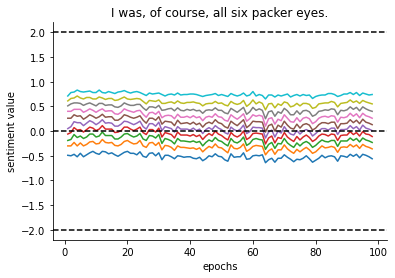

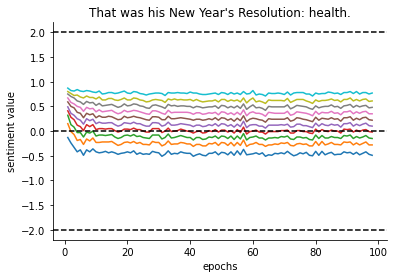

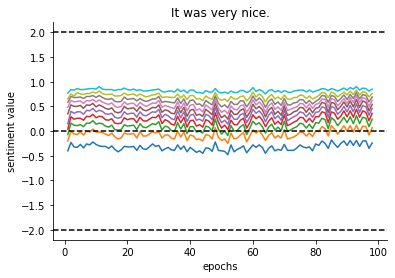

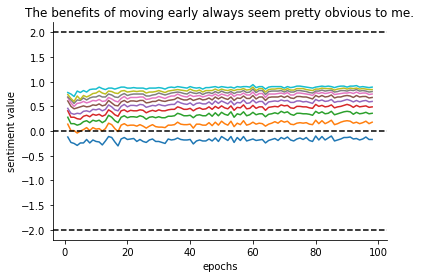

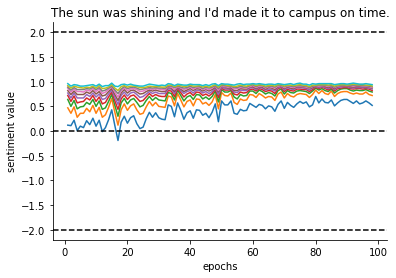

In [96]:
for sent in tracked_sentences:
    plt.figure()
    plt.plot(out['epoch'], np.array(out['log'][sent]))
    sns.despine()
    plt.axhline(y=-2, color='k', linestyle='--')
    plt.axhline(y=0, color='k', linestyle='--')
    plt.axhline(y=2, color='k', linestyle='--')
    plt.ylabel('sentiment value')
    plt.xlabel('epochs')
    plt.title(sent)

##### Stems (part 1)

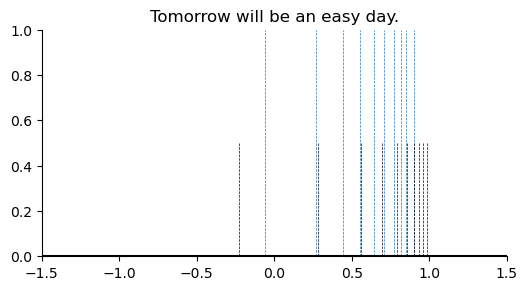

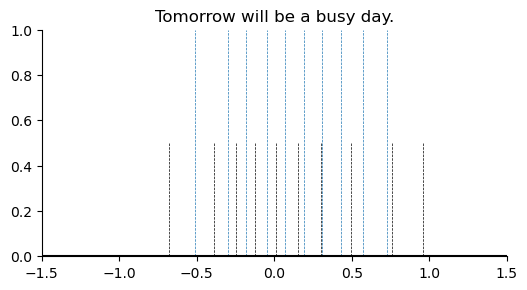

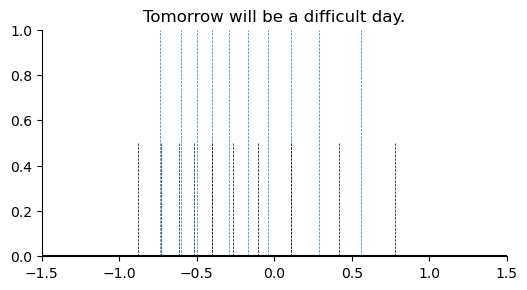

In [97]:
plot_examples(v5_stems_1, sentences, composite_rewards, tokenizer, model, 
              out['Z_network'], out['taus'])

##### Stems (part 2)

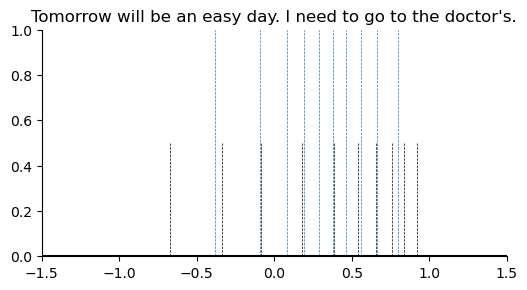

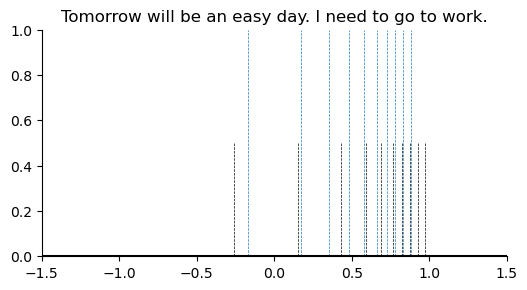

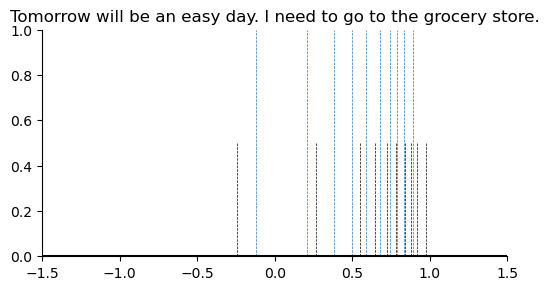

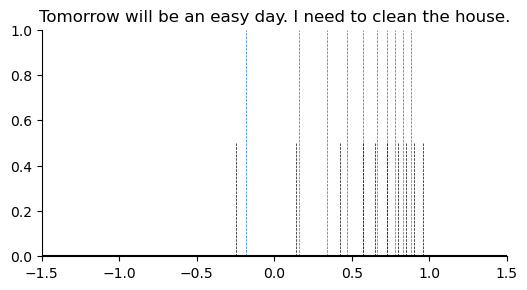

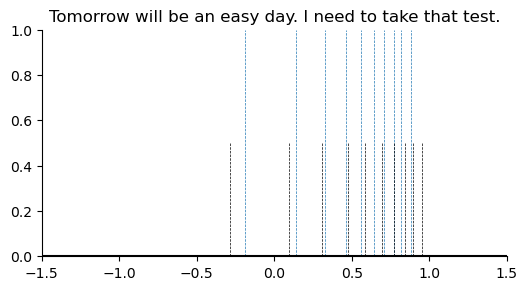

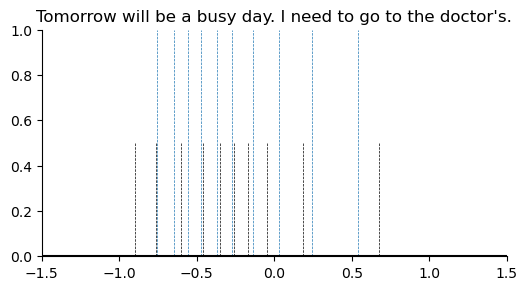

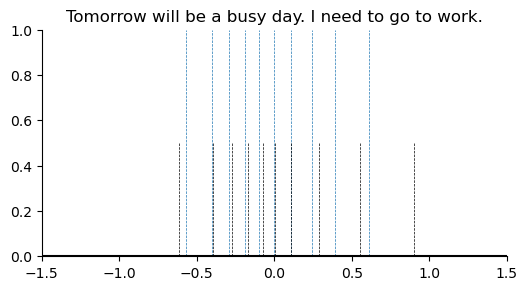

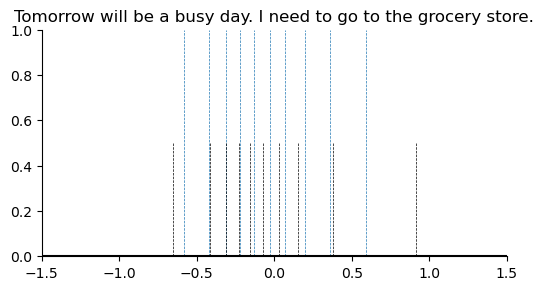

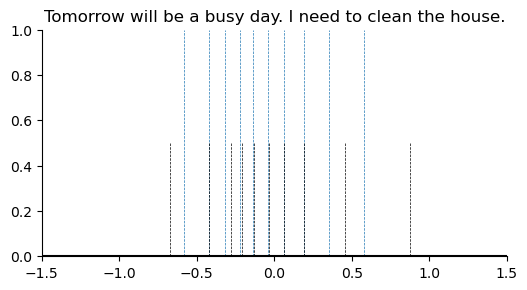

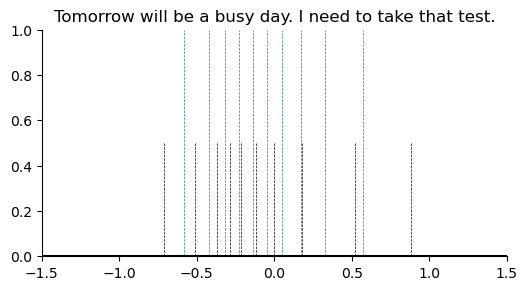

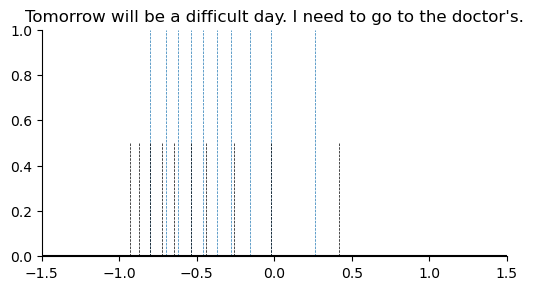

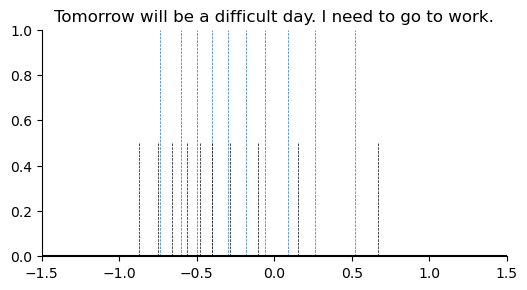

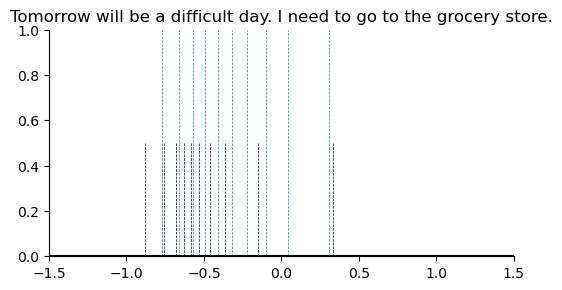

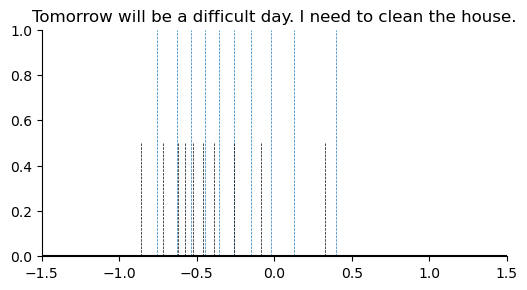

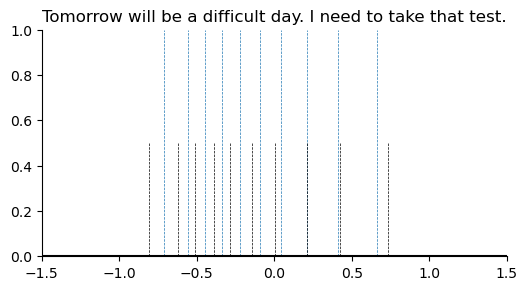

In [98]:
plot_examples(v5_stems, sentences, composite_rewards, tokenizer, model, 
              out['Z_network'], out['taus'])

##### Random Examples

In [99]:
np.random.seed(1)
rand_examples = [s.split('p=')[0].strip() for s in np.random.choice(sentences, 10)]
rand_examples

["Tomorrow will be an easy day. I need to go to the grocery store. When I get back, I'll go to the gym. I'll come home and start cooking dinner. I'll make a cup of tea and make sure everything is ready for bed.",
 'Tomorrow will be an easy day. I will go on a bike ride. I will try to get in the time to the final. I will try to show good energy. We are in good condition.',
 'Tomorrow will be a difficult day. I will go to the gym. I will work hard. I will make sure I am prepared for tomorrow. I am not going to lie, I have a lot of emotions.',
 "Tomorrow will be an easy day. I need to go to the doctor's. I'm going to have to tell them that I was out of my mind. I'll do everything I can to get back to work. But I'll do my best.",
 'Tomorrow will be an easy day. I need to clean the house. I need to prepare a dinner. I need to go to the library. I need to talk to my dad.',
 "Tomorrow will be a difficult day. I might need to work late. I will be back at work tomorrow morning and will have to 

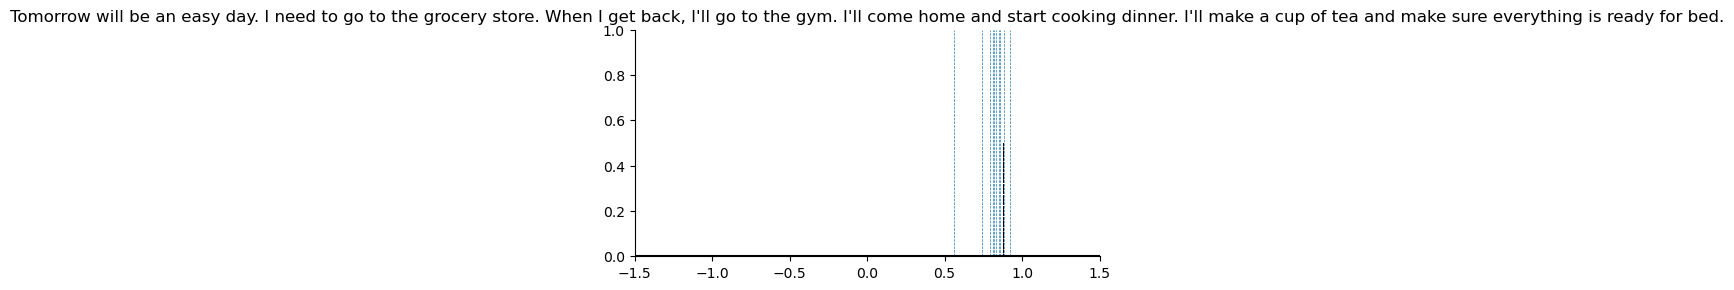

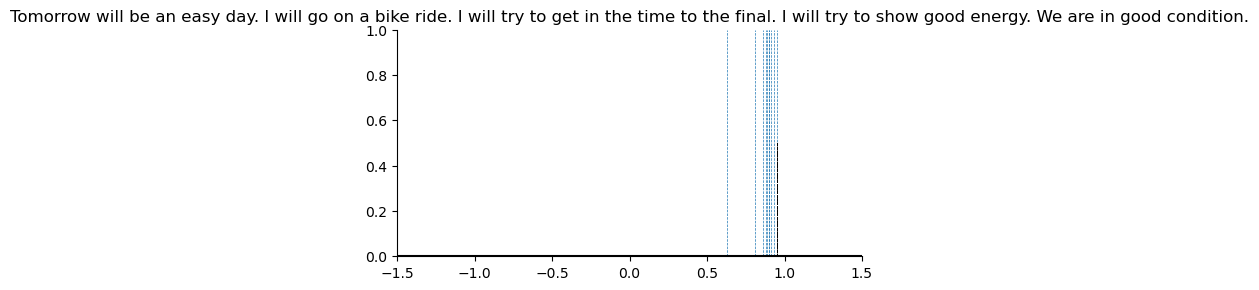

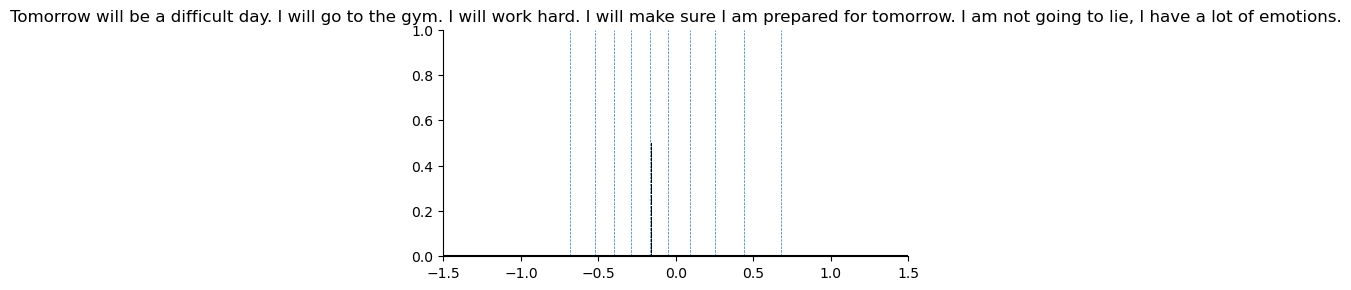

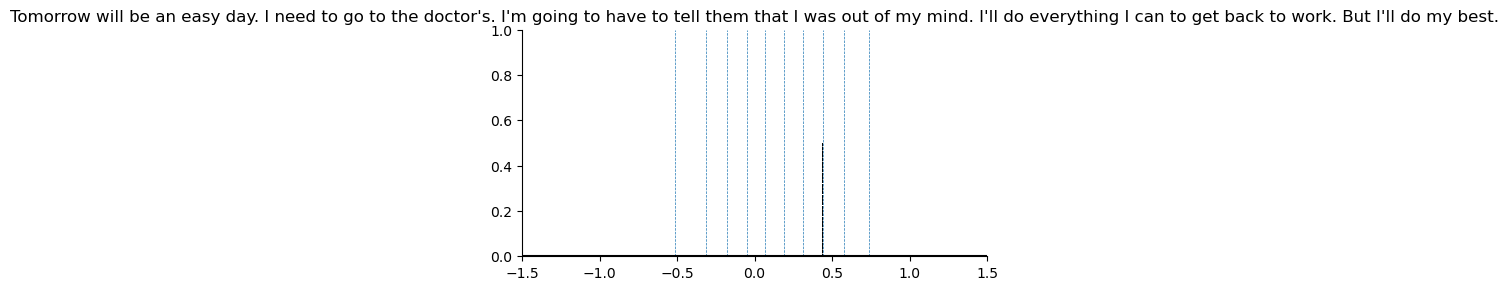

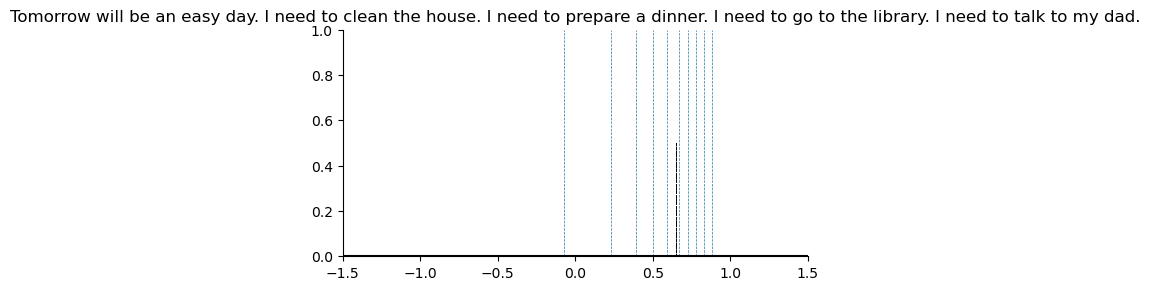

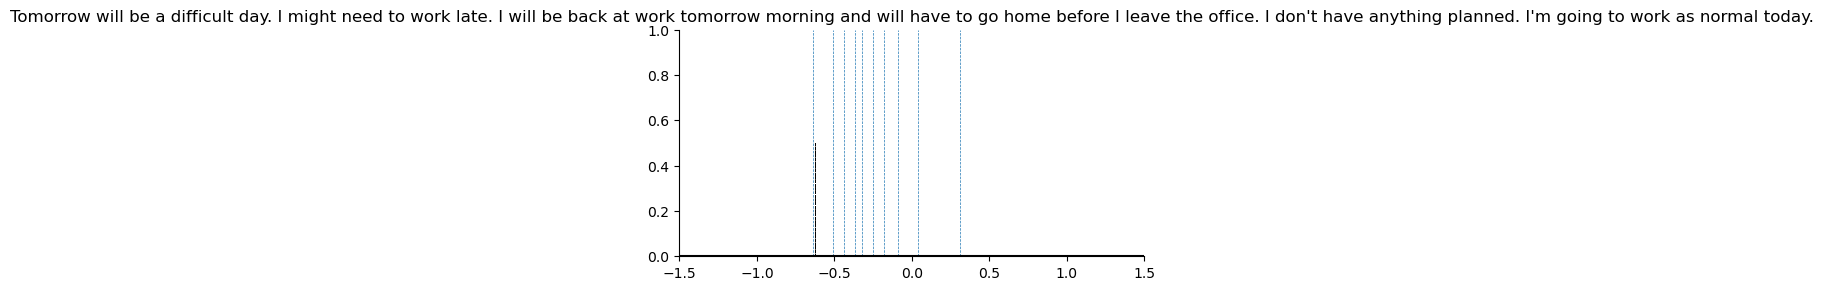

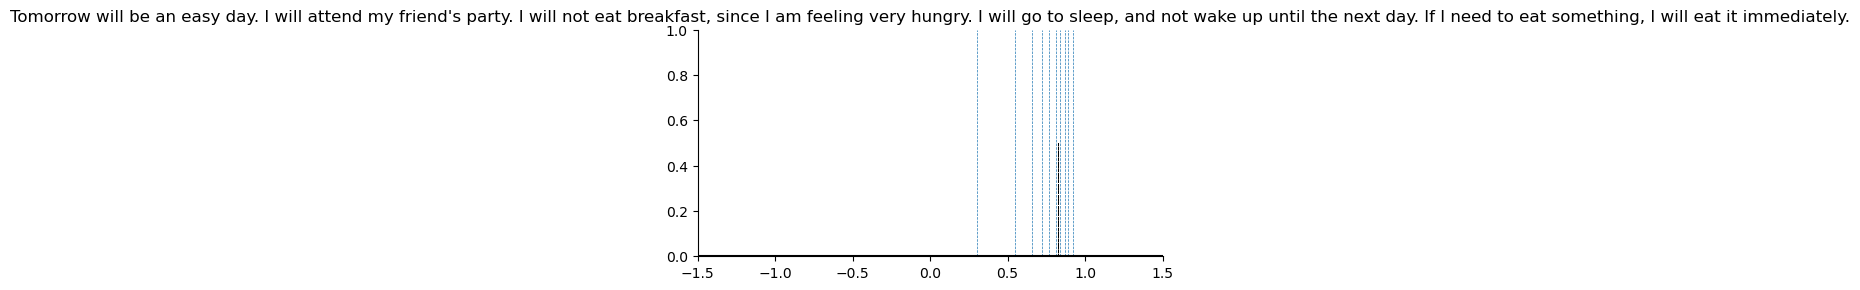

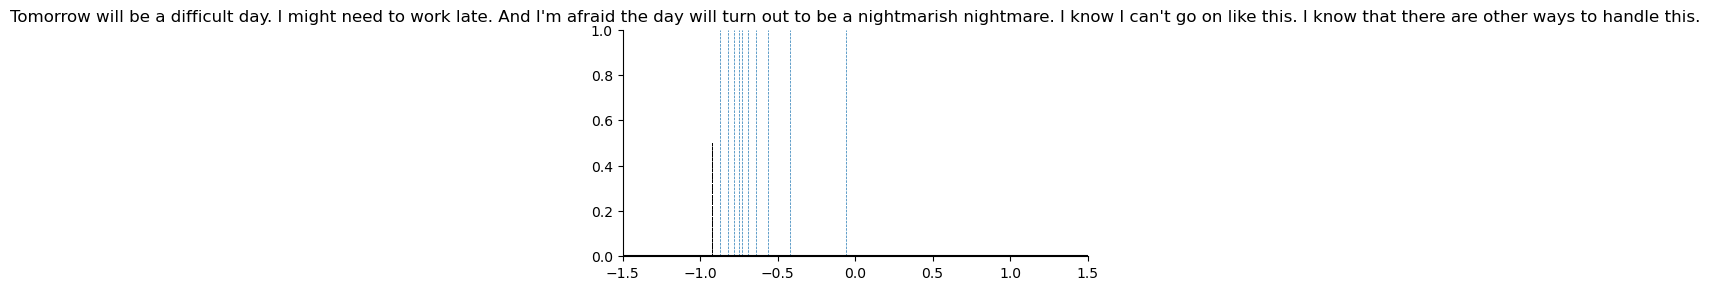

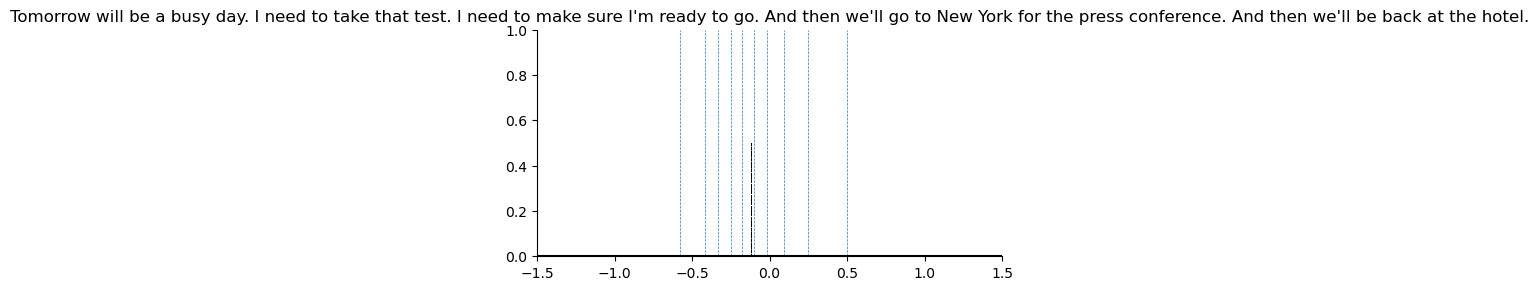

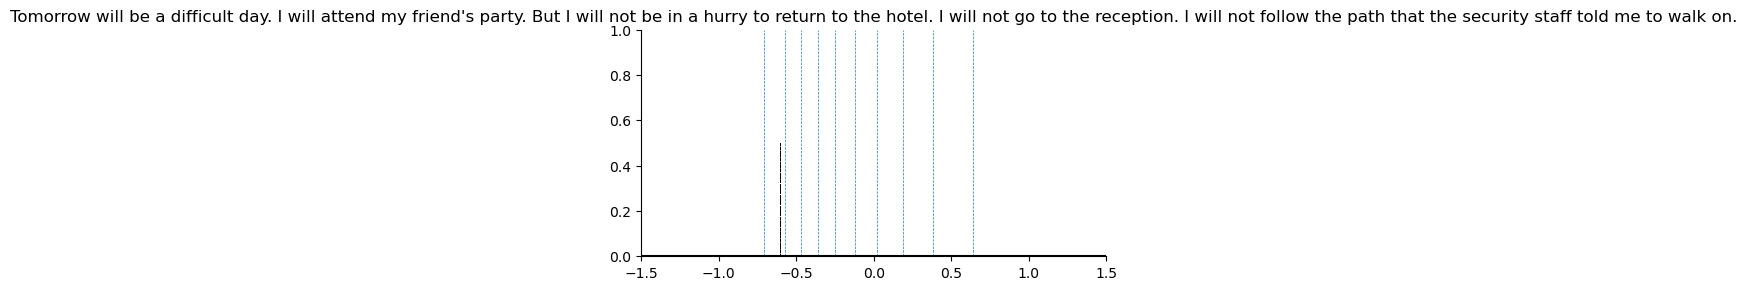

In [100]:
plot_examples(rand_examples, sentences, composite_rewards, tokenizer, model, 
              out['Z_network'], out['taus'])

##### Manual Examples

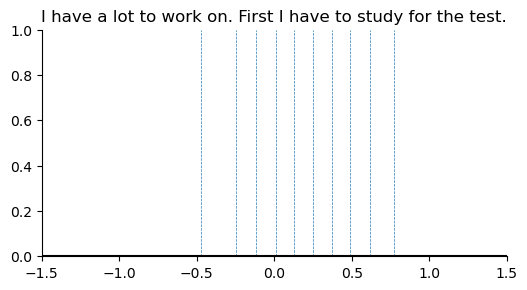

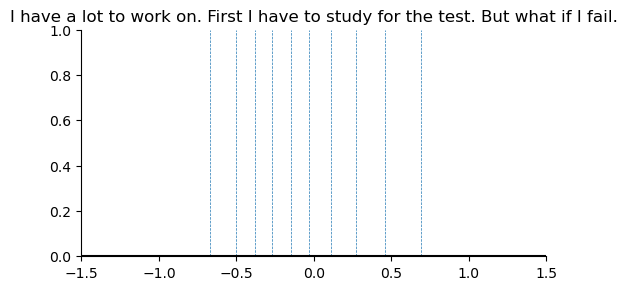

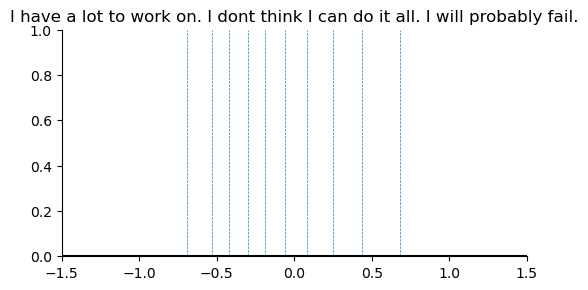

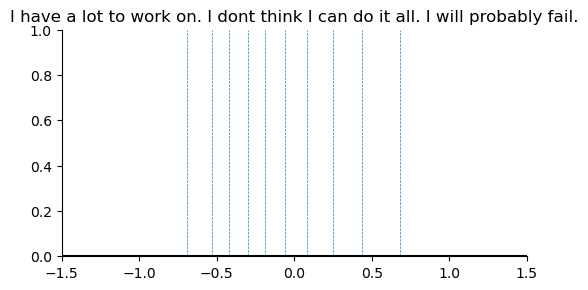

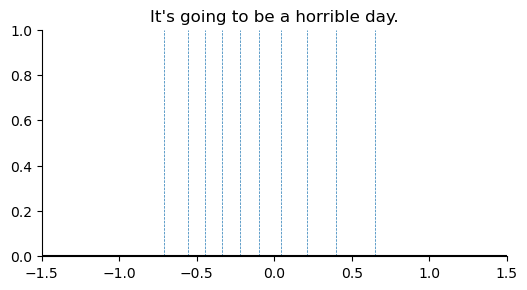

In [101]:
examples = ['I have a lot to work on. First I have to study for the test.',
            'I have a lot to work on. First I have to study for the test. But what if I fail.',
            'I have a lot to work on. I dont think I can do it all. I will probably fail.',
            'I have a lot to work on. I dont think I can do it all. I will probably fail.',
            "It's going to be a horrible day.",
           ]

plot_examples(examples, sentences, composite_rewards, tokenizer, model, 
              out['Z_network'], out['taus'])

### Generating Examples

In [51]:
def plot_dists(sentences_cvar, rewards, sentences):
    # full distribution
    stem = ""

    fig,axes = plt.subplots(len(alphas)+1, 1, figsize=(8,4*len(alphas)), dpi=200)

    plt.sca(axes[0])
    sel = np.array([s.startswith(stem) for s in sentences]).astype('bool')
    plt.hist(rewards[sel], alpha=0.5, density=False)
    
    mean = np.nanmean(rewards[sel])
    plt.axvline(x=mean, color=sns.color_palette()[0])

    sns.despine(left=True)
    plt.xlim([-1.1,1.1])
    plt.title(f'alpha=1')
    plt.yticks([])

    # alphas 
    for a, alpha in enumerate(alphas[::-1]):

        plt.sca(axes[a+1]) 
        sel_cvar = np.array([s.startswith(stem) for s in sentences_cvar[alpha]]).astype('bool')
        plt.hist(rewards_cvar[alpha][sel_cvar], alpha=0.5, color=sns.color_palette()[0],density=False)

        mean = np.nanmean(rewards_cvar[alpha][sel_cvar])
        plt.axvline(x=mean, color=sns.color_palette()[0])
        
        plt.xlim([-1.1,1.1])
        plt.title(f'alpha={alpha}')
        plt.yticks([])
        sns.despine(left=True)

    plt.tight_layout()

#### 100 Hidden Units (20 Epochs) - slow learning rate -  this actually looks pretty good

In [29]:
sentences_cvar = {}
rewards_cvar = {}
alphas = [0.05,]
top_k =10
extra = '_steps3_100units_slow_lr'
for alpha in alphas:

    file = f'../data/results/sentence_chains_I_5/generations_alpha{alpha}{extra}.txt'
    f = open(file, "r")
    sentences_cvar[alpha] = np.array([s.replace('\n','') for s in f.readlines()])
    rewards_cvar[alpha] =  []
    for s in sentences_cvar[alpha]:
        r = np.sum(np.array(s.split('r_all=')[-1].split(',')).astype('float'))
        rewards_cvar[alpha].append(r)

    rewards_cvar[alpha]=np.array(rewards_cvar[alpha])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


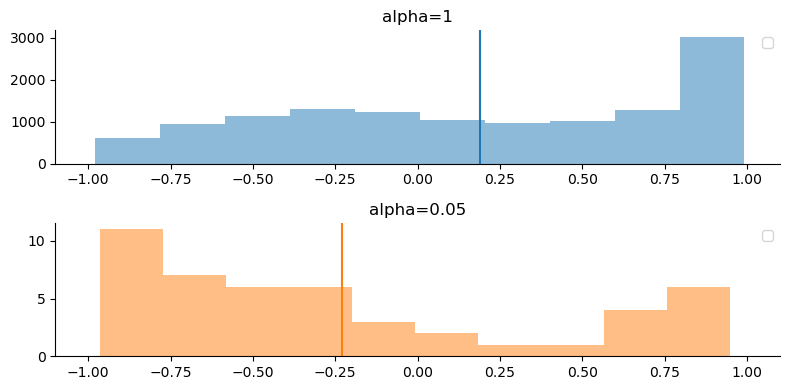

In [30]:
plot_dists(sentences_cvar, composite_rewards, sentences)

In [31]:
alpha =0.05
ss = sentences_cvar[alpha]
rs = rewards_cvar[alpha]

ss = [s for _,s in sorted(zip(rs,ss))]
rs = [r for _,r in sorted(zip(rs,rs))]
for s, (sentence,r) in enumerate(zip(ss,rs)):
    if sentence not in sentences:
        print(s, sentence)
        print()

0 Tomorrow will be a busy day. I need to go to the doctor's. I can't walk. I feel like my body is rejecting me. I feel like I'm on the verge of death. p=0.07,0.042,0.214 r=-0.855,-0.964,-0.948 r_all=-0.964

1 Tomorrow will be a difficult day. I might need to work late. I might not be able to get to work. I might be sick. I might be just not there. p=0.475,0.039,0.078 r=-0.896,-0.897,-0.578 r_all=-0.93

2 Tomorrow will be a difficult day. I might need to work late. I might have to go to a doctor's appointment. I might need to be in the office late. I might need to be at a job I don't want to be at. p=0.014,0.755,0.187 r=-0.314,-0.427,-0.848 r_all=-0.909

3 Tomorrow will be a difficult day. I need to go to the doctor's. I need to see a doctor. I don't know what to do. What am I going to do? I just don't know what to do. p=0.767,0.102,0.272 r=-0.731,-0.822,-0.828 r_all=-0.897

4 Tomorrow will be a difficult day. I need to go to work. I can't stay here any longer. I need to go. I won't be 

#### 10 Hidden Units (20 Epochs) - slow learning rates

In [32]:
sentences_cvar = {}
rewards_cvar = {}
alphas = [0.05,]
top_k =10
extra = '_steps3_10units_slow_lr'
for alpha in alphas:

    file = f'../data/results/sentence_chains_I_5/generations_alpha{alpha}{extra}.txt'
    f = open(file, "r")
    sentences_cvar[alpha] = np.array([s.replace('\n','') for s in f.readlines()])
    rewards_cvar[alpha] =  []
    for s in sentences_cvar[alpha]:
        r = np.sum(np.array(s.split('r_all=')[-1].split(',')).astype('float'))
        rewards_cvar[alpha].append(r)

    rewards_cvar[alpha]=np.array(rewards_cvar[alpha])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


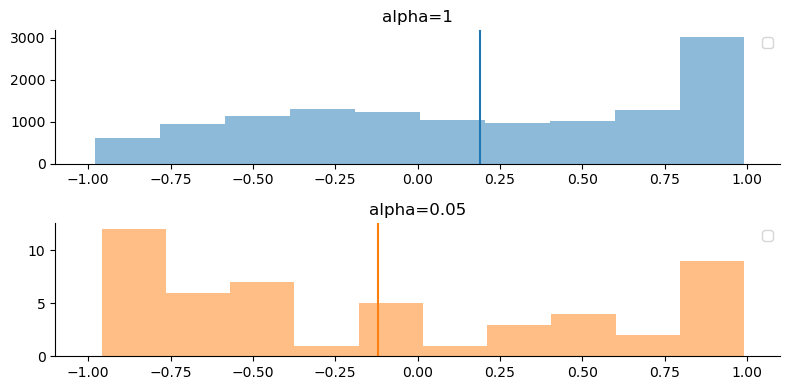

In [33]:
plot_dists(sentences_cvar, composite_rewards, sentences)

In [34]:
alpha =0.05
ss = sentences_cvar[alpha]
rs = rewards_cvar[alpha]

ss = [s for _,s in sorted(zip(rs,ss))]
rs = [r for _,r in sorted(zip(rs,rs))]
for s, (sentence,r) in enumerate(zip(ss,rs)):
    if sentence not in sentences:
        print(s, sentence)
        print()

0 Tomorrow will be a difficult day. I need to go to the doctor's. I am still having trouble with my stomach. I am not feeling well. I am in pain. p=0.056,0.71,0.047 r=-0.947,-0.945,-0.897 r_all=-0.959

1 Tomorrow will be a difficult day. I need to go to the doctor's. I don't know what's going to happen, but I have to go. I don't want to go to the hospital. They said I had a very bad infection. p=0.567,0.02,0.01 r=-0.137,-0.936,-0.949 r_all=-0.933

2 Tomorrow will be a difficult day. I need to go to work. I'm not feeling very well. I'm feeling a little bit ill. I have to go to work, but I don't feel good. p=0.183,0.535,0.645 r=-0.938,-0.859,-0.926 r_all=-0.926

3 Tomorrow will be a difficult day. I will go to the gym. I will not be able to get up. I will sit in bed and think about what happened today. I will cry. p=0.148,0.004,0.019 r=-0.924,-0.13,-0.088 r_all=-0.922

4 Tomorrow will be a difficult day. I need to go to the doctor's. I don't know what I will say. I'm not sure I'll be abl

#### 100 Hidden Units (48 Epochs) 

In [52]:
sentences_cvar = {}
rewards_cvar = {}
alphas = [0.05,]
top_k =10
extra = '_steps3_100units'
for alpha in alphas:

    file = f'../data/results/sentence_chains_I_5/generations_alpha{alpha}{extra}.txt'
    f = open(file, "r")
    sentences_cvar[alpha] = np.array([s.replace('\n','') for s in f.readlines()])
    rewards_cvar[alpha] =  []
    for s in sentences_cvar[alpha]:
        r = np.sum(np.array(s.split('r_all=')[-1].split(',')).astype('float'))
        rewards_cvar[alpha].append(r)

    rewards_cvar[alpha]=np.array(rewards_cvar[alpha])

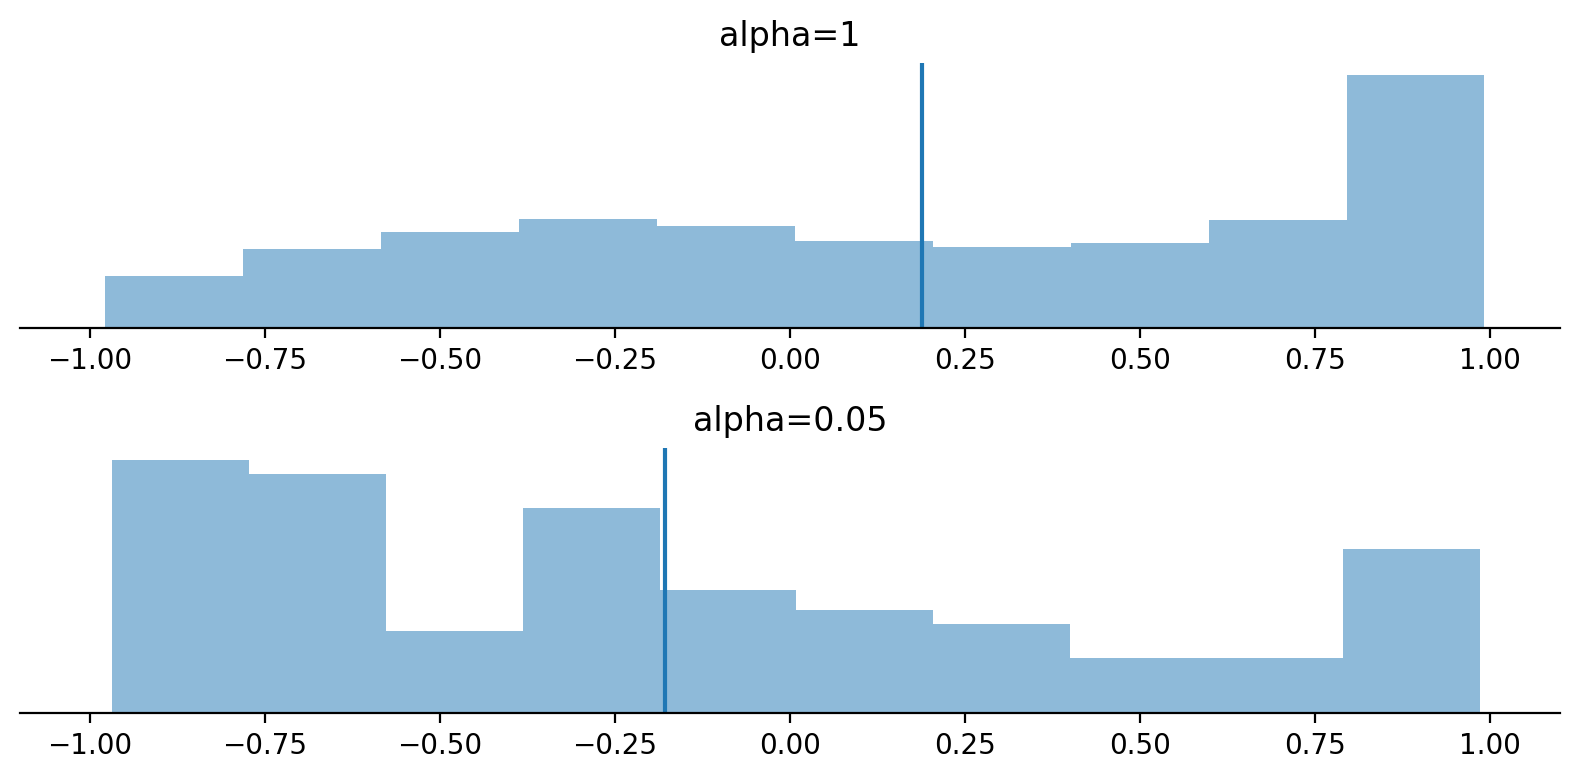

In [53]:
plot_dists(sentences_cvar, composite_rewards, sentences)

In [54]:
alpha =0.05
ss = sentences_cvar[alpha]
rs = rewards_cvar[alpha]

ss = [s for _,s in sorted(zip(rs,ss))]
rs = [r for _,r in sorted(zip(rs,rs))]
for s, (sentence,r) in enumerate(zip(ss,rs)):
    if sentence not in sentences:
        #print(s, sentence)
        #print()
        print(sentence.split('p=')[0]+'r='+str(r))

Tomorrow will be a difficult day. I need to go to the grocery store. This is very dangerous. I will probably get shot. I will not be able to explain it to you. r=-0.968
Tomorrow will be a difficult day. I need to go to the doctor's. I'm not sure how much longer I can do this. I'm tired. I'm tired of getting sick. r=-0.955
Tomorrow will be a difficult day. I might need to work late. I might be exhausted. I might be in a bad mood. I might have a cold or a sore throat. r=-0.94
Tomorrow will be a difficult day. I need to go to the doctor's. I am going to the hospital. There are going to be some problems. I can't walk properly. r=-0.939
Tomorrow will be a difficult day. I might need to work late. I can't imagine how this day will affect the rest of my life. I feel so confused. I'm not sure what to do. r=-0.938
Tomorrow will be a difficult day. I might need to work late. I might need to stop. I might have to give up my job. I might have to make a bad decision. r=-0.935
Tomorrow will be a dif

## What-ifs

### Loading Training Data 

In [27]:
file = '../data/results/sentence_chains_I_5/generations_seed5_whatif.txt'
f = open(file, "r")
sentences = f.readlines()
sentences = [s.replace('\n','') for s in sentences]
composite_rewards =[s.split('r_all=')[1] for s in sentences]
sentences_wo_rall = [s.split('r_all=')[0] for s in sentences]
state_rewards =  [np.array(s.split('r=')[-1].split(',')).astype('float') for s in sentences_wo_rall]


In [28]:
# removing some bad examples #
state_rewards2 = []
sentences2 = []
composite_rewards2 = []
for r,s,rc in zip(state_rewards, sentences, composite_rewards):
    if len(r)!=3:
        pass
    else:
        state_rewards2.append(r)
        sentences2.append(s)
        composite_rewards2.append(rc)
sentences = sentences2
state_rewards = np.array(state_rewards2)
composite_rewards = np.array(composite_rewards2).astype('float')

# choose rewards 
summed_rewards = state_rewards.sum(axis=1)
final_rewards = state_rewards[:,-1]


assert len(sentences) == len(final_rewards)

In [29]:
np.array(state_rewards)

array([[ 0.088, -0.29 , -0.586],
       [-0.343, -0.795,  0.006],
       [ 0.307,  0.096,  0.066],
       ...,
       [-0.574, -0.495, -0.258],
       [-0.019, -0.6  , -0.394],
       [-0.059, -0.735, -0.709]])

In [30]:
summed_rewards

array([-0.788, -1.132,  0.469, ..., -1.327, -1.013, -1.503])

In [31]:
final_rewards

array([-0.586,  0.006,  0.066, ..., -0.258, -0.394, -0.709])

In [32]:
composite_rewards

array([-0.519, -0.144,  0.077, ...,  0.052, -0.643, -0.837])

In [33]:
len(sentences)
len(final_rewards)

11603

### Plotting the distributions

Text(0.5, 1.0, 'composite reward')

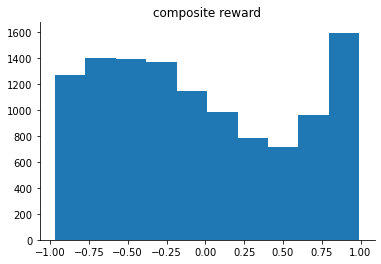

In [34]:
plt.hist(composite_rewards)
sns.despine()
plt.title('composite reward')

Text(0.5, 1.0, 'final reward')

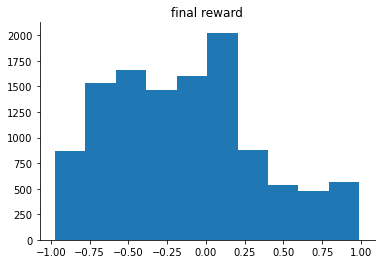

In [35]:
plt.hist(final_rewards)
sns.despine()
plt.title('final reward')

Text(0.5, 1.0, 'summed reward')

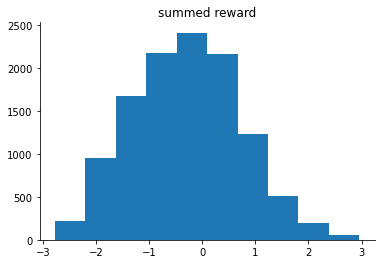

In [36]:
plt.hist(summed_rewards)
sns.despine()
plt.title('summed reward')

### Plotting the distributions (by stems)

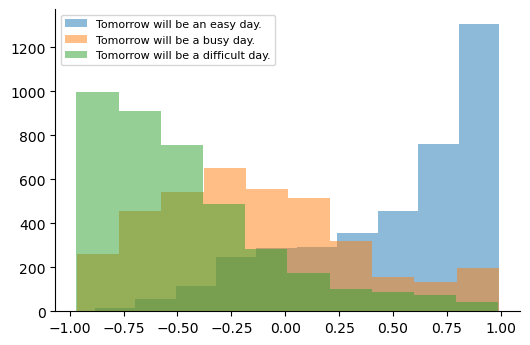

In [37]:
stems = ["Tomorrow will be an easy day.",
         "Tomorrow will be a busy day.",
         "Tomorrow will be a difficult day."]

plt.figure(dpi=100)
for stem in stems:
    sel = np.array([s.startswith(stem) for s in sentences]).astype('bool')
    plt.hist(composite_rewards[sel], label=stem, alpha=0.5)
    plt.legend(fontsize=8)
sns.despine()

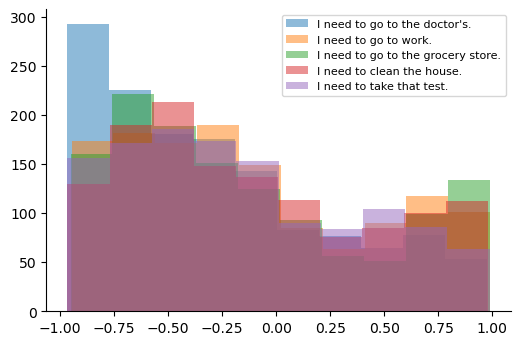

In [38]:
stems = ["I need to go to the doctor's.", 'I need to go to work.', 
         'I need to go to the grocery store.', 'I need to clean the house.',  'I need to take that test.',]

plt.figure(dpi=100)
for stem in stems:
    sel = np.array([True if stem in s else False for s in sentences ]).astype('bool')
    plt.hist(composite_rewards[sel], label=stem, alpha=0.5)
    plt.legend(fontsize=8)
sns.despine()

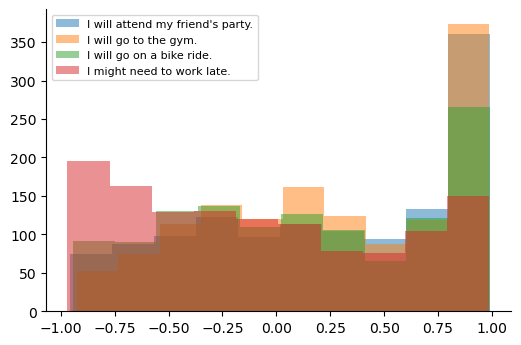

In [39]:
stems = ["I will attend my friend's party.", "I will go to the gym.", "I will go on a bike ride.", "I might need to work late." ]

plt.figure(dpi=100)
for stem in stems:
    sel = np.array([True if stem in s else False for s in sentences ]).astype('bool')
    plt.hist(composite_rewards[sel], label=stem, alpha=0.5)
    plt.legend(fontsize=8)
sns.despine()

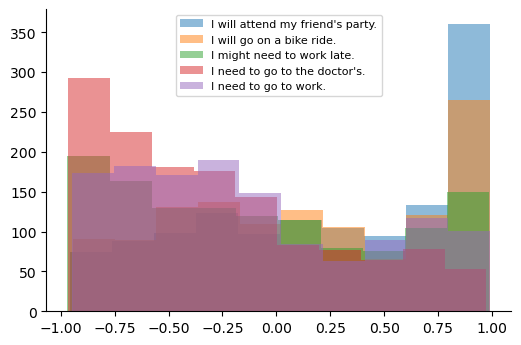

In [40]:
stems = ["I will attend my friend's party.", "I will go on a bike ride.", "I might need to work late.", "I need to go to the doctor's.", 'I need to go to work.',  ]

plt.figure(dpi=100)
for stem in stems:
    sel = np.array([True if stem in s else False for s in sentences ]).astype('bool')
    plt.hist(composite_rewards[sel], label=stem, alpha=0.5)
    plt.legend(fontsize=8)
sns.despine()

### Print some Negative Examples

#### Final rewards

In [41]:
sort_idx = np.argsort(final_rewards)
for s in np.array(sentences)[sort_idx][0:20]:
    print(s)
    print()

Tomorrow will be a difficult day. I will attend my friend's party. I will go and see my friend. What if I have to leave before I can come back? I will be a complete failure, and you will never see me again. p=0.117,0.074,0.07 r=0.568,-0.434,-0.974 r_all=-0.813

Tomorrow will be an easy day. I need to go to the doctor's. He's coming tomorrow and we will see about getting some rest. It's nothing serious. I've been having a headache and it's not much better. p=0.072,0.086,0.072 r=0.092,-0.116,-0.972 r_all=-0.239

Tomorrow will be an easy day. I might need to work late. What if I'm late again? I can't do this. I'm so late, I'm like a fucking robot. p=0.075,0.078,0.079 r=-0.623,-0.932,-0.971 r_all=-0.74

Tomorrow will be a difficult day. I need to take that test. I'm going to pass it. What if I fail it? I'll lose my life, I'm so embarrassed. p=0.083,0.071,0.078 r=0.37,-0.656,-0.968 r_all=-0.699

Tomorrow will be a busy day. I need to take that test. I need to finish my study. Then I can lea

#### Summed Rewards

In [42]:
sort_idx = np.argsort(summed_rewards)
for s in np.array(sentences)[sort_idx][0:20]:
    print(s)
    print()

Tomorrow will be a busy day. I need to go to the doctor's. I don't know what's going on with me. Then I'll go back to my old life, and it won't be very good. It's all wrong. p=0.082,0.08,0.067 r=-0.906,-0.92,-0.949 r_all=-0.966

Tomorrow will be a busy day. I need to go to the doctor's. I'm a bit worried I'm going to have a heart attack. Then I'll be in this hellhole forever. I'll never get back to normal again. p=0.067,0.072,0.067 r=-0.912,-0.949,-0.913 r_all=-0.958

Tomorrow will be a difficult day. I need to go to the doctor's. I have a head injury. My head is in a mess. The concussion is bothering me. p=0.076,0.096,0.089 r=-0.929,-0.925,-0.918 r_all=-0.954

Tomorrow will be a difficult day. I need to go to the doctor's. What if I have a heart attack tomorrow and get killed? My family will be devastated, my children will be devastated. Then I will not have a family, so I will have no reason to live. p=0.07,0.085,0.073 r=-0.923,-0.949,-0.887 r_all=-0.963

Tomorrow will be a difficult

#### Composite Rewards

In [43]:
sort_idx = np.argsort(composite_rewards)
for s in np.array(sentences)[sort_idx][0:20]:
    print(s)
    print()

Tomorrow will be a difficult day. I might need to work late. What if I have to go to the toilet? I can't stand this anymore. I want to tell them. p=0.068,0.086,0.079 r=-0.648,-0.966,0.096 r_all=-0.969

Tomorrow will be a difficult day. I need to take that test. What if they tell me I'm not a human? What if I can't go to school tomorrow? What if my family will come and threaten to kill me? p=0.07,0.083,0.101 r=-0.651,-0.744,-0.933 r_all=-0.966

Tomorrow will be a difficult day. I need to go to the doctor's. What if my daughter's cancer has spread to my brain? What if I can't see her again? What if she dies in the womb? p=0.068,0.068,0.066 r=-0.911,-0.68,-0.591 r_all=-0.966

Tomorrow will be a busy day. I need to go to the doctor's. I don't know what's going on with me. Then I'll go back to my old life, and it won't be very good. It's all wrong. p=0.082,0.08,0.067 r=-0.906,-0.92,-0.949 r_all=-0.966

Tomorrow will be a difficult day. I need to clean the house. Then I will go to the doctor

### Print some Positive Examples

#### Final rewards

In [116]:
sort_idx = np.argsort(final_rewards)
for s in np.array(sentences)[sort_idx][-20:]:
    print(s)
    print()

Tomorrow will be an easy day. I might need to work late. I will take a nap and then go back to work. It is all very peaceful. We are all happy and relaxed. p=0.078,0.097,0.073 r=0.035,0.918,0.953 r_all=0.963

Tomorrow will be a busy day. I need to go to the doctor's. I hope that I can work out this evening and then go home. Then I'll see you tomorrow morning. I love you. p=0.085,0.083,0.083 r=0.743,0.16,0.958 r_all=0.896

Tomorrow will be an easy day. I might need to work late. I can't wait to see you. Good bye, Lisa. I love you. p=0.075,0.113,0.082 r=0.984,-0.135,0.958 r_all=0.988

Tomorrow will be an easy day. I need to go to work. I will be there for you. I will come back as soon as possible. I love you. p=0.087,0.085,0.072 r=0.617,0.602,0.958 r_all=0.98

Tomorrow will be a difficult day. I will go to the gym. I will stay at home with the kids. I will not do any work. Then, my family will take me in their arms and we will be happy. p=0.076,0.073,0.086 r=0.046,-0.782,0.964 r_all=0.79

#### Summed Rewards

In [117]:
sort_idx = np.argsort(summed_rewards)
for s in np.array(sentences)[sort_idx][-20:]:
    print(s)
    print()

Tomorrow will be an easy day. I might need to work late. I will take a nap and then go back to work. It is all very peaceful. We are all happy and relaxed. p=0.078,0.097,0.073 r=0.035,0.918,0.953 r_all=0.963

Tomorrow will be a busy day. I might need to work late. Then we'll see. I'm sure they'll all be looking forward to it. Thanks for the invite! It means a lot to me. p=0.082,0.084,0.072 r=0.056,0.917,0.987 r_all=0.978

Tomorrow will be a difficult day. I will attend my friend's party. I hope you will be able to come. You may have been with me during the morning. We had a great time. p=0.097,0.086,0.092 r=0.884,0.115,0.972 r_all=0.91

Tomorrow will be a busy day. I need to go to the grocery store. Come on. Let's go! The girl looked at him and smiled. He was so happy to see her. p=0.082,0.072,0.086 r=0.124,0.889,0.977 r_all=0.957

Tomorrow will be a difficult day. I need to go to work. I need to be productive and think, but also go home and be with my family. Then I will be fine. I am

#### Composite Rewards

In [118]:
sort_idx = np.argsort(composite_rewards)
for s in np.array(sentences)[sort_idx][-20:]:
    print(s)
    print()

Tomorrow will be an easy day. I might need to work late. I will take a nap and then go back to work. It is all very peaceful. We are all happy and relaxed. p=0.078,0.097,0.073 r=0.035,0.918,0.953 r_all=0.963

Tomorrow will be an easy day. I will go to the gym. Then, I will eat some food and then I will sleep. But I am not going to miss it at all. I want to do it. p=0.073,0.083,0.084 r=0.157,0.531,0.798 r_all=0.963

Tomorrow will be a busy day. I will attend my friend's party. We will be having the biggest meal ever. Then I will meet with my friend and have a good talk. We will also be doing some shopping. p=0.071,0.078,0.076 r=0.977,0.88,0.208 r_all=0.963

Tomorrow will be a busy day. I will attend my friend's party. And then I will go to see the great, awesome and possibly impossible thing. I'll try not to put it off so much. On a recent trip to Washington, D. p=0.074,0.075,0.083 r=0.936,-0.167,0.024 r_all=0.963

Tomorrow will be an easy day. I will go to the gym. What if the weather 